In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
train_df=pd.read_csv('train_Data.csv')
train_df.head(10)

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10 00:00:00,2016-01-15 00:00:00,2012-02-10 00:00:00,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31 00:00:00,2016-02-15 00:00:00,2012-03-31 00:00:00,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17 00:00:00,2023-02-10 00:00:00,2017-06-17 00:00:00,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29 00:00:00,2017-11-10 00:00:00,2013-11-29 00:00:00,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08 00:00:00,2015-07-05 00:00:00,2011-12-08 00:00:00,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months
5,9,Monthly,Arrear,Closed,Billed,5,RAIPUR,48,400000,280000.0,280000.0,53000.0,2011-12-19 00:00:00,2015-12-15 00:00:00,2011-12-19 00:00:00,3413012,1019,54689,70.00,M,40.0,42083.33,RAIPUR,CHATTISGARH,493885.0,No Top-up Service
6,10,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,716000,450000.0,450000.0,2000.0,2011-12-31 00:00:00,2015-12-05 00:00:00,2011-12-31 00:00:00,3553579,1019,54689,62.85,M,23.0,46221.00,RAIPUR,CHATTISGARH,493889.0,No Top-up Service
7,11,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,600000,360000.0,360000.0,11000.0,2012-02-09 00:00:00,2016-02-15 00:00:00,2012-02-09 00:00:00,4008234,1187,21232,60.00,M,41.0,46195.08,RAIPUR,CHATTISGARH,493114.0,No Top-up Service
8,12,Monthly,Arrear,Closed,PDC,5,RAIPUR,46,539275,400000.0,400000.0,50000.0,2012-03-29 00:00:00,2016-01-15 00:00:00,2012-03-29 00:00:00,4603217,1046,24760,74.17,M,51.0,15000.00,RAIPUR,CHATTISGARH,493196.0,No Top-up Service
9,13,Monthly,Arrear,Closed,PDC,5,RAIPUR,48,689275,490000.0,490000.0,10000.0,2012-03-30 00:00:00,2016-02-15 00:00:00,2012-03-30 00:00:00,4619836,1046,24760,71.09,M,33.0,31666.67,RAIPUR,CHATTISGARH,493344.0,No Top-up Service


In [3]:
test_df=pd.read_excel("test_Data.xlsx")
test_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,365000.0,1000.0,2011-12-29,2015-10-05,2011-12-29,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,285000.0,9300.0,2012-04-28,2016-01-01,2012-04-28,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,400000.0,35800.0,2013-10-22,2017-09-10,2013-10-22,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,500000.0,52000.0,2013-05-21,2016-02-10,2013-05-21,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,400000.0,35400.0,2012-11-30,2016-12-05,2012-11-30,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,Monthly,Arrear,Closed,PDC,143,NEW DELHI BARAKHAMBHA ROAD,35,530016,419616.0,419616.0,14723.0,2012-02-29,2015-02-10,2012-02-29,4276747,1046.0,22094,79.17,NaN,NaN,NaN,GURGAON,HARYANA,122001.0
14741,143397,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,446500.0,15491.0,2012-04-10,2015-04-05,2012-04-10,4746586,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14742,143398,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,446500.0,15491.0,2012-04-10,2015-04-05,2012-04-10,4746588,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14743,143399,Monthly,Arrear,Closed,PDC_E,246,BIKANER,12,400000,280000.0,280000.0,25350.0,2013-07-25,2014-08-10,2013-07-26,11719081,1046.0,63565,70.00,M,NaN,NaN,GANGANAGAR,RAJASTHAN,335001.0


In [4]:
#train_df['train']=1
#test_df['test']=0
#df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True).copy()
#df.head(10)

In [5]:
train_df.shape

(128655, 26)

In [6]:
#df['train'].fillna(0,inplace=True)
#df['test'].fillna(0,inplace=True)

In [7]:
train_df.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [8]:
train_df.drop(['Area','City','MaturityDAte','AuthDate','DisbursalDate'],axis=1,inplace=True)
test_df.drop(['Area','City','MaturityDAte','AuthDate','DisbursalDate'],axis=1,inplace=True)

In [9]:
train_df=train_df.dropna()
test_df=test_df.dropna()

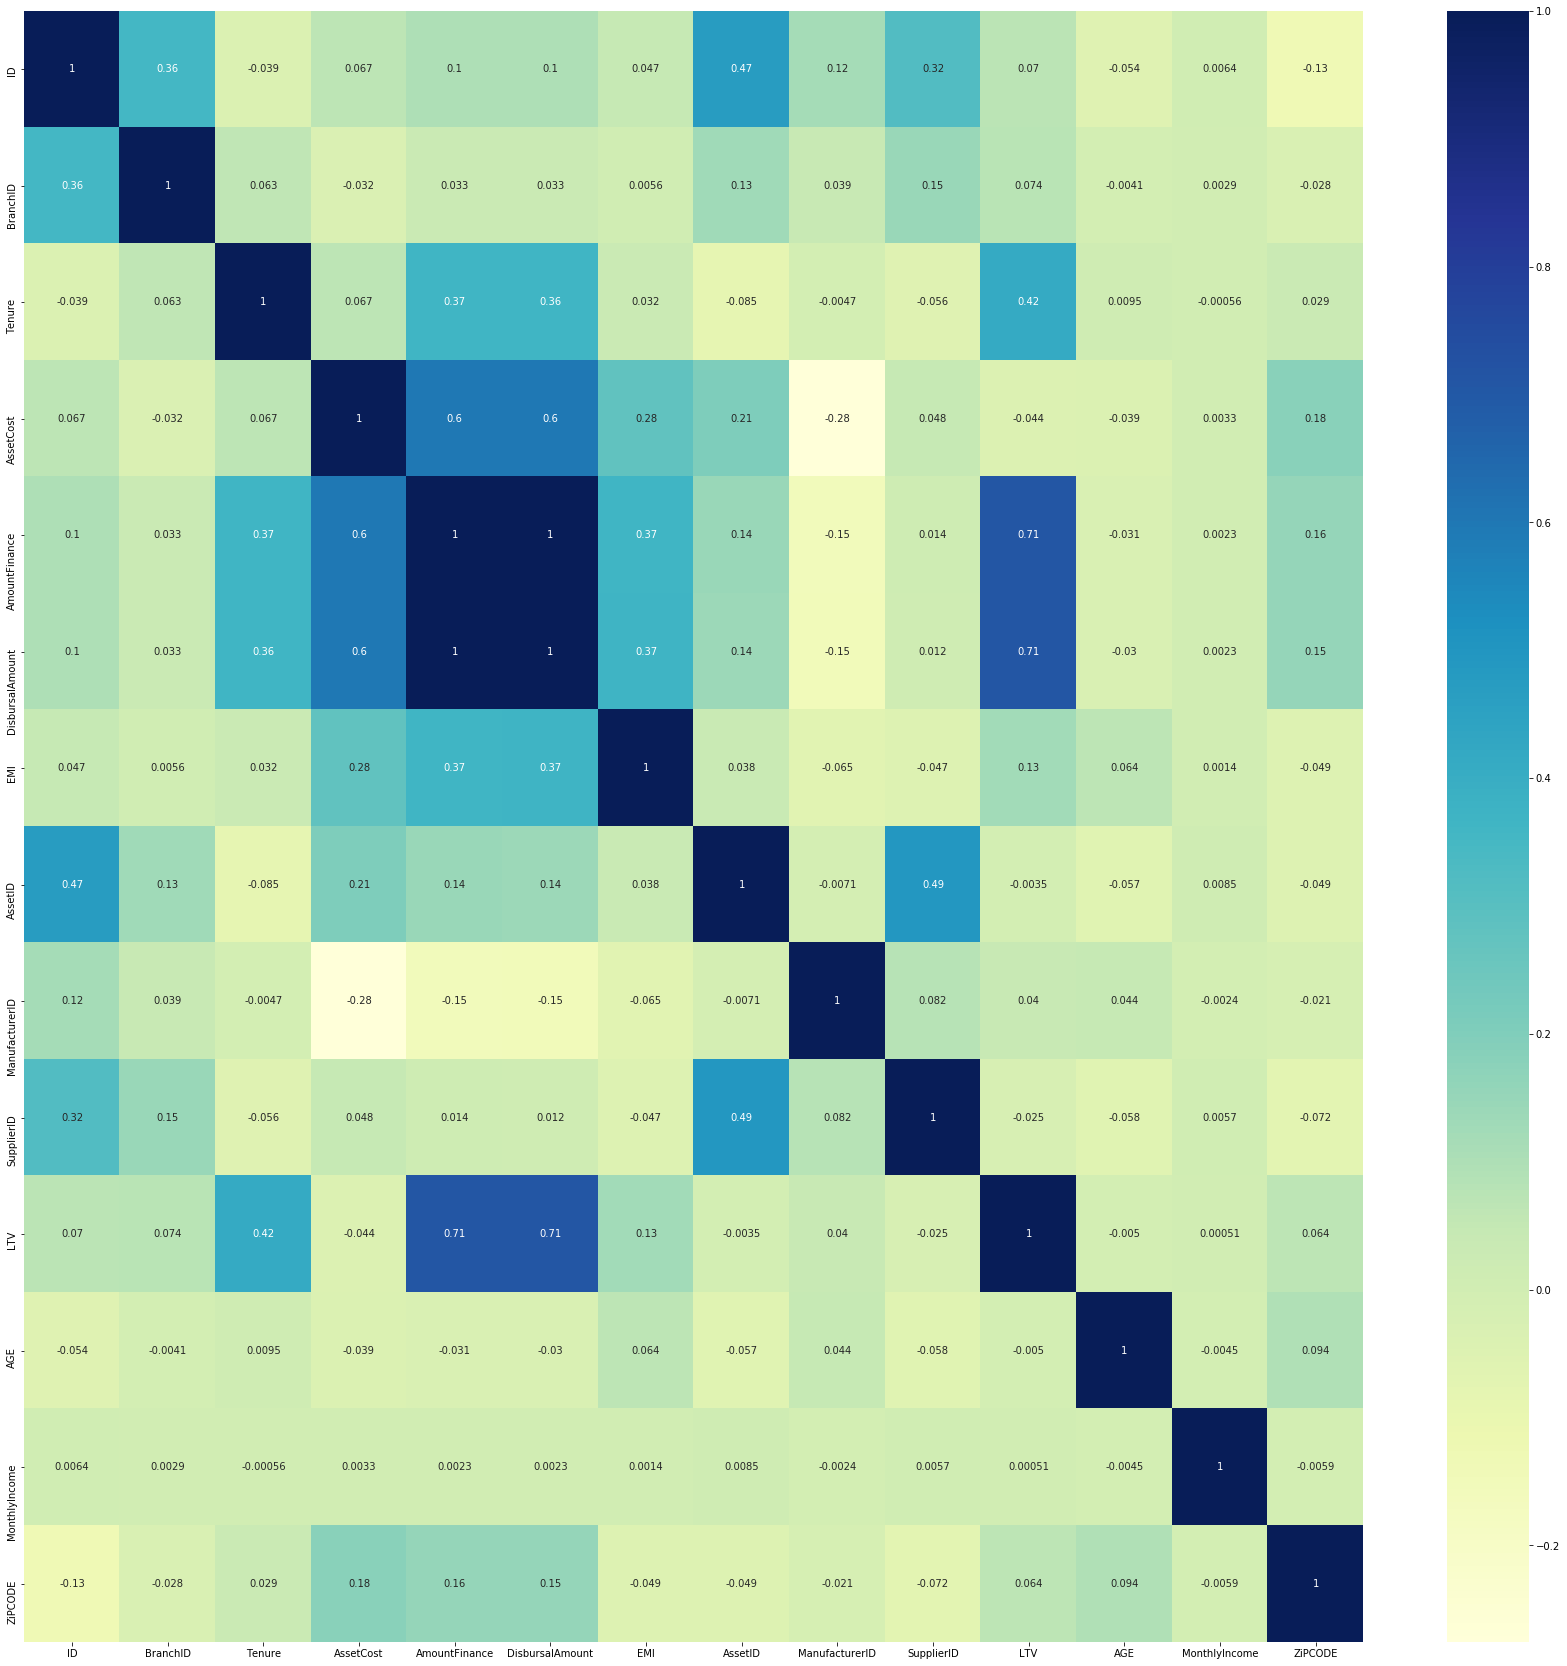

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(),annot=True,cmap='YlGnBu')

From the above we can see that the AccountFinance and DisbursedAmount is highly correlated with eachother, so we need to drop one of the features, and asset cost is also highly correlated as amount should be near equal to asset.

In [11]:
train_df.drop(['AmountFinance'],axis=1,inplace=True)
test_df.drop(['AmountFinance'],axis=1,inplace=True)

In [12]:
train_df['Top-up Month'].value_counts()

No Top-up Service    106123
 > 48 Months           8324
36-48 Months           3647
24-30 Months           3491
30-36 Months           3059
18-24 Months           2366
12-18 Months           1034
Name: Top-up Month, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
cat_col_mask=['Frequency','InstlmentMode','LoanStatus','PaymentMode','State','SEX']
label=['Top-up Month']
le=LabelEncoder()
for col in cat_col_mask:
    le.fit(train_df[col].unique().tolist() + test_df[col].unique().tolist())
    train_df[col]=le.transform(train_df[col])
    test_df[col]=le.transform(test_df[col])
train_df[label]=le.fit_transform(train_df[label])

In [14]:
train_df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month
0,1,2,1,1,9,1,48,450000,275000.0,24000.0,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,0
1,2,2,0,1,7,333,47,485000,350000.0,10500.0,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,6
2,3,3,1,0,3,1,68,690000,519728.0,38300.0,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1
3,7,2,0,1,1,125,48,480000,400000.0,11600.0,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,0
4,8,2,1,1,1,152,44,619265,440000.0,15000.0,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,5


### Creating Features from Feature Engineering

In [46]:
train_df1=pd.read_csv("train_bureau.csv")
train_df1.head(10)

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30 00:00:00,Individual,Delinquent,2015-10-05 00:00:00,NaN,2018-02-27 00:00:00,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-03-19 00:00:00,NaN,2019-12-19 00:00:00,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31 00:00:00,Individual,Active,2019-08-30 00:00:00,NaN,NaN,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-09-27 00:00:00,2017-09-21 00:00:00,NaN,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29 00:00:00,Individual,Closed,2012-02-10 00:00:00,2016-02-01 00:00:00,NaN,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
5,1,False,PRIMARY,Credit Card,NAB,2018-04-30 00:00:00,Individual,Closed,2018-01-11 00:00:00,2018-03-13 00:00:00,NaN,"50,000",0,NaN,0,NaN,NaN,0.0,Standard,"20180331,20180228,20180131,",000000000,"24650,17300,0,",",,,",",,,,",NaN
6,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31 00:00:00,Individual,Active,2018-11-15 00:00:00,NaN,2019-12-15 00:00:00,NaN,"5,00,000","7,934/Monthly","4,43,769",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",000000000000000000000000000000000000000000,"443769,448365,453134,457687,462320,466802,4712...",",,,,,,,,,,,,,,",",,,,,,,,,,,,,,",84.0
7,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30 00:00:00,Individual,Closed,2013-01-30 00:00:00,2017-09-21 00:00:00,NaN,NaN,"5,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0000000000000870540270270000320000000000...,"0,,0,0,0,0,0,0,0,13060,13060,25982,38767,51417...","0,,0,0,0,0,3064,3064,3064,2972,0,2802,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
8,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-07-31 00:00:00,Individual,Closed,2013-06-11 00:00:00,2017-07-01 00:00:00,NaN,NaN,"4,00,000",NaN,0,NaN,0,0.0,NaN,"20170731,20170601,20170531,20170430,20170331,2...",000DDD0220210220190220220000270000000000000000...,"0,,0,10487,20862,31126,41281,51328,51328,71101...","0,,1722,1722,1722,1722,1722,1722,0,1625,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
9,2,False,PRIMARY,Overdraft,PRB,2017-03-31 00:00:00,Individual,Closed,2016-01-15 00:00:00,2017-03-27 00:00:00,2017-03-27 00:00:00,NaN,"17,00,000",NaN,0,NaN,0,0.0,NaN,"20170331,20170201,20170101,20161231,20161101,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,1699997,,,154997,,,-3,,,149997,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN


In [47]:
import datetime
def preprocess(df):
    df.dropna(subset=['DISBURSED-DT','REPORTED DATE - HIST'], how='all',inplace=True)
    df.sort_values(['DISBURSED-DT'],inplace=True)
    df['diff']=df.groupby('ID')['DISBURSED-DT'].diff().fillna(pd.Timedelta(seconds=0))
    df['diff_months']=df['diff'].astype('timedelta64[M]')
    bins=[0,12,18,24,30,36,48,100]
    groups=df.groupby(['ID',pd.cut(df.diff_months,bins)])
    stacked=groups.size().unstack()
    df['DISBURSED-AMT/HIGH CREDIT'].fillna('0',inplace=True)
    df['DISBURSED-AMT/HIGH CREDIT']=df['DISBURSED-AMT/HIGH CREDIT'].str.replace(',','')
    df['DISBURSED-AMT/HIGH CREDIT']=df['DISBURSED-AMT/HIGH CREDIT'].astype('int')
    df['CURRENT-BAL'].fillna('0',inplace=True)
    df['CURRENT-BAL']=df['CURRENT-BAL'].str.replace(',','')
    df['CURRENT-BAL']=df['CURRENT-BAL'].astype('int')
    total1=df.groupby(by='ID',as_index=False)['DISBURSED-AMT/HIGH CREDIT','CURRENT-BAL'].mean()
    total1.rename(columns={'DISBURSED-AMT/HIGH CREDIT':'AvgCredit','CURRENT-BAL':'AvgOverdue'},inplace=True)
    total2=total1.merge(stacked, on='ID', how='inner')
    return total2

In [48]:
train_df1['DISBURSED-DT']=train_df1['DISBURSED-DT'].str.split(" ").str[0]
train_df1['DISBURSED-DT'].fillna(train_df1['REPORTED DATE - HIST'].str.rsplit(',').str[-2],inplace=True)
train_df1['DISBURSED-DT']=pd.to_datetime(train_df1['DISBURSED-DT'],errors='coerce')
train_df2=preprocess(train_df1)
train_df2.head(10)

,ID,AvgCredit,AvgOverdue,"(0, 12]","(12, 18]","(18, 24]","(24, 30]","(30, 36]","(36, 48]","(48, 100]"
0,1,2.445947e+05,68725.111111,6,0,1,1,0,0,0
1,2,1.393622e+06,796112.076923,6,1,1,0,0,0,0
2,3,1.196248e+05,66618.225806,19,2,0,1,1,0,0
3,7,3.181382e+05,156000.000000,2,0,0,0,0,0,1
4,8,2.893166e+05,139159.857143,1,1,0,1,1,0,0
5,9,2.800000e+05,0.000000,0,0,0,0,0,0,0
6,10,3.880893e+05,94574.333333,0,0,1,0,0,0,1
7,11,4.342814e+05,157069.600000,14,3,0,0,0,0,0
8,12,4.000000e+05,0.000000,0,0,0,0,0,0,0
9,13,5.075000e+05,0.000000,0,0,0,1,0,0,0


In [49]:
train_df12=train_df.merge(train_df2, on='ID', how='inner')
train_df12

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month,AvgCredit,AvgOverdue,"(0, 12]","(12, 18]","(18, 24]","(24, 30]","(30, 36]","(36, 48]","(48, 100]"
0,1,2,1,1,9,1,48,450000,275000.0,24000.0,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,0,2.445947e+05,68725.111111,6,0,1,1,0,0,0
1,2,2,0,1,7,333,47,485000,350000.0,10500.0,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,6,1.393622e+06,796112.076923,6,1,1,0,0,0,0
2,3,3,1,0,3,1,68,690000,519728.0,38300.0,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1,1.196248e+05,66618.225806,19,2,0,1,1,0,0
3,7,2,0,1,1,125,48,480000,400000.0,11600.0,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,0,3.181382e+05,156000.000000,2,0,0,0,0,0,1
4,8,2,1,1,1,152,44,619265,440000.0,15000.0,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,5,2.893166e+05,139159.857143,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128039,143390,1,1,1,3,424,24,470000,265601.0,76800.0,31286914,1568,48879,40.17,1,25.0,65333.33,8,131403.0,3,1.043800e+06,933815.000000,1,0,0,0,0,0,0
128040,143391,1,1,1,3,424,24,460000,275630.0,80100.0,31295422,1568,48879,59.92,1,25.0,83333.33,8,131403.0,6,2.756300e+05,73890.000000,0,0,0,0,0,0,0
128041,143393,2,1,0,3,424,23,545000,300733.0,15277.0,32145629,1568,44118,52.38,1,36.0,248500.00,8,131024.0,6,1.761380e+05,38533.250000,3,0,0,0,0,0,0
128042,143394,1,1,0,3,424,35,350000,250962.0,74341.0,32509866,1568,48879,50.37,1,37.0,84500.00,8,131103.0,6,2.506430e+05,132487.000000,0,0,0,0,0,0,0


In [50]:
train_df12.isnull().sum()

ID                 0
Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
DisbursalAmount    0
EMI                0
AssetID            0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
Top-up Month       0
AvgCredit          0
AvgOverdue         0
(0, 12]            0
(12, 18]           0
(18, 24]           0
(24, 30]           0
(30, 36]           0
(36, 48]           0
(48, 100]          0
dtype: int64

In [51]:
test_df1=pd.read_excel('test_bureau.xlsx')
test_df1

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,4,False,PRIMARY,Credit Card,CCC,2019-11-17,Individual,Active,2019-09-26,NaN,NaT,"10,000",588,NaN,589,NaN,0,0.0,NaN,"20191117,",000,"589,","0,","0,",NaN
1,4,False,PRIMARY,Housing Loan,HFC,2019-10-31,Joint,Active,2017-06-21,NaN,2019-10-15,NaN,"25,00,000","30,797/Monthly","21,07,227",F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"2107227,2122196,2136877,2151448,2165910,218026...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
2,4,False,PRIMARY,Property Loan,HFC,2019-10-31,Joint,Active,2017-06-27,NaN,2019-10-15,NaN,"99,000","1,223/Monthly","83,458",F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"83458,84051,84632,85209,85781,86349,86913,8747...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
3,4,True,PRIMARY,Tractor Loan,NBF,2015-10-31,Individual,Closed,2011-12-29,2015-10-13 00:00:00,NaT,NaN,"3,65,000",NaN,0,NaN,0,0.0,NaN,"20151031,20150901,20150831,20150731,20150630,2...",000DDD0270000000000000000000000000000000000000...,"0,,21548,32097,42500,52758,62874,72850,82688,9...","0,,11000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,5,False,PRIMARY,Gold Loan,PRB,2017-08-31,Individual,Closed,2016-05-04,2017-06-15 00:00:00,2017-06-15,NaN,"25,801",NaN,0,NaN,0,0.0,NaN,"20170630,20170501,20170401,20170331,20170201,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,25846,,,25846,,,25846,,,25846,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64014,143400,False,PRIMARY,Construction Equipment Loan,PRB,2019-10-31,Joint,Active,2017-04-12,NaN,2019-10-16,NaN,"12,30,000",NaN,"2,04,173",NaN,0,0.0,Standard,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"204173,243754,282926,321694,360063,398035,4356...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","42120,42120,42120,42120,42120,42120,42120,4212...",NaN
64015,143400,False,PRIMARY,Commercial Vehicle Loan,PRB,2018-02-28,Joint,Closed,2015-05-16,2018-02-24 00:00:00,2018-02-24,NaN,"20,00,000",NaN,0,NaN,0,0.0,Standard,"20180228,20180131,20171231,20171130,20171031,2...",0000000000000000000000000000000000000000000000...,"0,0,0,0,0,0,0,0,0,0,0,100494,200014,298570,396...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","1796,0,0,0,0,0,0,0,0,0,101475,101475,101475,10...",NaN
64016,143400,False,PRIMARY,Construction Equipment Loan,PRB,2019-10-31,Joint,Active,2017-04-12,NaN,2019-10-16,NaN,"10,80,000",NaN,"1,79,276",NaN,0,0.0,Standard,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"179276,214030,248425,282466,316155,349498,3824...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","36984,36984,36984,36984,36984,36984,36984,3698...",NaN
64017,143400,True,PRIMARY,Tractor Loan,NBF,2014-08-31,Individual,Closed,2013-05-28,2014-08-31 00:00:00,NaT,NaN,"3,10,000",NaN,0,NaN,0,0.0,NaN,"20140831,20140731,20140630,20140531,20140430,2...",000000000000000000000000000000000000000000000000,"0,0,0,27840,55324,82457,109244,135689,161796,1...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",",,,,,,,,,,,,,,,,,",NaN


In [52]:
test_df1.isnull().sum()

ID                               0
SELF-INDICATOR                   0
MATCH-TYPE                       0
ACCT-TYPE                        0
CONTRIBUTOR-TYPE                 0
DATE-REPORTED                    0
OWNERSHIP-IND                    0
ACCOUNT-STATUS                   0
DISBURSED-DT                    44
CLOSE-DT                     31453
LAST-PAYMENT-DATE            32550
CREDIT-LIMIT/SANC AMT        62421
DISBURSED-AMT/HIGH CREDIT       38
INSTALLMENT-AMT              47693
CURRENT-BAL                     32
INSTALLMENT-FREQUENCY        48243
OVERDUE-AMT                  13127
WRITE-OFF-AMT                 2561
ASSET_CLASS                  34902
REPORTED DATE - HIST          2561
DPD - HIST                    2565
CUR BAL - HIST                2561
AMT OVERDUE - HIST            2561
AMT PAID - HIST               2672
TENURE                       42882
dtype: int64

In [53]:
test_df2=preprocess(test_df1)
test_df2

,ID,AvgCredit,AvgOverdue,"(0, 12]","(12, 18]","(18, 24]","(24, 30]","(30, 36]","(36, 48]","(48, 100]"
0,4,7.411470e+05,5.478185e+05,0,0,0,1,0,0,1
1,5,2.424766e+05,1.134039e+05,5,0,1,0,1,0,0
2,6,2.697801e+05,8.566667e+03,4,2,1,1,0,0,0
3,25,4.000000e+05,6.379650e+04,0,1,0,0,0,0,0
4,119,4.650000e+05,5.810000e+04,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14740,143396,1.292226e+06,3.140004e+05,10,2,0,0,1,0,0
14741,143397,8.443833e+06,6.406842e+06,1,0,2,0,0,0,1
14742,143398,8.443833e+06,6.406842e+06,1,0,2,0,0,0,1
14743,143399,8.232919e+05,4.599900e+04,5,1,0,0,1,0,0


In [54]:
test_df12=test_df.merge(test_df2, on='ID', how='inner')
test_df12

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,AvgCredit,AvgOverdue,"(0, 12]","(12, 18]","(18, 24]","(24, 30]","(30, 36]","(36, 48]","(48, 100]"
0,4,2,0,1,9,2,46,480000,365000.00,1000.0,3524747,1046.0,22354,75.83,1,50.0,32069.00,12,473001.0,741147.000000,547818.500000,0,0,0,1,0,0,1
1,5,2,0,1,7,2,45,480000,285000.00,9300.0,4985862,1046.0,22354,57.44,1,35.0,25000.00,12,473001.0,242476.625000,113403.875000,5,0,1,0,1,0,0
2,6,3,1,1,7,2,48,580000,400000.00,35800.0,12881783,1060.0,65929,68.97,1,37.0,23333.33,12,473001.0,269780.083333,8566.666667,4,2,1,1,0,0,0
3,25,1,1,1,1,154,36,725000,500000.00,52000.0,10613776,1049.0,68597,61.79,1,55.0,91666.67,4,493558.0,400000.000000,63796.500000,0,1,0,0,0,0,0
4,119,3,1,1,7,194,48,617000,400000.00,35400.0,7911110,1049.0,38493,59.09,1,48.0,12500.00,14,754137.0,465000.000000,58100.000000,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14723,143346,3,1,1,3,396,60,590000,320000.00,24500.0,29496360,1568.0,138500,50.08,1,37.0,141666.67,19,245304.0,320000.000000,0.000000,0,0,0,0,0,0,0
14724,143347,2,1,0,3,396,32,370000,327522.69,12700.0,30007571,1568.0,138500,64.14,1,42.0,50000.00,19,245304.0,166827.000000,97092.400000,2,0,0,0,0,0,1
14725,143348,2,1,0,3,396,29,350000,240972.40,10100.0,30743599,1568.0,138500,57.14,1,46.0,58333.33,19,245101.0,200000.000000,92545.000000,0,0,0,0,0,0,0
14726,143355,1,1,1,4,399,60,580000,522638.00,78959.0,30082237,1568.0,86345,90.11,1,21.0,113958.33,16,331402.0,522638.000000,440400.000000,0,0,0,0,0,0,0


In [55]:
test_df12.isnull().sum()

ID                 0
Frequency          0
InstlmentMode      0
LoanStatus         0
PaymentMode        0
BranchID           0
Tenure             0
AssetCost          0
DisbursalAmount    0
EMI                0
AssetID            0
ManufacturerID     0
SupplierID         0
LTV                0
SEX                0
AGE                0
MonthlyIncome      0
State              0
ZiPCODE            0
AvgCredit          0
AvgOverdue         0
(0, 12]            0
(12, 18]           0
(18, 24]           0
(24, 30]           0
(30, 36]           0
(36, 48]           0
(48, 100]          0
dtype: int64

In [60]:
x=train_df12.drop(['Top-up Month','ID'],axis=1)
x

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,AvgCredit,AvgOverdue,"(0, 12]","(12, 18]","(18, 24]","(24, 30]","(30, 36]","(36, 48]","(48, 100]"
0,2,1,1,9,1,48,450000,275000.0,24000.0,4022465,1568,21946,61.11,1,49.0,35833.33,12,464993.0,2.445947e+05,68725.111111,6,0,1,1,0,0,0
1,2,0,1,7,333,47,485000,350000.0,10500.0,4681175,1062,34802,70.00,1,23.0,666.67,12,466001.0,1.393622e+06,796112.076923,6,1,1,0,0,0,0
2,3,1,0,3,1,68,690000,519728.0,38300.0,25328146,1060,127335,69.77,1,39.0,45257.00,12,462030.0,1.196248e+05,66618.225806,19,2,0,1,1,0,0
3,2,0,1,1,125,48,480000,400000.0,11600.0,13021591,1060,25094,80.92,1,24.0,20833.33,12,473335.0,3.181382e+05,156000.000000,2,0,0,0,0,0,1
4,2,1,1,1,152,44,619265,440000.0,15000.0,3291320,1046,21853,71.05,1,56.0,27313.67,4,495442.0,2.893166e+05,139159.857143,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128039,1,1,1,3,424,24,470000,265601.0,76800.0,31286914,1568,48879,40.17,1,25.0,65333.33,8,131403.0,1.043800e+06,933815.000000,1,0,0,0,0,0,0
128040,1,1,1,3,424,24,460000,275630.0,80100.0,31295422,1568,48879,59.92,1,25.0,83333.33,8,131403.0,2.756300e+05,73890.000000,0,0,0,0,0,0,0
128041,2,1,0,3,424,23,545000,300733.0,15277.0,32145629,1568,44118,52.38,1,36.0,248500.00,8,131024.0,1.761380e+05,38533.250000,3,0,0,0,0,0,0
128042,1,1,0,3,424,35,350000,250962.0,74341.0,32509866,1568,48879,50.37,1,37.0,84500.00,8,131103.0,2.506430e+05,132487.000000,0,0,0,0,0,0,0


In [57]:
y=train_df12['Top-up Month']
y

0         0
1         6
2         1
3         0
4         5
         ..
128039    3
128040    6
128041    6
128042    6
128043    6
Name: Top-up Month, Length: 128044, dtype: int32

In [61]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=45,stratify=y)

In [64]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((89630, 27), (38414, 27), (89630,), (38414,))

In [77]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = []
precision = []
recall = []
f1_score = []

def calculate_metrics(y_test,y_pred):
    acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
    f1 = metrics.f1_score(y_true = y_test, y_pred = y_pred,pos_label='positive',average='macro')
    
    accuracy.append(acc)
    f1_score.append(f1)
    
kfold_mean=[]
kfold_max=[]

def calculate_kfold(estimator):
    accuracies = cross_val_score(estimator,x,y, cv=20)
    kfold_mean.append(accuracies.mean())
    kfold_max.append(accuracies.max())

In [78]:
lgbm=LGBMClassifier()
lgbm.fit(x_train,y_train)
lgbmpred=lgbm.predict(x_test)
calculate_metrics(y_test, lgbmpred)
calculate_kfold(lgbm)

In [80]:
import xgboost as xgb
xgbc=xgb.XGBClassifier()
xgbc.fit(x_train,y_train)
xgbcpred=xgbc.predict(x_test)
calculate_metrics(y_test, xgbcpred)
calculate_kfold(xgbc)

In [81]:
from catboost import CatBoostClassifier
catbost=CatBoostClassifier()
catbost.fit(x_train,y_train)
catboostpred=catbost.predict(x_test)
calculate_metrics(y_test, catboostpred)
calculate_kfold(catbost)

Learning rate set to 0.099517
0:	learn: 1.5728022	total: 166ms	remaining: 2m 45s
1:	learn: 1.3646538	total: 249ms	remaining: 2m 4s
2:	learn: 1.2252157	total: 340ms	remaining: 1m 53s
3:	learn: 1.1199105	total: 425ms	remaining: 1m 45s
4:	learn: 1.0404088	total: 586ms	remaining: 1m 56s
5:	learn: 0.9753409	total: 678ms	remaining: 1m 52s
6:	learn: 0.9207204	total: 766ms	remaining: 1m 48s
7:	learn: 0.8748021	total: 850ms	remaining: 1m 45s
8:	learn: 0.8360876	total: 917ms	remaining: 1m 40s
9:	learn: 0.8032272	total: 986ms	remaining: 1m 37s
10:	learn: 0.7753474	total: 1.06s	remaining: 1m 35s
11:	learn: 0.7517182	total: 1.15s	remaining: 1m 34s
12:	learn: 0.7324195	total: 1.22s	remaining: 1m 32s
13:	learn: 0.7124522	total: 1.31s	remaining: 1m 31s
14:	learn: 0.6987668	total: 1.4s	remaining: 1m 31s
15:	learn: 0.6840231	total: 1.5s	remaining: 1m 32s
16:	learn: 0.6685713	total: 1.58s	remaining: 1m 31s
17:	learn: 0.6575328	total: 1.65s	remaining: 1m 30s
18:	learn: 0.6448866	total: 1.75s	remaining: 1m

162:	learn: 0.4829235	total: 11.7s	remaining: 1m
163:	learn: 0.4828261	total: 11.8s	remaining: 59.9s
164:	learn: 0.4827430	total: 11.8s	remaining: 59.7s
165:	learn: 0.4825464	total: 11.9s	remaining: 59.6s
166:	learn: 0.4823711	total: 11.9s	remaining: 59.5s
167:	learn: 0.4820687	total: 12s	remaining: 59.4s
168:	learn: 0.4818468	total: 12.1s	remaining: 59.6s
169:	learn: 0.4816834	total: 12.2s	remaining: 59.6s
170:	learn: 0.4815069	total: 12.3s	remaining: 59.4s
171:	learn: 0.4812749	total: 12.3s	remaining: 59.3s
172:	learn: 0.4809631	total: 12.4s	remaining: 59.2s
173:	learn: 0.4807840	total: 12.4s	remaining: 59s
174:	learn: 0.4805774	total: 12.5s	remaining: 58.8s
175:	learn: 0.4803682	total: 12.5s	remaining: 58.7s
176:	learn: 0.4802575	total: 12.6s	remaining: 58.7s
177:	learn: 0.4801221	total: 12.7s	remaining: 58.5s
178:	learn: 0.4799170	total: 12.7s	remaining: 58.4s
179:	learn: 0.4798234	total: 12.8s	remaining: 58.2s
180:	learn: 0.4795717	total: 12.8s	remaining: 58.1s
181:	learn: 0.47938

321:	learn: 0.4579958	total: 21.3s	remaining: 44.8s
322:	learn: 0.4577857	total: 21.4s	remaining: 44.8s
323:	learn: 0.4576658	total: 21.4s	remaining: 44.7s
324:	learn: 0.4575852	total: 21.5s	remaining: 44.6s
325:	learn: 0.4574847	total: 21.5s	remaining: 44.5s
326:	learn: 0.4573915	total: 21.6s	remaining: 44.4s
327:	learn: 0.4571938	total: 21.6s	remaining: 44.3s
328:	learn: 0.4570443	total: 21.7s	remaining: 44.3s
329:	learn: 0.4569277	total: 21.8s	remaining: 44.2s
330:	learn: 0.4568068	total: 21.8s	remaining: 44.1s
331:	learn: 0.4566764	total: 21.9s	remaining: 44s
332:	learn: 0.4565843	total: 22s	remaining: 44s
333:	learn: 0.4563880	total: 22.1s	remaining: 44s
334:	learn: 0.4563050	total: 22.1s	remaining: 43.9s
335:	learn: 0.4560991	total: 22.2s	remaining: 43.9s
336:	learn: 0.4559231	total: 22.3s	remaining: 43.8s
337:	learn: 0.4557684	total: 22.3s	remaining: 43.7s
338:	learn: 0.4555850	total: 22.4s	remaining: 43.6s
339:	learn: 0.4554367	total: 22.4s	remaining: 43.6s
340:	learn: 0.455359

482:	learn: 0.4392970	total: 30s	remaining: 32.1s
483:	learn: 0.4391337	total: 30s	remaining: 32s
484:	learn: 0.4390128	total: 30.1s	remaining: 31.9s
485:	learn: 0.4389362	total: 30.1s	remaining: 31.8s
486:	learn: 0.4387710	total: 30.2s	remaining: 31.8s
487:	learn: 0.4387105	total: 30.2s	remaining: 31.7s
488:	learn: 0.4386326	total: 30.3s	remaining: 31.6s
489:	learn: 0.4384839	total: 30.3s	remaining: 31.5s
490:	learn: 0.4383655	total: 30.4s	remaining: 31.5s
491:	learn: 0.4382730	total: 30.4s	remaining: 31.4s
492:	learn: 0.4381113	total: 30.5s	remaining: 31.3s
493:	learn: 0.4379965	total: 30.5s	remaining: 31.3s
494:	learn: 0.4379019	total: 30.6s	remaining: 31.2s
495:	learn: 0.4377901	total: 30.6s	remaining: 31.1s
496:	learn: 0.4376849	total: 30.7s	remaining: 31s
497:	learn: 0.4375524	total: 30.7s	remaining: 31s
498:	learn: 0.4374011	total: 30.8s	remaining: 30.9s
499:	learn: 0.4372652	total: 30.8s	remaining: 30.8s
500:	learn: 0.4371183	total: 30.9s	remaining: 30.8s
501:	learn: 0.4370356	

642:	learn: 0.4216443	total: 38s	remaining: 21.1s
643:	learn: 0.4215584	total: 38.1s	remaining: 21.1s
644:	learn: 0.4214864	total: 38.2s	remaining: 21s
645:	learn: 0.4214005	total: 38.3s	remaining: 21s
646:	learn: 0.4213353	total: 38.3s	remaining: 20.9s
647:	learn: 0.4211308	total: 38.4s	remaining: 20.8s
648:	learn: 0.4210717	total: 38.4s	remaining: 20.8s
649:	learn: 0.4210433	total: 38.5s	remaining: 20.7s
650:	learn: 0.4209715	total: 38.5s	remaining: 20.6s
651:	learn: 0.4208809	total: 38.5s	remaining: 20.6s
652:	learn: 0.4207847	total: 38.6s	remaining: 20.5s
653:	learn: 0.4207127	total: 38.7s	remaining: 20.4s
654:	learn: 0.4206157	total: 38.7s	remaining: 20.4s
655:	learn: 0.4205362	total: 38.8s	remaining: 20.3s
656:	learn: 0.4203387	total: 38.8s	remaining: 20.3s
657:	learn: 0.4202265	total: 38.9s	remaining: 20.2s
658:	learn: 0.4201644	total: 38.9s	remaining: 20.1s
659:	learn: 0.4200747	total: 39s	remaining: 20.1s
660:	learn: 0.4199625	total: 39s	remaining: 20s
661:	learn: 0.4198096	to

801:	learn: 0.4063001	total: 46.5s	remaining: 11.5s
802:	learn: 0.4062739	total: 46.5s	remaining: 11.4s
803:	learn: 0.4061033	total: 46.6s	remaining: 11.4s
804:	learn: 0.4060336	total: 46.7s	remaining: 11.3s
805:	learn: 0.4059633	total: 46.8s	remaining: 11.3s
806:	learn: 0.4057786	total: 46.8s	remaining: 11.2s
807:	learn: 0.4056786	total: 46.9s	remaining: 11.1s
808:	learn: 0.4055747	total: 47s	remaining: 11.1s
809:	learn: 0.4054417	total: 47s	remaining: 11s
810:	learn: 0.4053332	total: 47.1s	remaining: 11s
811:	learn: 0.4052888	total: 47.1s	remaining: 10.9s
812:	learn: 0.4051770	total: 47.2s	remaining: 10.9s
813:	learn: 0.4051166	total: 47.3s	remaining: 10.8s
814:	learn: 0.4050882	total: 47.3s	remaining: 10.7s
815:	learn: 0.4050238	total: 47.4s	remaining: 10.7s
816:	learn: 0.4049444	total: 47.4s	remaining: 10.6s
817:	learn: 0.4048872	total: 47.5s	remaining: 10.6s
818:	learn: 0.4047935	total: 47.6s	remaining: 10.5s
819:	learn: 0.4047460	total: 47.6s	remaining: 10.4s
820:	learn: 0.404601

961:	learn: 0.3913924	total: 56.4s	remaining: 2.23s
962:	learn: 0.3912597	total: 56.4s	remaining: 2.17s
963:	learn: 0.3911670	total: 56.5s	remaining: 2.11s
964:	learn: 0.3911118	total: 56.5s	remaining: 2.05s
965:	learn: 0.3909948	total: 56.6s	remaining: 1.99s
966:	learn: 0.3909188	total: 56.7s	remaining: 1.93s
967:	learn: 0.3908339	total: 56.7s	remaining: 1.88s
968:	learn: 0.3907283	total: 56.8s	remaining: 1.82s
969:	learn: 0.3906221	total: 56.8s	remaining: 1.76s
970:	learn: 0.3904935	total: 56.9s	remaining: 1.7s
971:	learn: 0.3904537	total: 57s	remaining: 1.64s
972:	learn: 0.3903323	total: 57s	remaining: 1.58s
973:	learn: 0.3902495	total: 57.1s	remaining: 1.52s
974:	learn: 0.3901809	total: 57.1s	remaining: 1.46s
975:	learn: 0.3900633	total: 57.2s	remaining: 1.41s
976:	learn: 0.3900139	total: 57.3s	remaining: 1.35s
977:	learn: 0.3899914	total: 57.3s	remaining: 1.29s
978:	learn: 0.3899689	total: 57.4s	remaining: 1.23s
979:	learn: 0.3898929	total: 57.4s	remaining: 1.17s
980:	learn: 0.389

120:	learn: 0.4944063	total: 9.96s	remaining: 1m 12s
121:	learn: 0.4941921	total: 10s	remaining: 1m 12s
122:	learn: 0.4937400	total: 10.1s	remaining: 1m 12s
123:	learn: 0.4935412	total: 10.2s	remaining: 1m 12s
124:	learn: 0.4933721	total: 10.3s	remaining: 1m 12s
125:	learn: 0.4930452	total: 10.4s	remaining: 1m 11s
126:	learn: 0.4928227	total: 10.4s	remaining: 1m 11s
127:	learn: 0.4924406	total: 10.5s	remaining: 1m 11s
128:	learn: 0.4922832	total: 10.6s	remaining: 1m 11s
129:	learn: 0.4920344	total: 10.7s	remaining: 1m 11s
130:	learn: 0.4918439	total: 10.8s	remaining: 1m 11s
131:	learn: 0.4914641	total: 10.8s	remaining: 1m 11s
132:	learn: 0.4912562	total: 10.9s	remaining: 1m 11s
133:	learn: 0.4910582	total: 11s	remaining: 1m 10s
134:	learn: 0.4905442	total: 11s	remaining: 1m 10s
135:	learn: 0.4904038	total: 11.1s	remaining: 1m 10s
136:	learn: 0.4901813	total: 11.2s	remaining: 1m 10s
137:	learn: 0.4897420	total: 11.3s	remaining: 1m 10s
138:	learn: 0.4895604	total: 11.3s	remaining: 1m 10s

280:	learn: 0.4674007	total: 22.3s	remaining: 57s
281:	learn: 0.4672971	total: 22.3s	remaining: 56.9s
282:	learn: 0.4670875	total: 22.4s	remaining: 56.8s
283:	learn: 0.4669541	total: 22.5s	remaining: 56.7s
284:	learn: 0.4668537	total: 22.6s	remaining: 56.6s
285:	learn: 0.4667088	total: 22.7s	remaining: 56.6s
286:	learn: 0.4665319	total: 22.7s	remaining: 56.5s
287:	learn: 0.4663823	total: 22.8s	remaining: 56.4s
288:	learn: 0.4662726	total: 22.9s	remaining: 56.3s
289:	learn: 0.4661183	total: 23s	remaining: 56.2s
290:	learn: 0.4660052	total: 23s	remaining: 56.1s
291:	learn: 0.4658987	total: 23.1s	remaining: 56.1s
292:	learn: 0.4658018	total: 23.2s	remaining: 55.9s
293:	learn: 0.4656414	total: 23.3s	remaining: 55.9s
294:	learn: 0.4655533	total: 23.3s	remaining: 55.8s
295:	learn: 0.4654668	total: 23.4s	remaining: 55.7s
296:	learn: 0.4653178	total: 23.5s	remaining: 55.6s
297:	learn: 0.4652319	total: 23.6s	remaining: 55.5s
298:	learn: 0.4651488	total: 23.6s	remaining: 55.4s
299:	learn: 0.4650

439:	learn: 0.4506931	total: 34.4s	remaining: 43.8s
440:	learn: 0.4506380	total: 34.5s	remaining: 43.7s
441:	learn: 0.4505829	total: 34.5s	remaining: 43.6s
442:	learn: 0.4504591	total: 34.6s	remaining: 43.5s
443:	learn: 0.4503607	total: 34.7s	remaining: 43.4s
444:	learn: 0.4502914	total: 34.8s	remaining: 43.4s
445:	learn: 0.4502035	total: 34.8s	remaining: 43.3s
446:	learn: 0.4501562	total: 34.9s	remaining: 43.2s
447:	learn: 0.4500271	total: 35s	remaining: 43.1s
448:	learn: 0.4499964	total: 35.1s	remaining: 43s
449:	learn: 0.4499497	total: 35.1s	remaining: 42.9s
450:	learn: 0.4498742	total: 35.2s	remaining: 42.9s
451:	learn: 0.4497729	total: 35.3s	remaining: 42.8s
452:	learn: 0.4496954	total: 35.4s	remaining: 42.7s
453:	learn: 0.4496122	total: 35.4s	remaining: 42.6s
454:	learn: 0.4495039	total: 35.5s	remaining: 42.5s
455:	learn: 0.4493818	total: 35.6s	remaining: 42.5s
456:	learn: 0.4492437	total: 35.7s	remaining: 42.4s
457:	learn: 0.4491491	total: 35.8s	remaining: 42.3s
458:	learn: 0.44

600:	learn: 0.4360018	total: 46.8s	remaining: 31.1s
601:	learn: 0.4358466	total: 46.9s	remaining: 31s
602:	learn: 0.4357574	total: 46.9s	remaining: 30.9s
603:	learn: 0.4356269	total: 47s	remaining: 30.8s
604:	learn: 0.4355670	total: 47.1s	remaining: 30.8s
605:	learn: 0.4355325	total: 47.2s	remaining: 30.7s
606:	learn: 0.4354294	total: 47.3s	remaining: 30.6s
607:	learn: 0.4353734	total: 47.3s	remaining: 30.5s
608:	learn: 0.4352849	total: 47.4s	remaining: 30.4s
609:	learn: 0.4352594	total: 47.5s	remaining: 30.4s
610:	learn: 0.4351970	total: 47.5s	remaining: 30.3s
611:	learn: 0.4350708	total: 47.6s	remaining: 30.2s
612:	learn: 0.4349701	total: 47.7s	remaining: 30.1s
613:	learn: 0.4349035	total: 47.8s	remaining: 30.1s
614:	learn: 0.4348397	total: 47.9s	remaining: 30s
615:	learn: 0.4347869	total: 48s	remaining: 29.9s
616:	learn: 0.4346451	total: 48s	remaining: 29.8s
617:	learn: 0.4345609	total: 48.1s	remaining: 29.7s
618:	learn: 0.4344882	total: 48.2s	remaining: 29.7s
619:	learn: 0.4344248	

759:	learn: 0.4225928	total: 59.2s	remaining: 18.7s
760:	learn: 0.4224943	total: 59.3s	remaining: 18.6s
761:	learn: 0.4224449	total: 59.3s	remaining: 18.5s
762:	learn: 0.4223538	total: 59.4s	remaining: 18.5s
763:	learn: 0.4222819	total: 59.5s	remaining: 18.4s
764:	learn: 0.4222169	total: 59.6s	remaining: 18.3s
765:	learn: 0.4221452	total: 59.7s	remaining: 18.2s
766:	learn: 0.4220931	total: 59.7s	remaining: 18.1s
767:	learn: 0.4219485	total: 59.8s	remaining: 18.1s
768:	learn: 0.4218371	total: 59.9s	remaining: 18s
769:	learn: 0.4217862	total: 60s	remaining: 17.9s
770:	learn: 0.4217045	total: 1m	remaining: 17.8s
771:	learn: 0.4216167	total: 1m	remaining: 17.8s
772:	learn: 0.4214569	total: 1m	remaining: 17.7s
773:	learn: 0.4214281	total: 1m	remaining: 17.6s
774:	learn: 0.4213487	total: 1m	remaining: 17.5s
775:	learn: 0.4212702	total: 1m	remaining: 17.4s
776:	learn: 0.4211809	total: 1m	remaining: 17.4s
777:	learn: 0.4211394	total: 1m	remaining: 17.3s
778:	learn: 0.4210913	total: 1m	remainin

919:	learn: 0.4100779	total: 1m 12s	remaining: 6.33s
920:	learn: 0.4099763	total: 1m 12s	remaining: 6.25s
921:	learn: 0.4098977	total: 1m 13s	remaining: 6.18s
922:	learn: 0.4097358	total: 1m 13s	remaining: 6.1s
923:	learn: 0.4096413	total: 1m 13s	remaining: 6.03s
924:	learn: 0.4095830	total: 1m 13s	remaining: 5.95s
925:	learn: 0.4095090	total: 1m 13s	remaining: 5.87s
926:	learn: 0.4094326	total: 1m 13s	remaining: 5.79s
927:	learn: 0.4093346	total: 1m 13s	remaining: 5.72s
928:	learn: 0.4092562	total: 1m 13s	remaining: 5.64s
929:	learn: 0.4091476	total: 1m 13s	remaining: 5.57s
930:	learn: 0.4090893	total: 1m 14s	remaining: 5.49s
931:	learn: 0.4090675	total: 1m 14s	remaining: 5.41s
932:	learn: 0.4089520	total: 1m 14s	remaining: 5.33s
933:	learn: 0.4088504	total: 1m 14s	remaining: 5.25s
934:	learn: 0.4087741	total: 1m 14s	remaining: 5.18s
935:	learn: 0.4087242	total: 1m 14s	remaining: 5.1s
936:	learn: 0.4085883	total: 1m 14s	remaining: 5.02s
937:	learn: 0.4084946	total: 1m 14s	remaining: 4

77:	learn: 0.5107484	total: 6.39s	remaining: 1m 15s
78:	learn: 0.5100120	total: 6.47s	remaining: 1m 15s
79:	learn: 0.5095026	total: 6.55s	remaining: 1m 15s
80:	learn: 0.5090593	total: 6.65s	remaining: 1m 15s
81:	learn: 0.5086148	total: 6.72s	remaining: 1m 15s
82:	learn: 0.5078383	total: 6.79s	remaining: 1m 15s
83:	learn: 0.5074945	total: 6.87s	remaining: 1m 14s
84:	learn: 0.5071428	total: 6.95s	remaining: 1m 14s
85:	learn: 0.5067052	total: 7.02s	remaining: 1m 14s
86:	learn: 0.5064466	total: 7.1s	remaining: 1m 14s
87:	learn: 0.5062676	total: 7.17s	remaining: 1m 14s
88:	learn: 0.5060757	total: 7.25s	remaining: 1m 14s
89:	learn: 0.5057978	total: 7.33s	remaining: 1m 14s
90:	learn: 0.5055591	total: 7.41s	remaining: 1m 14s
91:	learn: 0.5052435	total: 7.48s	remaining: 1m 13s
92:	learn: 0.5048074	total: 7.57s	remaining: 1m 13s
93:	learn: 0.5045175	total: 7.66s	remaining: 1m 13s
94:	learn: 0.5041697	total: 7.74s	remaining: 1m 13s
95:	learn: 0.5039501	total: 7.81s	remaining: 1m 13s
96:	learn: 0.

236:	learn: 0.4759116	total: 18.5s	remaining: 59.6s
237:	learn: 0.4757724	total: 18.6s	remaining: 59.5s
238:	learn: 0.4756878	total: 18.6s	remaining: 59.4s
239:	learn: 0.4755614	total: 18.7s	remaining: 59.3s
240:	learn: 0.4754355	total: 18.8s	remaining: 59.2s
241:	learn: 0.4753806	total: 18.9s	remaining: 59.1s
242:	learn: 0.4752322	total: 18.9s	remaining: 59s
243:	learn: 0.4750288	total: 19s	remaining: 59s
244:	learn: 0.4747863	total: 19.1s	remaining: 58.9s
245:	learn: 0.4746202	total: 19.2s	remaining: 58.8s
246:	learn: 0.4745388	total: 19.3s	remaining: 58.7s
247:	learn: 0.4744069	total: 19.3s	remaining: 58.6s
248:	learn: 0.4742234	total: 19.4s	remaining: 58.6s
249:	learn: 0.4740794	total: 19.5s	remaining: 58.5s
250:	learn: 0.4739246	total: 19.7s	remaining: 58.7s
251:	learn: 0.4737974	total: 19.8s	remaining: 58.7s
252:	learn: 0.4736584	total: 19.8s	remaining: 58.6s
253:	learn: 0.4736032	total: 19.9s	remaining: 58.5s
254:	learn: 0.4734310	total: 20s	remaining: 58.4s
255:	learn: 0.473317

398:	learn: 0.4560228	total: 31.3s	remaining: 47.2s
399:	learn: 0.4559469	total: 31.4s	remaining: 47.1s
400:	learn: 0.4558265	total: 31.5s	remaining: 47s
401:	learn: 0.4557237	total: 31.5s	remaining: 46.9s
402:	learn: 0.4556394	total: 31.6s	remaining: 46.8s
403:	learn: 0.4555383	total: 31.7s	remaining: 46.8s
404:	learn: 0.4554954	total: 31.8s	remaining: 46.7s
405:	learn: 0.4554195	total: 31.8s	remaining: 46.6s
406:	learn: 0.4553602	total: 31.9s	remaining: 46.5s
407:	learn: 0.4553184	total: 32s	remaining: 46.4s
408:	learn: 0.4552722	total: 32s	remaining: 46.3s
409:	learn: 0.4552358	total: 32.1s	remaining: 46.1s
410:	learn: 0.4551639	total: 32.1s	remaining: 46s
411:	learn: 0.4549944	total: 32.2s	remaining: 46s
412:	learn: 0.4548096	total: 32.3s	remaining: 45.9s
413:	learn: 0.4547447	total: 32.4s	remaining: 45.8s
414:	learn: 0.4546436	total: 32.4s	remaining: 45.7s
415:	learn: 0.4545761	total: 32.5s	remaining: 45.6s
416:	learn: 0.4545129	total: 32.5s	remaining: 45.5s
417:	learn: 0.4544387	

559:	learn: 0.4412916	total: 41.6s	remaining: 32.7s
560:	learn: 0.4411719	total: 41.6s	remaining: 32.6s
561:	learn: 0.4410558	total: 41.7s	remaining: 32.5s
562:	learn: 0.4409560	total: 41.8s	remaining: 32.4s
563:	learn: 0.4408857	total: 41.8s	remaining: 32.3s
564:	learn: 0.4407812	total: 41.9s	remaining: 32.3s
565:	learn: 0.4406863	total: 42s	remaining: 32.2s
566:	learn: 0.4406131	total: 42s	remaining: 32.1s
567:	learn: 0.4405235	total: 42.1s	remaining: 32s
568:	learn: 0.4404443	total: 42.1s	remaining: 31.9s
569:	learn: 0.4403993	total: 42.2s	remaining: 31.8s
570:	learn: 0.4403135	total: 42.3s	remaining: 31.8s
571:	learn: 0.4402178	total: 42.3s	remaining: 31.7s
572:	learn: 0.4401301	total: 42.4s	remaining: 31.6s
573:	learn: 0.4400201	total: 42.5s	remaining: 31.5s
574:	learn: 0.4399436	total: 42.5s	remaining: 31.4s
575:	learn: 0.4398371	total: 42.6s	remaining: 31.4s
576:	learn: 0.4397645	total: 42.7s	remaining: 31.3s
577:	learn: 0.4397127	total: 42.7s	remaining: 31.2s
578:	learn: 0.4396

720:	learn: 0.4267852	total: 51.8s	remaining: 20s
721:	learn: 0.4266684	total: 51.8s	remaining: 20s
722:	learn: 0.4265973	total: 51.9s	remaining: 19.9s
723:	learn: 0.4264865	total: 52s	remaining: 19.8s
724:	learn: 0.4263811	total: 52s	remaining: 19.7s
725:	learn: 0.4263186	total: 52.1s	remaining: 19.7s
726:	learn: 0.4261610	total: 52.1s	remaining: 19.6s
727:	learn: 0.4260796	total: 52.2s	remaining: 19.5s
728:	learn: 0.4260452	total: 52.3s	remaining: 19.4s
729:	learn: 0.4259903	total: 52.3s	remaining: 19.4s
730:	learn: 0.4259372	total: 52.4s	remaining: 19.3s
731:	learn: 0.4258252	total: 52.4s	remaining: 19.2s
732:	learn: 0.4257501	total: 52.5s	remaining: 19.1s
733:	learn: 0.4256741	total: 52.6s	remaining: 19s
734:	learn: 0.4256193	total: 52.6s	remaining: 19s
735:	learn: 0.4255790	total: 52.7s	remaining: 18.9s
736:	learn: 0.4254866	total: 52.7s	remaining: 18.8s
737:	learn: 0.4253902	total: 52.8s	remaining: 18.7s
738:	learn: 0.4253170	total: 52.9s	remaining: 18.7s
739:	learn: 0.4252324	to

882:	learn: 0.4138346	total: 1m 1s	remaining: 8.21s
883:	learn: 0.4137871	total: 1m 2s	remaining: 8.14s
884:	learn: 0.4137177	total: 1m 2s	remaining: 8.07s
885:	learn: 0.4136016	total: 1m 2s	remaining: 8s
886:	learn: 0.4135135	total: 1m 2s	remaining: 7.92s
887:	learn: 0.4134483	total: 1m 2s	remaining: 7.85s
888:	learn: 0.4133139	total: 1m 2s	remaining: 7.78s
889:	learn: 0.4132200	total: 1m 2s	remaining: 7.71s
890:	learn: 0.4131390	total: 1m 2s	remaining: 7.64s
891:	learn: 0.4130104	total: 1m 2s	remaining: 7.57s
892:	learn: 0.4129608	total: 1m 2s	remaining: 7.5s
893:	learn: 0.4129158	total: 1m 2s	remaining: 7.43s
894:	learn: 0.4128299	total: 1m 2s	remaining: 7.36s
895:	learn: 0.4127613	total: 1m 2s	remaining: 7.29s
896:	learn: 0.4127118	total: 1m 2s	remaining: 7.21s
897:	learn: 0.4126557	total: 1m 2s	remaining: 7.14s
898:	learn: 0.4125980	total: 1m 2s	remaining: 7.07s
899:	learn: 0.4124778	total: 1m 3s	remaining: 7s
900:	learn: 0.4124118	total: 1m 3s	remaining: 6.93s
901:	learn: 0.41231

42:	learn: 0.5385572	total: 3.11s	remaining: 1m 9s
43:	learn: 0.5372305	total: 3.17s	remaining: 1m 9s
44:	learn: 0.5355348	total: 3.26s	remaining: 1m 9s
45:	learn: 0.5338507	total: 3.32s	remaining: 1m 8s
46:	learn: 0.5330538	total: 3.4s	remaining: 1m 8s
47:	learn: 0.5316721	total: 3.46s	remaining: 1m 8s
48:	learn: 0.5305613	total: 3.53s	remaining: 1m 8s
49:	learn: 0.5294269	total: 3.6s	remaining: 1m 8s
50:	learn: 0.5281511	total: 3.67s	remaining: 1m 8s
51:	learn: 0.5269682	total: 3.74s	remaining: 1m 8s
52:	learn: 0.5255446	total: 3.81s	remaining: 1m 8s
53:	learn: 0.5244415	total: 3.88s	remaining: 1m 7s
54:	learn: 0.5234516	total: 3.94s	remaining: 1m 7s
55:	learn: 0.5226572	total: 4.01s	remaining: 1m 7s
56:	learn: 0.5218888	total: 4.08s	remaining: 1m 7s
57:	learn: 0.5210123	total: 4.15s	remaining: 1m 7s
58:	learn: 0.5203822	total: 4.21s	remaining: 1m 7s
59:	learn: 0.5198200	total: 4.27s	remaining: 1m 6s
60:	learn: 0.5190115	total: 4.34s	remaining: 1m 6s
61:	learn: 0.5185697	total: 4.4s	

203:	learn: 0.4774196	total: 13.5s	remaining: 52.6s
204:	learn: 0.4773481	total: 13.5s	remaining: 52.4s
205:	learn: 0.4770834	total: 13.6s	remaining: 52.4s
206:	learn: 0.4769551	total: 13.7s	remaining: 52.3s
207:	learn: 0.4767354	total: 13.7s	remaining: 52.2s
208:	learn: 0.4765294	total: 13.8s	remaining: 52.2s
209:	learn: 0.4763818	total: 13.8s	remaining: 52.1s
210:	learn: 0.4761761	total: 13.9s	remaining: 52s
211:	learn: 0.4759967	total: 14s	remaining: 51.9s
212:	learn: 0.4757749	total: 14s	remaining: 51.8s
213:	learn: 0.4755678	total: 14.1s	remaining: 51.7s
214:	learn: 0.4753424	total: 14.1s	remaining: 51.6s
215:	learn: 0.4751989	total: 14.2s	remaining: 51.6s
216:	learn: 0.4750444	total: 14.3s	remaining: 51.5s
217:	learn: 0.4749454	total: 14.3s	remaining: 51.4s
218:	learn: 0.4748805	total: 14.4s	remaining: 51.3s
219:	learn: 0.4746810	total: 14.4s	remaining: 51.2s
220:	learn: 0.4745795	total: 14.5s	remaining: 51.1s
221:	learn: 0.4744982	total: 14.6s	remaining: 51s
222:	learn: 0.474416

364:	learn: 0.4576315	total: 23.5s	remaining: 40.9s
365:	learn: 0.4573957	total: 23.6s	remaining: 40.9s
366:	learn: 0.4572114	total: 23.7s	remaining: 40.8s
367:	learn: 0.4571065	total: 23.7s	remaining: 40.8s
368:	learn: 0.4570333	total: 23.8s	remaining: 40.7s
369:	learn: 0.4569513	total: 23.9s	remaining: 40.6s
370:	learn: 0.4568501	total: 23.9s	remaining: 40.6s
371:	learn: 0.4567449	total: 24s	remaining: 40.5s
372:	learn: 0.4566156	total: 24s	remaining: 40.4s
373:	learn: 0.4565653	total: 24.1s	remaining: 40.3s
374:	learn: 0.4564374	total: 24.2s	remaining: 40.3s
375:	learn: 0.4563964	total: 24.2s	remaining: 40.2s
376:	learn: 0.4562892	total: 24.3s	remaining: 40.1s
377:	learn: 0.4562052	total: 24.3s	remaining: 40.1s
378:	learn: 0.4561526	total: 24.4s	remaining: 40s
379:	learn: 0.4559395	total: 24.5s	remaining: 39.9s
380:	learn: 0.4558745	total: 24.5s	remaining: 39.8s
381:	learn: 0.4557878	total: 24.6s	remaining: 39.8s
382:	learn: 0.4556878	total: 24.6s	remaining: 39.7s
383:	learn: 0.4556

525:	learn: 0.4421769	total: 33.5s	remaining: 30.2s
526:	learn: 0.4421301	total: 33.6s	remaining: 30.2s
527:	learn: 0.4420278	total: 33.7s	remaining: 30.1s
528:	learn: 0.4419340	total: 33.7s	remaining: 30s
529:	learn: 0.4418762	total: 33.8s	remaining: 30s
530:	learn: 0.4417319	total: 33.9s	remaining: 29.9s
531:	learn: 0.4416738	total: 33.9s	remaining: 29.8s
532:	learn: 0.4416119	total: 34s	remaining: 29.8s
533:	learn: 0.4415718	total: 34s	remaining: 29.7s
534:	learn: 0.4414396	total: 34.1s	remaining: 29.6s
535:	learn: 0.4413209	total: 34.2s	remaining: 29.6s
536:	learn: 0.4412551	total: 34.2s	remaining: 29.5s
537:	learn: 0.4411810	total: 34.3s	remaining: 29.4s
538:	learn: 0.4410856	total: 34.3s	remaining: 29.4s
539:	learn: 0.4409979	total: 34.4s	remaining: 29.3s
540:	learn: 0.4409179	total: 34.5s	remaining: 29.2s
541:	learn: 0.4408319	total: 34.5s	remaining: 29.2s
542:	learn: 0.4407293	total: 34.6s	remaining: 29.1s
543:	learn: 0.4406705	total: 34.6s	remaining: 29s
544:	learn: 0.4405408	

686:	learn: 0.4285987	total: 43.6s	remaining: 19.9s
687:	learn: 0.4284998	total: 43.7s	remaining: 19.8s
688:	learn: 0.4283964	total: 43.7s	remaining: 19.7s
689:	learn: 0.4283068	total: 43.8s	remaining: 19.7s
690:	learn: 0.4281921	total: 43.9s	remaining: 19.6s
691:	learn: 0.4280799	total: 43.9s	remaining: 19.5s
692:	learn: 0.4280293	total: 44s	remaining: 19.5s
693:	learn: 0.4279933	total: 44s	remaining: 19.4s
694:	learn: 0.4279454	total: 44.1s	remaining: 19.3s
695:	learn: 0.4279090	total: 44.1s	remaining: 19.3s
696:	learn: 0.4278185	total: 44.2s	remaining: 19.2s
697:	learn: 0.4277485	total: 44.3s	remaining: 19.2s
698:	learn: 0.4276376	total: 44.3s	remaining: 19.1s
699:	learn: 0.4275028	total: 44.4s	remaining: 19s
700:	learn: 0.4273437	total: 44.5s	remaining: 19s
701:	learn: 0.4273017	total: 44.5s	remaining: 18.9s
702:	learn: 0.4272434	total: 44.6s	remaining: 18.8s
703:	learn: 0.4272125	total: 44.6s	remaining: 18.8s
704:	learn: 0.4271030	total: 44.7s	remaining: 18.7s
705:	learn: 0.427020

845:	learn: 0.4152471	total: 53.6s	remaining: 9.76s
846:	learn: 0.4151626	total: 53.7s	remaining: 9.69s
847:	learn: 0.4150716	total: 53.7s	remaining: 9.63s
848:	learn: 0.4149891	total: 53.8s	remaining: 9.57s
849:	learn: 0.4149422	total: 53.9s	remaining: 9.5s
850:	learn: 0.4148475	total: 53.9s	remaining: 9.44s
851:	learn: 0.4147800	total: 54s	remaining: 9.38s
852:	learn: 0.4147377	total: 54s	remaining: 9.31s
853:	learn: 0.4147079	total: 54.1s	remaining: 9.24s
854:	learn: 0.4145921	total: 54.1s	remaining: 9.18s
855:	learn: 0.4145343	total: 54.2s	remaining: 9.12s
856:	learn: 0.4144413	total: 54.3s	remaining: 9.05s
857:	learn: 0.4143381	total: 54.3s	remaining: 8.99s
858:	learn: 0.4142388	total: 54.4s	remaining: 8.93s
859:	learn: 0.4141469	total: 54.5s	remaining: 8.87s
860:	learn: 0.4141026	total: 54.5s	remaining: 8.8s
861:	learn: 0.4140290	total: 54.6s	remaining: 8.74s
862:	learn: 0.4139568	total: 54.7s	remaining: 8.68s
863:	learn: 0.4138383	total: 54.7s	remaining: 8.61s
864:	learn: 0.4136

5:	learn: 0.9655049	total: 422ms	remaining: 1m 9s
6:	learn: 0.9107586	total: 490ms	remaining: 1m 9s
7:	learn: 0.8649526	total: 566ms	remaining: 1m 10s
8:	learn: 0.8301595	total: 642ms	remaining: 1m 10s
9:	learn: 0.7984028	total: 710ms	remaining: 1m 10s
10:	learn: 0.7689864	total: 781ms	remaining: 1m 10s
11:	learn: 0.7447363	total: 845ms	remaining: 1m 9s
12:	learn: 0.7227683	total: 919ms	remaining: 1m 9s
13:	learn: 0.7032266	total: 996ms	remaining: 1m 10s
14:	learn: 0.6849567	total: 1.07s	remaining: 1m 10s
15:	learn: 0.6719074	total: 1.15s	remaining: 1m 10s
16:	learn: 0.6590686	total: 1.24s	remaining: 1m 11s
17:	learn: 0.6469456	total: 1.32s	remaining: 1m 11s
18:	learn: 0.6350468	total: 1.39s	remaining: 1m 11s
19:	learn: 0.6251868	total: 1.49s	remaining: 1m 12s
20:	learn: 0.6173994	total: 1.57s	remaining: 1m 13s
21:	learn: 0.6096916	total: 1.67s	remaining: 1m 14s
22:	learn: 0.6036825	total: 1.75s	remaining: 1m 14s
23:	learn: 0.5974949	total: 1.83s	remaining: 1m 14s
24:	learn: 0.5925713	

165:	learn: 0.4804714	total: 12.4s	remaining: 1m 2s
166:	learn: 0.4801915	total: 12.5s	remaining: 1m 2s
167:	learn: 0.4800098	total: 12.6s	remaining: 1m 2s
168:	learn: 0.4798884	total: 12.6s	remaining: 1m 2s
169:	learn: 0.4796654	total: 12.7s	remaining: 1m 2s
170:	learn: 0.4794929	total: 12.8s	remaining: 1m 2s
171:	learn: 0.4792824	total: 12.9s	remaining: 1m 2s
172:	learn: 0.4791653	total: 12.9s	remaining: 1m 1s
173:	learn: 0.4789825	total: 13s	remaining: 1m 1s
174:	learn: 0.4787751	total: 13.1s	remaining: 1m 1s
175:	learn: 0.4785664	total: 13.2s	remaining: 1m 1s
176:	learn: 0.4784335	total: 13.2s	remaining: 1m 1s
177:	learn: 0.4783045	total: 13.3s	remaining: 1m 1s
178:	learn: 0.4782254	total: 13.4s	remaining: 1m 1s
179:	learn: 0.4778842	total: 13.4s	remaining: 1m 1s
180:	learn: 0.4778280	total: 13.5s	remaining: 1m 1s
181:	learn: 0.4776544	total: 13.6s	remaining: 1m
182:	learn: 0.4775391	total: 13.6s	remaining: 1m
183:	learn: 0.4773731	total: 13.7s	remaining: 1m
184:	learn: 0.4772536	t

326:	learn: 0.4579926	total: 22.8s	remaining: 47s
327:	learn: 0.4579079	total: 22.9s	remaining: 46.9s
328:	learn: 0.4578032	total: 22.9s	remaining: 46.8s
329:	learn: 0.4576600	total: 23s	remaining: 46.7s
330:	learn: 0.4574649	total: 23.1s	remaining: 46.6s
331:	learn: 0.4573081	total: 23.1s	remaining: 46.6s
332:	learn: 0.4572410	total: 23.2s	remaining: 46.5s
333:	learn: 0.4570371	total: 23.3s	remaining: 46.4s
334:	learn: 0.4569551	total: 23.3s	remaining: 46.3s
335:	learn: 0.4567977	total: 23.4s	remaining: 46.2s
336:	learn: 0.4567235	total: 23.5s	remaining: 46.1s
337:	learn: 0.4565753	total: 23.5s	remaining: 46.1s
338:	learn: 0.4564432	total: 23.6s	remaining: 46s
339:	learn: 0.4563379	total: 23.7s	remaining: 45.9s
340:	learn: 0.4562480	total: 23.7s	remaining: 45.8s
341:	learn: 0.4561516	total: 23.8s	remaining: 45.8s
342:	learn: 0.4558979	total: 23.9s	remaining: 45.7s
343:	learn: 0.4558022	total: 23.9s	remaining: 45.6s
344:	learn: 0.4557022	total: 24s	remaining: 45.6s
345:	learn: 0.455489

487:	learn: 0.4412502	total: 34.8s	remaining: 36.5s
488:	learn: 0.4411430	total: 34.8s	remaining: 36.4s
489:	learn: 0.4410063	total: 34.9s	remaining: 36.3s
490:	learn: 0.4409551	total: 35s	remaining: 36.3s
491:	learn: 0.4408160	total: 35.1s	remaining: 36.2s
492:	learn: 0.4407500	total: 35.1s	remaining: 36.1s
493:	learn: 0.4406150	total: 35.2s	remaining: 36.1s
494:	learn: 0.4405319	total: 35.3s	remaining: 36s
495:	learn: 0.4404287	total: 35.4s	remaining: 35.9s
496:	learn: 0.4402957	total: 35.4s	remaining: 35.9s
497:	learn: 0.4402505	total: 35.5s	remaining: 35.8s
498:	learn: 0.4401813	total: 35.6s	remaining: 35.7s
499:	learn: 0.4401332	total: 35.7s	remaining: 35.7s
500:	learn: 0.4399968	total: 35.7s	remaining: 35.6s
501:	learn: 0.4399330	total: 35.8s	remaining: 35.5s
502:	learn: 0.4398593	total: 35.9s	remaining: 35.5s
503:	learn: 0.4397542	total: 36s	remaining: 35.4s
504:	learn: 0.4397166	total: 36s	remaining: 35.3s
505:	learn: 0.4396522	total: 36.1s	remaining: 35.2s
506:	learn: 0.439547

646:	learn: 0.4272167	total: 46.7s	remaining: 25.5s
647:	learn: 0.4270735	total: 46.8s	remaining: 25.4s
648:	learn: 0.4269765	total: 46.9s	remaining: 25.4s
649:	learn: 0.4269134	total: 47s	remaining: 25.3s
650:	learn: 0.4268101	total: 47s	remaining: 25.2s
651:	learn: 0.4267482	total: 47.1s	remaining: 25.2s
652:	learn: 0.4266809	total: 47.2s	remaining: 25.1s
653:	learn: 0.4265822	total: 47.3s	remaining: 25s
654:	learn: 0.4265570	total: 47.3s	remaining: 24.9s
655:	learn: 0.4265055	total: 47.4s	remaining: 24.9s
656:	learn: 0.4263438	total: 47.5s	remaining: 24.8s
657:	learn: 0.4262172	total: 47.6s	remaining: 24.7s
658:	learn: 0.4260790	total: 47.7s	remaining: 24.7s
659:	learn: 0.4259862	total: 47.8s	remaining: 24.6s
660:	learn: 0.4258787	total: 47.9s	remaining: 24.6s
661:	learn: 0.4257580	total: 48.1s	remaining: 24.5s
662:	learn: 0.4256954	total: 48.2s	remaining: 24.5s
663:	learn: 0.4256361	total: 48.3s	remaining: 24.4s
664:	learn: 0.4255573	total: 48.4s	remaining: 24.4s
665:	learn: 0.4254

806:	learn: 0.4133772	total: 1m 2s	remaining: 14.9s
807:	learn: 0.4132792	total: 1m 2s	remaining: 14.9s
808:	learn: 0.4131899	total: 1m 2s	remaining: 14.8s
809:	learn: 0.4130329	total: 1m 2s	remaining: 14.7s
810:	learn: 0.4128987	total: 1m 2s	remaining: 14.6s
811:	learn: 0.4128258	total: 1m 2s	remaining: 14.6s
812:	learn: 0.4127051	total: 1m 3s	remaining: 14.5s
813:	learn: 0.4126111	total: 1m 3s	remaining: 14.4s
814:	learn: 0.4124957	total: 1m 3s	remaining: 14.3s
815:	learn: 0.4124010	total: 1m 3s	remaining: 14.3s
816:	learn: 0.4123619	total: 1m 3s	remaining: 14.2s
817:	learn: 0.4123229	total: 1m 3s	remaining: 14.1s
818:	learn: 0.4122191	total: 1m 3s	remaining: 14s
819:	learn: 0.4120763	total: 1m 3s	remaining: 13.9s
820:	learn: 0.4119875	total: 1m 3s	remaining: 13.9s
821:	learn: 0.4119354	total: 1m 3s	remaining: 13.8s
822:	learn: 0.4118513	total: 1m 3s	remaining: 13.7s
823:	learn: 0.4118074	total: 1m 3s	remaining: 13.6s
824:	learn: 0.4117501	total: 1m 3s	remaining: 13.6s
825:	learn: 0.

964:	learn: 0.4003006	total: 1m 15s	remaining: 2.73s
965:	learn: 0.4001346	total: 1m 15s	remaining: 2.65s
966:	learn: 0.4000688	total: 1m 15s	remaining: 2.57s
967:	learn: 0.3999974	total: 1m 15s	remaining: 2.49s
968:	learn: 0.3999241	total: 1m 15s	remaining: 2.42s
969:	learn: 0.3997861	total: 1m 15s	remaining: 2.34s
970:	learn: 0.3996823	total: 1m 15s	remaining: 2.26s
971:	learn: 0.3996196	total: 1m 15s	remaining: 2.18s
972:	learn: 0.3995655	total: 1m 15s	remaining: 2.1s
973:	learn: 0.3995006	total: 1m 15s	remaining: 2.02s
974:	learn: 0.3994191	total: 1m 15s	remaining: 1.95s
975:	learn: 0.3993619	total: 1m 15s	remaining: 1.87s
976:	learn: 0.3993033	total: 1m 16s	remaining: 1.79s
977:	learn: 0.3992042	total: 1m 16s	remaining: 1.71s
978:	learn: 0.3991501	total: 1m 16s	remaining: 1.63s
979:	learn: 0.3990685	total: 1m 16s	remaining: 1.56s
980:	learn: 0.3990137	total: 1m 16s	remaining: 1.48s
981:	learn: 0.3989457	total: 1m 16s	remaining: 1.4s
982:	learn: 0.3989025	total: 1m 16s	remaining: 1

126:	learn: 0.4883487	total: 8.62s	remaining: 59.3s
127:	learn: 0.4881359	total: 8.69s	remaining: 59.2s
128:	learn: 0.4877767	total: 8.76s	remaining: 59.1s
129:	learn: 0.4875863	total: 8.82s	remaining: 59s
130:	learn: 0.4872629	total: 8.89s	remaining: 59s
131:	learn: 0.4868928	total: 8.96s	remaining: 58.9s
132:	learn: 0.4864632	total: 9.02s	remaining: 58.8s
133:	learn: 0.4861171	total: 9.1s	remaining: 58.8s
134:	learn: 0.4857203	total: 9.17s	remaining: 58.8s
135:	learn: 0.4855202	total: 9.23s	remaining: 58.7s
136:	learn: 0.4851672	total: 9.3s	remaining: 58.6s
137:	learn: 0.4847146	total: 9.36s	remaining: 58.5s
138:	learn: 0.4844090	total: 9.43s	remaining: 58.4s
139:	learn: 0.4841785	total: 9.49s	remaining: 58.3s
140:	learn: 0.4838800	total: 9.55s	remaining: 58.2s
141:	learn: 0.4834266	total: 9.62s	remaining: 58.2s
142:	learn: 0.4833056	total: 9.69s	remaining: 58.1s
143:	learn: 0.4830111	total: 9.76s	remaining: 58s
144:	learn: 0.4829110	total: 9.82s	remaining: 57.9s
145:	learn: 0.482788

286:	learn: 0.4605442	total: 18.9s	remaining: 46.9s
287:	learn: 0.4604762	total: 18.9s	remaining: 46.8s
288:	learn: 0.4603549	total: 19s	remaining: 46.7s
289:	learn: 0.4602893	total: 19.1s	remaining: 46.7s
290:	learn: 0.4601467	total: 19.1s	remaining: 46.6s
291:	learn: 0.4600152	total: 19.2s	remaining: 46.5s
292:	learn: 0.4599213	total: 19.2s	remaining: 46.4s
293:	learn: 0.4598095	total: 19.3s	remaining: 46.4s
294:	learn: 0.4597082	total: 19.4s	remaining: 46.3s
295:	learn: 0.4594585	total: 19.4s	remaining: 46.2s
296:	learn: 0.4593368	total: 19.5s	remaining: 46.1s
297:	learn: 0.4592987	total: 19.6s	remaining: 46.1s
298:	learn: 0.4592069	total: 19.6s	remaining: 46s
299:	learn: 0.4590605	total: 19.7s	remaining: 46s
300:	learn: 0.4590248	total: 19.8s	remaining: 45.9s
301:	learn: 0.4588231	total: 19.8s	remaining: 45.8s
302:	learn: 0.4587621	total: 19.9s	remaining: 45.7s
303:	learn: 0.4586935	total: 19.9s	remaining: 45.7s
304:	learn: 0.4585977	total: 20s	remaining: 45.6s
305:	learn: 0.458562

445:	learn: 0.4431001	total: 28.9s	remaining: 35.9s
446:	learn: 0.4430462	total: 29s	remaining: 35.8s
447:	learn: 0.4429327	total: 29s	remaining: 35.8s
448:	learn: 0.4427934	total: 29.1s	remaining: 35.7s
449:	learn: 0.4427279	total: 29.2s	remaining: 35.6s
450:	learn: 0.4426428	total: 29.2s	remaining: 35.6s
451:	learn: 0.4425767	total: 29.3s	remaining: 35.5s
452:	learn: 0.4424866	total: 29.3s	remaining: 35.4s
453:	learn: 0.4423535	total: 29.4s	remaining: 35.4s
454:	learn: 0.4422890	total: 29.5s	remaining: 35.3s
455:	learn: 0.4421422	total: 29.5s	remaining: 35.2s
456:	learn: 0.4419137	total: 29.6s	remaining: 35.2s
457:	learn: 0.4418017	total: 29.7s	remaining: 35.1s
458:	learn: 0.4416926	total: 29.8s	remaining: 35.1s
459:	learn: 0.4415655	total: 29.8s	remaining: 35s
460:	learn: 0.4414585	total: 29.9s	remaining: 35s
461:	learn: 0.4414197	total: 30s	remaining: 34.9s
462:	learn: 0.4412487	total: 30s	remaining: 34.8s
463:	learn: 0.4411261	total: 30.1s	remaining: 34.8s
464:	learn: 0.4410401	to

605:	learn: 0.4279199	total: 39.6s	remaining: 25.7s
606:	learn: 0.4278600	total: 39.7s	remaining: 25.7s
607:	learn: 0.4278063	total: 39.8s	remaining: 25.6s
608:	learn: 0.4277077	total: 39.8s	remaining: 25.6s
609:	learn: 0.4276196	total: 39.9s	remaining: 25.5s
610:	learn: 0.4275552	total: 40s	remaining: 25.5s
611:	learn: 0.4274818	total: 40.1s	remaining: 25.4s
612:	learn: 0.4273237	total: 40.2s	remaining: 25.4s
613:	learn: 0.4272073	total: 40.3s	remaining: 25.3s
614:	learn: 0.4270659	total: 40.4s	remaining: 25.3s
615:	learn: 0.4269414	total: 40.5s	remaining: 25.2s
616:	learn: 0.4268291	total: 40.6s	remaining: 25.2s
617:	learn: 0.4267394	total: 40.7s	remaining: 25.1s
618:	learn: 0.4266604	total: 40.7s	remaining: 25.1s
619:	learn: 0.4265377	total: 40.8s	remaining: 25s
620:	learn: 0.4263909	total: 41s	remaining: 25s
621:	learn: 0.4262841	total: 41s	remaining: 24.9s
622:	learn: 0.4261570	total: 41.1s	remaining: 24.9s
623:	learn: 0.4260281	total: 41.2s	remaining: 24.8s
624:	learn: 0.4259864	

764:	learn: 0.4139536	total: 51.8s	remaining: 15.9s
765:	learn: 0.4139129	total: 51.9s	remaining: 15.9s
766:	learn: 0.4138515	total: 52s	remaining: 15.8s
767:	learn: 0.4137108	total: 52s	remaining: 15.7s
768:	learn: 0.4136401	total: 52.1s	remaining: 15.7s
769:	learn: 0.4135418	total: 52.2s	remaining: 15.6s
770:	learn: 0.4134602	total: 52.2s	remaining: 15.5s
771:	learn: 0.4133822	total: 52.3s	remaining: 15.4s
772:	learn: 0.4133167	total: 52.4s	remaining: 15.4s
773:	learn: 0.4132058	total: 52.4s	remaining: 15.3s
774:	learn: 0.4131245	total: 52.5s	remaining: 15.2s
775:	learn: 0.4130341	total: 52.5s	remaining: 15.2s
776:	learn: 0.4129085	total: 52.6s	remaining: 15.1s
777:	learn: 0.4128389	total: 52.7s	remaining: 15s
778:	learn: 0.4127623	total: 52.8s	remaining: 15s
779:	learn: 0.4126884	total: 52.8s	remaining: 14.9s
780:	learn: 0.4126511	total: 52.9s	remaining: 14.8s
781:	learn: 0.4125890	total: 52.9s	remaining: 14.8s
782:	learn: 0.4124743	total: 53s	remaining: 14.7s
783:	learn: 0.4123560	

925:	learn: 0.4015263	total: 1m 2s	remaining: 4.99s
926:	learn: 0.4014695	total: 1m 2s	remaining: 4.92s
927:	learn: 0.4014196	total: 1m 2s	remaining: 4.85s
928:	learn: 0.4013595	total: 1m 2s	remaining: 4.78s
929:	learn: 0.4013033	total: 1m 2s	remaining: 4.71s
930:	learn: 0.4012043	total: 1m 2s	remaining: 4.65s
931:	learn: 0.4011297	total: 1m 2s	remaining: 4.58s
932:	learn: 0.4009843	total: 1m 2s	remaining: 4.51s
933:	learn: 0.4008936	total: 1m 2s	remaining: 4.45s
934:	learn: 0.4008167	total: 1m 3s	remaining: 4.38s
935:	learn: 0.4007552	total: 1m 3s	remaining: 4.31s
936:	learn: 0.4006922	total: 1m 3s	remaining: 4.24s
937:	learn: 0.4006413	total: 1m 3s	remaining: 4.18s
938:	learn: 0.4005770	total: 1m 3s	remaining: 4.11s
939:	learn: 0.4004904	total: 1m 3s	remaining: 4.04s
940:	learn: 0.4004324	total: 1m 3s	remaining: 3.97s
941:	learn: 0.4003470	total: 1m 3s	remaining: 3.91s
942:	learn: 0.4002767	total: 1m 3s	remaining: 3.84s
943:	learn: 0.4002289	total: 1m 3s	remaining: 3.77s
944:	learn: 

86:	learn: 0.5055751	total: 6.12s	remaining: 1m 4s
87:	learn: 0.5050605	total: 6.2s	remaining: 1m 4s
88:	learn: 0.5047336	total: 6.28s	remaining: 1m 4s
89:	learn: 0.5044188	total: 6.39s	remaining: 1m 4s
90:	learn: 0.5041633	total: 6.47s	remaining: 1m 4s
91:	learn: 0.5039486	total: 6.53s	remaining: 1m 4s
92:	learn: 0.5034332	total: 6.59s	remaining: 1m 4s
93:	learn: 0.5028309	total: 6.66s	remaining: 1m 4s
94:	learn: 0.5022314	total: 6.72s	remaining: 1m 4s
95:	learn: 0.5020851	total: 6.78s	remaining: 1m 3s
96:	learn: 0.5016856	total: 6.85s	remaining: 1m 3s
97:	learn: 0.5013725	total: 6.91s	remaining: 1m 3s
98:	learn: 0.5009599	total: 6.97s	remaining: 1m 3s
99:	learn: 0.5007449	total: 7.03s	remaining: 1m 3s
100:	learn: 0.5000441	total: 7.1s	remaining: 1m 3s
101:	learn: 0.4997822	total: 7.18s	remaining: 1m 3s
102:	learn: 0.4994485	total: 7.26s	remaining: 1m 3s
103:	learn: 0.4991200	total: 7.34s	remaining: 1m 3s
104:	learn: 0.4987542	total: 7.41s	remaining: 1m 3s
105:	learn: 0.4984167	total:

247:	learn: 0.4695252	total: 17s	remaining: 51.5s
248:	learn: 0.4694298	total: 17.1s	remaining: 51.4s
249:	learn: 0.4693495	total: 17.1s	remaining: 51.3s
250:	learn: 0.4691777	total: 17.2s	remaining: 51.3s
251:	learn: 0.4690713	total: 17.2s	remaining: 51.2s
252:	learn: 0.4688019	total: 17.3s	remaining: 51.1s
253:	learn: 0.4686219	total: 17.4s	remaining: 51s
254:	learn: 0.4684505	total: 17.4s	remaining: 51s
255:	learn: 0.4683331	total: 17.5s	remaining: 50.9s
256:	learn: 0.4681928	total: 17.6s	remaining: 50.8s
257:	learn: 0.4680916	total: 17.6s	remaining: 50.7s
258:	learn: 0.4679277	total: 17.7s	remaining: 50.6s
259:	learn: 0.4678645	total: 17.7s	remaining: 50.5s
260:	learn: 0.4678177	total: 17.8s	remaining: 50.4s
261:	learn: 0.4676977	total: 17.9s	remaining: 50.3s
262:	learn: 0.4675771	total: 17.9s	remaining: 50.2s
263:	learn: 0.4675182	total: 18s	remaining: 50.1s
264:	learn: 0.4673721	total: 18s	remaining: 50.1s
265:	learn: 0.4672548	total: 18.1s	remaining: 50s
266:	learn: 0.4670847	to

408:	learn: 0.4511593	total: 27.7s	remaining: 40s
409:	learn: 0.4510558	total: 27.7s	remaining: 39.9s
410:	learn: 0.4509056	total: 27.8s	remaining: 39.8s
411:	learn: 0.4508358	total: 27.9s	remaining: 39.8s
412:	learn: 0.4507452	total: 27.9s	remaining: 39.7s
413:	learn: 0.4506672	total: 28s	remaining: 39.6s
414:	learn: 0.4505833	total: 28.1s	remaining: 39.6s
415:	learn: 0.4504385	total: 28.1s	remaining: 39.5s
416:	learn: 0.4503513	total: 28.2s	remaining: 39.4s
417:	learn: 0.4501647	total: 28.3s	remaining: 39.4s
418:	learn: 0.4501229	total: 28.3s	remaining: 39.3s
419:	learn: 0.4500121	total: 28.4s	remaining: 39.2s
420:	learn: 0.4499358	total: 28.5s	remaining: 39.1s
421:	learn: 0.4498444	total: 28.5s	remaining: 39.1s
422:	learn: 0.4497508	total: 28.6s	remaining: 39s
423:	learn: 0.4496813	total: 28.6s	remaining: 38.9s
424:	learn: 0.4495735	total: 28.7s	remaining: 38.8s
425:	learn: 0.4495186	total: 28.8s	remaining: 38.8s
426:	learn: 0.4494075	total: 28.8s	remaining: 38.7s
427:	learn: 0.4493

569:	learn: 0.4363719	total: 37.8s	remaining: 28.5s
570:	learn: 0.4362691	total: 37.9s	remaining: 28.5s
571:	learn: 0.4361788	total: 37.9s	remaining: 28.4s
572:	learn: 0.4361043	total: 38s	remaining: 28.3s
573:	learn: 0.4359851	total: 38.1s	remaining: 28.3s
574:	learn: 0.4358511	total: 38.1s	remaining: 28.2s
575:	learn: 0.4358250	total: 38.2s	remaining: 28.1s
576:	learn: 0.4357936	total: 38.2s	remaining: 28s
577:	learn: 0.4357406	total: 38.3s	remaining: 28s
578:	learn: 0.4355804	total: 38.4s	remaining: 27.9s
579:	learn: 0.4354709	total: 38.4s	remaining: 27.8s
580:	learn: 0.4353482	total: 38.5s	remaining: 27.8s
581:	learn: 0.4352497	total: 38.6s	remaining: 27.7s
582:	learn: 0.4352056	total: 38.6s	remaining: 27.6s
583:	learn: 0.4351485	total: 38.7s	remaining: 27.6s
584:	learn: 0.4349716	total: 38.8s	remaining: 27.5s
585:	learn: 0.4349210	total: 38.8s	remaining: 27.4s
586:	learn: 0.4348656	total: 38.9s	remaining: 27.4s
587:	learn: 0.4347693	total: 38.9s	remaining: 27.3s
588:	learn: 0.4347

729:	learn: 0.4220339	total: 49.1s	remaining: 18.1s
730:	learn: 0.4219307	total: 49.1s	remaining: 18.1s
731:	learn: 0.4218679	total: 49.2s	remaining: 18s
732:	learn: 0.4218096	total: 49.3s	remaining: 18s
733:	learn: 0.4217596	total: 49.4s	remaining: 17.9s
734:	learn: 0.4217258	total: 49.5s	remaining: 17.8s
735:	learn: 0.4216851	total: 49.5s	remaining: 17.8s
736:	learn: 0.4216016	total: 49.6s	remaining: 17.7s
737:	learn: 0.4214509	total: 49.7s	remaining: 17.6s
738:	learn: 0.4213962	total: 49.7s	remaining: 17.6s
739:	learn: 0.4213409	total: 49.8s	remaining: 17.5s
740:	learn: 0.4212280	total: 49.9s	remaining: 17.4s
741:	learn: 0.4211504	total: 50s	remaining: 17.4s
742:	learn: 0.4210678	total: 50s	remaining: 17.3s
743:	learn: 0.4209774	total: 50.1s	remaining: 17.2s
744:	learn: 0.4208843	total: 50.2s	remaining: 17.2s
745:	learn: 0.4207885	total: 50.3s	remaining: 17.1s
746:	learn: 0.4206008	total: 50.3s	remaining: 17s
747:	learn: 0.4205044	total: 50.4s	remaining: 17s
748:	learn: 0.4204408	to

891:	learn: 0.4083706	total: 1m	remaining: 7.38s
892:	learn: 0.4082828	total: 1m 1s	remaining: 7.31s
893:	learn: 0.4081753	total: 1m 1s	remaining: 7.25s
894:	learn: 0.4080512	total: 1m 1s	remaining: 7.18s
895:	learn: 0.4079401	total: 1m 1s	remaining: 7.11s
896:	learn: 0.4078660	total: 1m 1s	remaining: 7.04s
897:	learn: 0.4077808	total: 1m 1s	remaining: 6.97s
898:	learn: 0.4077268	total: 1m 1s	remaining: 6.9s
899:	learn: 0.4076414	total: 1m 1s	remaining: 6.83s
900:	learn: 0.4075614	total: 1m 1s	remaining: 6.76s
901:	learn: 0.4074744	total: 1m 1s	remaining: 6.7s
902:	learn: 0.4074104	total: 1m 1s	remaining: 6.63s
903:	learn: 0.4073732	total: 1m 1s	remaining: 6.56s
904:	learn: 0.4072860	total: 1m 1s	remaining: 6.49s
905:	learn: 0.4071979	total: 1m 1s	remaining: 6.42s
906:	learn: 0.4071297	total: 1m 1s	remaining: 6.35s
907:	learn: 0.4070118	total: 1m 2s	remaining: 6.28s
908:	learn: 0.4069510	total: 1m 2s	remaining: 6.21s
909:	learn: 0.4068812	total: 1m 2s	remaining: 6.14s
910:	learn: 0.406

50:	learn: 0.5280318	total: 3.55s	remaining: 1m 6s
51:	learn: 0.5269962	total: 3.63s	remaining: 1m 6s
52:	learn: 0.5260992	total: 3.7s	remaining: 1m 6s
53:	learn: 0.5257278	total: 3.77s	remaining: 1m 5s
54:	learn: 0.5245803	total: 3.84s	remaining: 1m 5s
55:	learn: 0.5239506	total: 3.9s	remaining: 1m 5s
56:	learn: 0.5231944	total: 3.97s	remaining: 1m 5s
57:	learn: 0.5222568	total: 4.04s	remaining: 1m 5s
58:	learn: 0.5214051	total: 4.11s	remaining: 1m 5s
59:	learn: 0.5204850	total: 4.18s	remaining: 1m 5s
60:	learn: 0.5194511	total: 4.25s	remaining: 1m 5s
61:	learn: 0.5185988	total: 4.31s	remaining: 1m 5s
62:	learn: 0.5178497	total: 4.38s	remaining: 1m 5s
63:	learn: 0.5174544	total: 4.44s	remaining: 1m 4s
64:	learn: 0.5169941	total: 4.51s	remaining: 1m 4s
65:	learn: 0.5160299	total: 4.57s	remaining: 1m 4s
66:	learn: 0.5154857	total: 4.64s	remaining: 1m 4s
67:	learn: 0.5145628	total: 4.7s	remaining: 1m 4s
68:	learn: 0.5137912	total: 4.78s	remaining: 1m 4s
69:	learn: 0.5132655	total: 4.85s	

212:	learn: 0.4726899	total: 14.2s	remaining: 52.5s
213:	learn: 0.4725529	total: 14.3s	remaining: 52.4s
214:	learn: 0.4723147	total: 14.3s	remaining: 52.3s
215:	learn: 0.4722336	total: 14.4s	remaining: 52.2s
216:	learn: 0.4721612	total: 14.4s	remaining: 52.1s
217:	learn: 0.4718444	total: 14.5s	remaining: 52s
218:	learn: 0.4717121	total: 14.6s	remaining: 52s
219:	learn: 0.4715144	total: 14.7s	remaining: 52s
220:	learn: 0.4713444	total: 14.8s	remaining: 52s
221:	learn: 0.4712268	total: 14.9s	remaining: 52.1s
222:	learn: 0.4710685	total: 15s	remaining: 52.1s
223:	learn: 0.4710031	total: 15s	remaining: 52s
224:	learn: 0.4709009	total: 15.1s	remaining: 51.9s
225:	learn: 0.4707420	total: 15.1s	remaining: 51.8s
226:	learn: 0.4706565	total: 15.2s	remaining: 51.8s
227:	learn: 0.4705429	total: 15.3s	remaining: 51.7s
228:	learn: 0.4704537	total: 15.3s	remaining: 51.6s
229:	learn: 0.4703300	total: 15.4s	remaining: 51.5s
230:	learn: 0.4702047	total: 15.5s	remaining: 51.5s
231:	learn: 0.4700107	tota

371:	learn: 0.4535603	total: 25.4s	remaining: 42.8s
372:	learn: 0.4533968	total: 25.4s	remaining: 42.8s
373:	learn: 0.4532887	total: 25.5s	remaining: 42.7s
374:	learn: 0.4531916	total: 25.6s	remaining: 42.6s
375:	learn: 0.4531163	total: 25.7s	remaining: 42.6s
376:	learn: 0.4529680	total: 25.8s	remaining: 42.6s
377:	learn: 0.4529013	total: 25.8s	remaining: 42.5s
378:	learn: 0.4527831	total: 25.9s	remaining: 42.5s
379:	learn: 0.4526676	total: 26s	remaining: 42.4s
380:	learn: 0.4525285	total: 26.1s	remaining: 42.3s
381:	learn: 0.4524335	total: 26.1s	remaining: 42.2s
382:	learn: 0.4523347	total: 26.2s	remaining: 42.2s
383:	learn: 0.4522258	total: 26.2s	remaining: 42.1s
384:	learn: 0.4521535	total: 26.3s	remaining: 42s
385:	learn: 0.4520522	total: 26.4s	remaining: 41.9s
386:	learn: 0.4519494	total: 26.4s	remaining: 41.9s
387:	learn: 0.4518620	total: 26.5s	remaining: 41.8s
388:	learn: 0.4517277	total: 26.6s	remaining: 41.8s
389:	learn: 0.4515305	total: 26.7s	remaining: 41.8s
390:	learn: 0.45

531:	learn: 0.4375822	total: 37.2s	remaining: 32.8s
532:	learn: 0.4374555	total: 37.3s	remaining: 32.7s
533:	learn: 0.4374082	total: 37.4s	remaining: 32.6s
534:	learn: 0.4373513	total: 37.4s	remaining: 32.5s
535:	learn: 0.4372815	total: 37.5s	remaining: 32.4s
536:	learn: 0.4371512	total: 37.6s	remaining: 32.4s
537:	learn: 0.4370850	total: 37.6s	remaining: 32.3s
538:	learn: 0.4369690	total: 37.7s	remaining: 32.3s
539:	learn: 0.4367996	total: 37.8s	remaining: 32.2s
540:	learn: 0.4367675	total: 37.9s	remaining: 32.2s
541:	learn: 0.4367138	total: 38s	remaining: 32.1s
542:	learn: 0.4366247	total: 38.1s	remaining: 32.1s
543:	learn: 0.4365968	total: 38.2s	remaining: 32s
544:	learn: 0.4365414	total: 38.3s	remaining: 32s
545:	learn: 0.4364162	total: 38.4s	remaining: 31.9s
546:	learn: 0.4362973	total: 38.5s	remaining: 31.9s
547:	learn: 0.4361418	total: 38.6s	remaining: 31.8s
548:	learn: 0.4360422	total: 38.6s	remaining: 31.7s
549:	learn: 0.4359416	total: 38.7s	remaining: 31.7s
550:	learn: 0.4358

690:	learn: 0.4231719	total: 49.8s	remaining: 22.3s
691:	learn: 0.4231068	total: 49.9s	remaining: 22.2s
692:	learn: 0.4230775	total: 50s	remaining: 22.1s
693:	learn: 0.4230087	total: 50.1s	remaining: 22.1s
694:	learn: 0.4229539	total: 50.2s	remaining: 22s
695:	learn: 0.4228732	total: 50.2s	remaining: 21.9s
696:	learn: 0.4227875	total: 50.3s	remaining: 21.9s
697:	learn: 0.4226925	total: 50.4s	remaining: 21.8s
698:	learn: 0.4225846	total: 50.5s	remaining: 21.7s
699:	learn: 0.4225586	total: 50.5s	remaining: 21.7s
700:	learn: 0.4224785	total: 50.6s	remaining: 21.6s
701:	learn: 0.4223479	total: 50.7s	remaining: 21.5s
702:	learn: 0.4222676	total: 50.8s	remaining: 21.4s
703:	learn: 0.4221746	total: 50.8s	remaining: 21.4s
704:	learn: 0.4220675	total: 50.9s	remaining: 21.3s
705:	learn: 0.4220037	total: 51s	remaining: 21.2s
706:	learn: 0.4219374	total: 51.1s	remaining: 21.2s
707:	learn: 0.4218571	total: 51.1s	remaining: 21.1s
708:	learn: 0.4217509	total: 51.2s	remaining: 21s
709:	learn: 0.421658

851:	learn: 0.4103470	total: 1m 2s	remaining: 10.8s
852:	learn: 0.4102081	total: 1m 2s	remaining: 10.8s
853:	learn: 0.4101575	total: 1m 2s	remaining: 10.7s
854:	learn: 0.4100804	total: 1m 2s	remaining: 10.7s
855:	learn: 0.4100360	total: 1m 2s	remaining: 10.6s
856:	learn: 0.4099524	total: 1m 3s	remaining: 10.5s
857:	learn: 0.4098870	total: 1m 3s	remaining: 10.4s
858:	learn: 0.4098232	total: 1m 3s	remaining: 10.4s
859:	learn: 0.4097326	total: 1m 3s	remaining: 10.3s
860:	learn: 0.4096253	total: 1m 3s	remaining: 10.2s
861:	learn: 0.4095747	total: 1m 3s	remaining: 10.2s
862:	learn: 0.4095030	total: 1m 3s	remaining: 10.1s
863:	learn: 0.4093308	total: 1m 3s	remaining: 10.1s
864:	learn: 0.4092423	total: 1m 4s	remaining: 9.99s
865:	learn: 0.4091997	total: 1m 4s	remaining: 9.93s
866:	learn: 0.4090937	total: 1m 4s	remaining: 9.86s
867:	learn: 0.4089754	total: 1m 4s	remaining: 9.79s
868:	learn: 0.4089288	total: 1m 4s	remaining: 9.72s
869:	learn: 0.4088520	total: 1m 4s	remaining: 9.64s
870:	learn: 

7:	learn: 0.8631263	total: 688ms	remaining: 1m 25s
8:	learn: 0.8259858	total: 777ms	remaining: 1m 25s
9:	learn: 0.7940356	total: 861ms	remaining: 1m 25s
10:	learn: 0.7651857	total: 940ms	remaining: 1m 24s
11:	learn: 0.7408284	total: 1.02s	remaining: 1m 23s
12:	learn: 0.7189864	total: 1.1s	remaining: 1m 23s
13:	learn: 0.7010414	total: 1.17s	remaining: 1m 22s
14:	learn: 0.6823720	total: 1.25s	remaining: 1m 22s
15:	learn: 0.6692123	total: 1.33s	remaining: 1m 22s
16:	learn: 0.6563167	total: 1.42s	remaining: 1m 22s
17:	learn: 0.6441737	total: 1.5s	remaining: 1m 21s
18:	learn: 0.6341967	total: 1.59s	remaining: 1m 22s
19:	learn: 0.6236091	total: 1.69s	remaining: 1m 22s
20:	learn: 0.6135475	total: 1.76s	remaining: 1m 22s
21:	learn: 0.6058994	total: 1.84s	remaining: 1m 22s
22:	learn: 0.6004581	total: 1.93s	remaining: 1m 22s
23:	learn: 0.5944626	total: 2.01s	remaining: 1m 21s
24:	learn: 0.5883175	total: 2.08s	remaining: 1m 21s
25:	learn: 0.5823498	total: 2.17s	remaining: 1m 21s
26:	learn: 0.5770

166:	learn: 0.4756543	total: 13.1s	remaining: 1m 5s
167:	learn: 0.4753665	total: 13.2s	remaining: 1m 5s
168:	learn: 0.4752331	total: 13.2s	remaining: 1m 5s
169:	learn: 0.4750347	total: 13.3s	remaining: 1m 5s
170:	learn: 0.4748574	total: 13.4s	remaining: 1m 4s
171:	learn: 0.4746411	total: 13.5s	remaining: 1m 4s
172:	learn: 0.4745609	total: 13.5s	remaining: 1m 4s
173:	learn: 0.4743067	total: 13.6s	remaining: 1m 4s
174:	learn: 0.4741741	total: 13.7s	remaining: 1m 4s
175:	learn: 0.4739129	total: 13.8s	remaining: 1m 4s
176:	learn: 0.4738208	total: 13.8s	remaining: 1m 4s
177:	learn: 0.4736644	total: 13.9s	remaining: 1m 4s
178:	learn: 0.4733893	total: 14s	remaining: 1m 4s
179:	learn: 0.4731769	total: 14.1s	remaining: 1m 4s
180:	learn: 0.4729588	total: 14.1s	remaining: 1m 3s
181:	learn: 0.4728599	total: 14.2s	remaining: 1m 3s
182:	learn: 0.4727502	total: 14.3s	remaining: 1m 3s
183:	learn: 0.4725894	total: 14.4s	remaining: 1m 3s
184:	learn: 0.4724482	total: 14.4s	remaining: 1m 3s
185:	learn: 0.

326:	learn: 0.4532197	total: 25.2s	remaining: 51.9s
327:	learn: 0.4530856	total: 25.3s	remaining: 51.8s
328:	learn: 0.4530083	total: 25.4s	remaining: 51.8s
329:	learn: 0.4528516	total: 25.5s	remaining: 51.7s
330:	learn: 0.4527711	total: 25.6s	remaining: 51.7s
331:	learn: 0.4526403	total: 25.7s	remaining: 51.6s
332:	learn: 0.4525138	total: 25.7s	remaining: 51.6s
333:	learn: 0.4523906	total: 25.8s	remaining: 51.5s
334:	learn: 0.4523141	total: 25.9s	remaining: 51.4s
335:	learn: 0.4521408	total: 26s	remaining: 51.3s
336:	learn: 0.4520327	total: 26.1s	remaining: 51.3s
337:	learn: 0.4519498	total: 26.1s	remaining: 51.2s
338:	learn: 0.4519240	total: 26.2s	remaining: 51s
339:	learn: 0.4518082	total: 26.3s	remaining: 51s
340:	learn: 0.4516441	total: 26.4s	remaining: 51.1s
341:	learn: 0.4515063	total: 26.6s	remaining: 51.1s
342:	learn: 0.4514017	total: 26.6s	remaining: 51s
343:	learn: 0.4512683	total: 26.7s	remaining: 50.9s
344:	learn: 0.4512055	total: 26.8s	remaining: 50.8s
345:	learn: 0.451122

485:	learn: 0.4372255	total: 37.3s	remaining: 39.4s
486:	learn: 0.4370533	total: 37.3s	remaining: 39.3s
487:	learn: 0.4369259	total: 37.4s	remaining: 39.2s
488:	learn: 0.4367866	total: 37.5s	remaining: 39.2s
489:	learn: 0.4367420	total: 37.6s	remaining: 39.1s
490:	learn: 0.4366002	total: 37.6s	remaining: 39s
491:	learn: 0.4365040	total: 37.7s	remaining: 38.9s
492:	learn: 0.4364407	total: 37.8s	remaining: 38.9s
493:	learn: 0.4363524	total: 37.9s	remaining: 38.8s
494:	learn: 0.4362596	total: 37.9s	remaining: 38.7s
495:	learn: 0.4361320	total: 38s	remaining: 38.6s
496:	learn: 0.4360109	total: 38.1s	remaining: 38.5s
497:	learn: 0.4358959	total: 38.1s	remaining: 38.4s
498:	learn: 0.4358133	total: 38.2s	remaining: 38.4s
499:	learn: 0.4357486	total: 38.3s	remaining: 38.3s
500:	learn: 0.4356064	total: 38.4s	remaining: 38.2s
501:	learn: 0.4354964	total: 38.4s	remaining: 38.1s
502:	learn: 0.4353453	total: 38.5s	remaining: 38.1s
503:	learn: 0.4352834	total: 38.6s	remaining: 38s
504:	learn: 0.4352

646:	learn: 0.4217691	total: 49.3s	remaining: 26.9s
647:	learn: 0.4217226	total: 49.4s	remaining: 26.8s
648:	learn: 0.4216146	total: 49.5s	remaining: 26.7s
649:	learn: 0.4215583	total: 49.5s	remaining: 26.7s
650:	learn: 0.4214774	total: 49.6s	remaining: 26.6s
651:	learn: 0.4214064	total: 49.7s	remaining: 26.5s
652:	learn: 0.4213057	total: 49.7s	remaining: 26.4s
653:	learn: 0.4211706	total: 49.8s	remaining: 26.4s
654:	learn: 0.4210782	total: 49.9s	remaining: 26.3s
655:	learn: 0.4209970	total: 50s	remaining: 26.2s
656:	learn: 0.4209159	total: 50.1s	remaining: 26.1s
657:	learn: 0.4208293	total: 50.1s	remaining: 26.1s
658:	learn: 0.4207532	total: 50.2s	remaining: 26s
659:	learn: 0.4206756	total: 50.3s	remaining: 25.9s
660:	learn: 0.4206092	total: 50.3s	remaining: 25.8s
661:	learn: 0.4205212	total: 50.4s	remaining: 25.7s
662:	learn: 0.4204783	total: 50.5s	remaining: 25.7s
663:	learn: 0.4203371	total: 50.6s	remaining: 25.6s
664:	learn: 0.4202143	total: 50.6s	remaining: 25.5s
665:	learn: 0.42

808:	learn: 0.4083131	total: 1m 1s	remaining: 14.5s
809:	learn: 0.4082010	total: 1m 1s	remaining: 14.4s
810:	learn: 0.4081494	total: 1m 1s	remaining: 14.3s
811:	learn: 0.4080183	total: 1m 1s	remaining: 14.3s
812:	learn: 0.4079119	total: 1m 1s	remaining: 14.2s
813:	learn: 0.4078113	total: 1m 1s	remaining: 14.1s
814:	learn: 0.4077777	total: 1m 1s	remaining: 14s
815:	learn: 0.4077010	total: 1m 1s	remaining: 14s
816:	learn: 0.4076310	total: 1m 1s	remaining: 13.9s
817:	learn: 0.4075026	total: 1m 2s	remaining: 13.8s
818:	learn: 0.4074946	total: 1m 2s	remaining: 13.7s
819:	learn: 0.4074736	total: 1m 2s	remaining: 13.6s
820:	learn: 0.4073760	total: 1m 2s	remaining: 13.6s
821:	learn: 0.4073217	total: 1m 2s	remaining: 13.5s
822:	learn: 0.4071556	total: 1m 2s	remaining: 13.4s
823:	learn: 0.4070535	total: 1m 2s	remaining: 13.3s
824:	learn: 0.4070052	total: 1m 2s	remaining: 13.3s
825:	learn: 0.4069820	total: 1m 2s	remaining: 13.2s
826:	learn: 0.4069458	total: 1m 2s	remaining: 13.1s
827:	learn: 0.40

966:	learn: 0.3954766	total: 1m 13s	remaining: 2.51s
967:	learn: 0.3954154	total: 1m 13s	remaining: 2.43s
968:	learn: 0.3953174	total: 1m 13s	remaining: 2.35s
969:	learn: 0.3952208	total: 1m 13s	remaining: 2.28s
970:	learn: 0.3951073	total: 1m 13s	remaining: 2.2s
971:	learn: 0.3950279	total: 1m 13s	remaining: 2.13s
972:	learn: 0.3949149	total: 1m 13s	remaining: 2.05s
973:	learn: 0.3948380	total: 1m 14s	remaining: 1.98s
974:	learn: 0.3947679	total: 1m 14s	remaining: 1.9s
975:	learn: 0.3947246	total: 1m 14s	remaining: 1.82s
976:	learn: 0.3946168	total: 1m 14s	remaining: 1.75s
977:	learn: 0.3945326	total: 1m 14s	remaining: 1.67s
978:	learn: 0.3944067	total: 1m 14s	remaining: 1.59s
979:	learn: 0.3942894	total: 1m 14s	remaining: 1.52s
980:	learn: 0.3942125	total: 1m 14s	remaining: 1.44s
981:	learn: 0.3941519	total: 1m 14s	remaining: 1.37s
982:	learn: 0.3940129	total: 1m 14s	remaining: 1.29s
983:	learn: 0.3939323	total: 1m 14s	remaining: 1.22s
984:	learn: 0.3938559	total: 1m 15s	remaining: 1

124:	learn: 0.4942006	total: 9.88s	remaining: 1m 9s
125:	learn: 0.4939569	total: 9.95s	remaining: 1m 9s
126:	learn: 0.4938324	total: 10s	remaining: 1m 8s
127:	learn: 0.4935104	total: 10.1s	remaining: 1m 8s
128:	learn: 0.4932684	total: 10.2s	remaining: 1m 8s
129:	learn: 0.4930964	total: 10.3s	remaining: 1m 8s
130:	learn: 0.4928359	total: 10.3s	remaining: 1m 8s
131:	learn: 0.4926059	total: 10.4s	remaining: 1m 8s
132:	learn: 0.4922469	total: 10.5s	remaining: 1m 8s
133:	learn: 0.4920282	total: 10.6s	remaining: 1m 8s
134:	learn: 0.4918851	total: 10.6s	remaining: 1m 8s
135:	learn: 0.4916445	total: 10.7s	remaining: 1m 7s
136:	learn: 0.4912501	total: 10.8s	remaining: 1m 7s
137:	learn: 0.4911233	total: 10.8s	remaining: 1m 7s
138:	learn: 0.4905587	total: 10.9s	remaining: 1m 7s
139:	learn: 0.4902824	total: 11s	remaining: 1m 7s
140:	learn: 0.4901491	total: 11.1s	remaining: 1m 7s
141:	learn: 0.4899619	total: 11.1s	remaining: 1m 7s
142:	learn: 0.4897917	total: 11.2s	remaining: 1m 7s
143:	learn: 0.48

285:	learn: 0.4669846	total: 22s	remaining: 55s
286:	learn: 0.4669242	total: 22.1s	remaining: 54.9s
287:	learn: 0.4668310	total: 22.2s	remaining: 54.8s
288:	learn: 0.4667624	total: 22.3s	remaining: 54.7s
289:	learn: 0.4665934	total: 22.3s	remaining: 54.7s
290:	learn: 0.4664738	total: 22.4s	remaining: 54.6s
291:	learn: 0.4663288	total: 22.5s	remaining: 54.5s
292:	learn: 0.4662248	total: 22.5s	remaining: 54.4s
293:	learn: 0.4661201	total: 22.6s	remaining: 54.3s
294:	learn: 0.4660664	total: 22.7s	remaining: 54.2s
295:	learn: 0.4658773	total: 22.8s	remaining: 54.1s
296:	learn: 0.4657950	total: 22.8s	remaining: 54s
297:	learn: 0.4657671	total: 22.9s	remaining: 54s
298:	learn: 0.4656509	total: 23s	remaining: 53.9s
299:	learn: 0.4655322	total: 23.1s	remaining: 53.9s
300:	learn: 0.4654259	total: 23.2s	remaining: 53.9s
301:	learn: 0.4652754	total: 23.3s	remaining: 54s
302:	learn: 0.4651423	total: 23.5s	remaining: 54s
303:	learn: 0.4650880	total: 23.6s	remaining: 53.9s
304:	learn: 0.4649892	tota

445:	learn: 0.4501837	total: 34.5s	remaining: 42.9s
446:	learn: 0.4500408	total: 34.6s	remaining: 42.8s
447:	learn: 0.4499404	total: 34.7s	remaining: 42.7s
448:	learn: 0.4498609	total: 34.7s	remaining: 42.6s
449:	learn: 0.4497436	total: 34.8s	remaining: 42.5s
450:	learn: 0.4496170	total: 34.9s	remaining: 42.5s
451:	learn: 0.4495554	total: 35s	remaining: 42.4s
452:	learn: 0.4494712	total: 35s	remaining: 42.3s
453:	learn: 0.4494230	total: 35.1s	remaining: 42.2s
454:	learn: 0.4492892	total: 35.2s	remaining: 42.1s
455:	learn: 0.4492348	total: 35.3s	remaining: 42.1s
456:	learn: 0.4490822	total: 35.3s	remaining: 42s
457:	learn: 0.4489887	total: 35.4s	remaining: 41.9s
458:	learn: 0.4488158	total: 35.5s	remaining: 41.8s
459:	learn: 0.4486920	total: 35.6s	remaining: 41.7s
460:	learn: 0.4486123	total: 35.6s	remaining: 41.7s
461:	learn: 0.4484949	total: 35.7s	remaining: 41.6s
462:	learn: 0.4483999	total: 35.8s	remaining: 41.5s
463:	learn: 0.4483491	total: 35.8s	remaining: 41.4s
464:	learn: 0.4482

605:	learn: 0.4347947	total: 46.4s	remaining: 30.2s
606:	learn: 0.4346935	total: 46.5s	remaining: 30.1s
607:	learn: 0.4346038	total: 46.6s	remaining: 30s
608:	learn: 0.4344971	total: 46.7s	remaining: 30s
609:	learn: 0.4344046	total: 46.7s	remaining: 29.9s
610:	learn: 0.4343436	total: 46.8s	remaining: 29.8s
611:	learn: 0.4342580	total: 46.9s	remaining: 29.7s
612:	learn: 0.4341803	total: 47s	remaining: 29.6s
613:	learn: 0.4341148	total: 47s	remaining: 29.6s
614:	learn: 0.4340671	total: 47.1s	remaining: 29.5s
615:	learn: 0.4339762	total: 47.2s	remaining: 29.4s
616:	learn: 0.4338882	total: 47.2s	remaining: 29.3s
617:	learn: 0.4338029	total: 47.3s	remaining: 29.2s
618:	learn: 0.4337407	total: 47.4s	remaining: 29.2s
619:	learn: 0.4336466	total: 47.5s	remaining: 29.1s
620:	learn: 0.4335161	total: 47.5s	remaining: 29s
621:	learn: 0.4334564	total: 47.6s	remaining: 28.9s
622:	learn: 0.4333848	total: 47.7s	remaining: 28.9s
623:	learn: 0.4333200	total: 47.8s	remaining: 28.8s
624:	learn: 0.4332442	

766:	learn: 0.4206569	total: 58.5s	remaining: 17.8s
767:	learn: 0.4205925	total: 58.6s	remaining: 17.7s
768:	learn: 0.4204773	total: 58.6s	remaining: 17.6s
769:	learn: 0.4203426	total: 58.7s	remaining: 17.5s
770:	learn: 0.4202717	total: 58.8s	remaining: 17.5s
771:	learn: 0.4201745	total: 58.9s	remaining: 17.4s
772:	learn: 0.4200042	total: 58.9s	remaining: 17.3s
773:	learn: 0.4199033	total: 59s	remaining: 17.2s
774:	learn: 0.4198098	total: 59.1s	remaining: 17.2s
775:	learn: 0.4196796	total: 59.2s	remaining: 17.1s
776:	learn: 0.4196233	total: 59.3s	remaining: 17s
777:	learn: 0.4195132	total: 59.3s	remaining: 16.9s
778:	learn: 0.4194527	total: 59.4s	remaining: 16.9s
779:	learn: 0.4193889	total: 59.5s	remaining: 16.8s
780:	learn: 0.4193434	total: 59.5s	remaining: 16.7s
781:	learn: 0.4191744	total: 59.6s	remaining: 16.6s
782:	learn: 0.4190614	total: 59.7s	remaining: 16.5s
783:	learn: 0.4189429	total: 59.8s	remaining: 16.5s
784:	learn: 0.4188955	total: 59.9s	remaining: 16.4s
785:	learn: 0.41

925:	learn: 0.4069263	total: 1m 10s	remaining: 5.63s
926:	learn: 0.4068720	total: 1m 10s	remaining: 5.55s
927:	learn: 0.4067945	total: 1m 10s	remaining: 5.48s
928:	learn: 0.4066840	total: 1m 10s	remaining: 5.4s
929:	learn: 0.4066539	total: 1m 10s	remaining: 5.32s
930:	learn: 0.4066158	total: 1m 10s	remaining: 5.25s
931:	learn: 0.4065380	total: 1m 10s	remaining: 5.17s
932:	learn: 0.4064286	total: 1m 10s	remaining: 5.09s
933:	learn: 0.4063454	total: 1m 11s	remaining: 5.02s
934:	learn: 0.4061930	total: 1m 11s	remaining: 4.94s
935:	learn: 0.4061443	total: 1m 11s	remaining: 4.87s
936:	learn: 0.4060784	total: 1m 11s	remaining: 4.79s
937:	learn: 0.4060268	total: 1m 11s	remaining: 4.71s
938:	learn: 0.4059825	total: 1m 11s	remaining: 4.64s
939:	learn: 0.4058587	total: 1m 11s	remaining: 4.56s
940:	learn: 0.4057940	total: 1m 11s	remaining: 4.48s
941:	learn: 0.4057453	total: 1m 11s	remaining: 4.41s
942:	learn: 0.4056524	total: 1m 11s	remaining: 4.33s
943:	learn: 0.4056093	total: 1m 11s	remaining: 

83:	learn: 0.5090953	total: 6.82s	remaining: 1m 14s
84:	learn: 0.5083179	total: 6.9s	remaining: 1m 14s
85:	learn: 0.5079522	total: 6.98s	remaining: 1m 14s
86:	learn: 0.5070952	total: 7.19s	remaining: 1m 15s
87:	learn: 0.5066990	total: 7.37s	remaining: 1m 16s
88:	learn: 0.5064206	total: 7.44s	remaining: 1m 16s
89:	learn: 0.5061514	total: 7.54s	remaining: 1m 16s
90:	learn: 0.5058740	total: 7.62s	remaining: 1m 16s
91:	learn: 0.5055280	total: 7.69s	remaining: 1m 15s
92:	learn: 0.5053357	total: 7.75s	remaining: 1m 15s
93:	learn: 0.5046382	total: 7.83s	remaining: 1m 15s
94:	learn: 0.5044243	total: 7.89s	remaining: 1m 15s
95:	learn: 0.5038318	total: 7.96s	remaining: 1m 15s
96:	learn: 0.5034106	total: 8.02s	remaining: 1m 14s
97:	learn: 0.5025431	total: 8.09s	remaining: 1m 14s
98:	learn: 0.5023875	total: 8.16s	remaining: 1m 14s
99:	learn: 0.5021446	total: 8.23s	remaining: 1m 14s
100:	learn: 0.5018884	total: 8.29s	remaining: 1m 13s
101:	learn: 0.5013628	total: 8.37s	remaining: 1m 13s
102:	learn:

242:	learn: 0.4734536	total: 18.6s	remaining: 58s
243:	learn: 0.4733378	total: 18.8s	remaining: 58.2s
244:	learn: 0.4732609	total: 18.9s	remaining: 58.2s
245:	learn: 0.4731616	total: 19s	remaining: 58.1s
246:	learn: 0.4729812	total: 19s	remaining: 58s
247:	learn: 0.4728355	total: 19.1s	remaining: 57.9s
248:	learn: 0.4726066	total: 19.2s	remaining: 57.9s
249:	learn: 0.4725217	total: 19.3s	remaining: 57.8s
250:	learn: 0.4724311	total: 19.3s	remaining: 57.6s
251:	learn: 0.4723462	total: 19.4s	remaining: 57.5s
252:	learn: 0.4722197	total: 19.4s	remaining: 57.4s
253:	learn: 0.4720872	total: 19.5s	remaining: 57.3s
254:	learn: 0.4719097	total: 19.6s	remaining: 57.2s
255:	learn: 0.4717898	total: 19.7s	remaining: 57.1s
256:	learn: 0.4717088	total: 19.7s	remaining: 57s
257:	learn: 0.4715331	total: 19.8s	remaining: 56.9s
258:	learn: 0.4714063	total: 19.9s	remaining: 56.8s
259:	learn: 0.4710327	total: 19.9s	remaining: 56.8s
260:	learn: 0.4707830	total: 20s	remaining: 56.7s
261:	learn: 0.4707346	to

401:	learn: 0.4554224	total: 30s	remaining: 44.6s
402:	learn: 0.4552291	total: 30.1s	remaining: 44.6s
403:	learn: 0.4551384	total: 30.2s	remaining: 44.6s
404:	learn: 0.4551016	total: 30.3s	remaining: 44.5s
405:	learn: 0.4550439	total: 30.4s	remaining: 44.4s
406:	learn: 0.4549044	total: 30.5s	remaining: 44.4s
407:	learn: 0.4548146	total: 30.5s	remaining: 44.3s
408:	learn: 0.4547309	total: 30.6s	remaining: 44.3s
409:	learn: 0.4546415	total: 30.7s	remaining: 44.2s
410:	learn: 0.4545436	total: 30.8s	remaining: 44.2s
411:	learn: 0.4544532	total: 30.9s	remaining: 44.1s
412:	learn: 0.4543583	total: 31s	remaining: 44.1s
413:	learn: 0.4543122	total: 31.1s	remaining: 44s
414:	learn: 0.4541051	total: 31.2s	remaining: 44s
415:	learn: 0.4540252	total: 31.3s	remaining: 43.9s
416:	learn: 0.4538839	total: 31.4s	remaining: 43.8s
417:	learn: 0.4537743	total: 31.4s	remaining: 43.8s
418:	learn: 0.4536390	total: 31.5s	remaining: 43.7s
419:	learn: 0.4535000	total: 31.6s	remaining: 43.6s
420:	learn: 0.453350

562:	learn: 0.4389389	total: 43.2s	remaining: 33.5s
563:	learn: 0.4388819	total: 43.3s	remaining: 33.5s
564:	learn: 0.4387049	total: 43.3s	remaining: 33.4s
565:	learn: 0.4386542	total: 43.4s	remaining: 33.3s
566:	learn: 0.4385522	total: 43.5s	remaining: 33.2s
567:	learn: 0.4384817	total: 43.5s	remaining: 33.1s
568:	learn: 0.4384510	total: 43.6s	remaining: 33s
569:	learn: 0.4383504	total: 43.7s	remaining: 32.9s
570:	learn: 0.4382562	total: 43.7s	remaining: 32.9s
571:	learn: 0.4381730	total: 43.8s	remaining: 32.8s
572:	learn: 0.4381359	total: 43.9s	remaining: 32.7s
573:	learn: 0.4380038	total: 43.9s	remaining: 32.6s
574:	learn: 0.4378762	total: 44s	remaining: 32.5s
575:	learn: 0.4376786	total: 44.1s	remaining: 32.5s
576:	learn: 0.4375471	total: 44.2s	remaining: 32.4s
577:	learn: 0.4374645	total: 44.3s	remaining: 32.3s
578:	learn: 0.4374145	total: 44.3s	remaining: 32.2s
579:	learn: 0.4373032	total: 44.4s	remaining: 32.1s
580:	learn: 0.4372390	total: 44.4s	remaining: 32.1s
581:	learn: 0.43

722:	learn: 0.4254508	total: 54.3s	remaining: 20.8s
723:	learn: 0.4254139	total: 54.4s	remaining: 20.7s
724:	learn: 0.4253714	total: 54.4s	remaining: 20.6s
725:	learn: 0.4252209	total: 54.5s	remaining: 20.6s
726:	learn: 0.4251560	total: 54.6s	remaining: 20.5s
727:	learn: 0.4251053	total: 54.7s	remaining: 20.4s
728:	learn: 0.4249726	total: 54.7s	remaining: 20.3s
729:	learn: 0.4248536	total: 54.8s	remaining: 20.3s
730:	learn: 0.4248040	total: 54.9s	remaining: 20.2s
731:	learn: 0.4247399	total: 54.9s	remaining: 20.1s
732:	learn: 0.4246996	total: 55s	remaining: 20s
733:	learn: 0.4245617	total: 55.1s	remaining: 20s
734:	learn: 0.4245143	total: 55.1s	remaining: 19.9s
735:	learn: 0.4244260	total: 55.2s	remaining: 19.8s
736:	learn: 0.4243111	total: 55.3s	remaining: 19.7s
737:	learn: 0.4242246	total: 55.4s	remaining: 19.7s
738:	learn: 0.4241714	total: 55.4s	remaining: 19.6s
739:	learn: 0.4241084	total: 55.5s	remaining: 19.5s
740:	learn: 0.4240394	total: 55.6s	remaining: 19.4s
741:	learn: 0.4239

883:	learn: 0.4116398	total: 1m 5s	remaining: 8.63s
884:	learn: 0.4115628	total: 1m 5s	remaining: 8.56s
885:	learn: 0.4114597	total: 1m 5s	remaining: 8.48s
886:	learn: 0.4113443	total: 1m 6s	remaining: 8.41s
887:	learn: 0.4112293	total: 1m 6s	remaining: 8.33s
888:	learn: 0.4110664	total: 1m 6s	remaining: 8.26s
889:	learn: 0.4109451	total: 1m 6s	remaining: 8.19s
890:	learn: 0.4109038	total: 1m 6s	remaining: 8.11s
891:	learn: 0.4108222	total: 1m 6s	remaining: 8.04s
892:	learn: 0.4107315	total: 1m 6s	remaining: 7.96s
893:	learn: 0.4106744	total: 1m 6s	remaining: 7.89s
894:	learn: 0.4104969	total: 1m 6s	remaining: 7.81s
895:	learn: 0.4103920	total: 1m 6s	remaining: 7.74s
896:	learn: 0.4103140	total: 1m 6s	remaining: 7.66s
897:	learn: 0.4102114	total: 1m 6s	remaining: 7.59s
898:	learn: 0.4101036	total: 1m 6s	remaining: 7.51s
899:	learn: 0.4100172	total: 1m 6s	remaining: 7.44s
900:	learn: 0.4099515	total: 1m 7s	remaining: 7.37s
901:	learn: 0.4098699	total: 1m 7s	remaining: 7.29s
902:	learn: 

40:	learn: 0.5439944	total: 3.15s	remaining: 1m 13s
41:	learn: 0.5424099	total: 3.22s	remaining: 1m 13s
42:	learn: 0.5411593	total: 3.29s	remaining: 1m 13s
43:	learn: 0.5401823	total: 3.36s	remaining: 1m 13s
44:	learn: 0.5394573	total: 3.43s	remaining: 1m 12s
45:	learn: 0.5374873	total: 3.5s	remaining: 1m 12s
46:	learn: 0.5360848	total: 3.58s	remaining: 1m 12s
47:	learn: 0.5343203	total: 3.65s	remaining: 1m 12s
48:	learn: 0.5334395	total: 3.73s	remaining: 1m 12s
49:	learn: 0.5322873	total: 3.8s	remaining: 1m 12s
50:	learn: 0.5311922	total: 3.88s	remaining: 1m 12s
51:	learn: 0.5301307	total: 3.95s	remaining: 1m 12s
52:	learn: 0.5294939	total: 4.02s	remaining: 1m 11s
53:	learn: 0.5287913	total: 4.09s	remaining: 1m 11s
54:	learn: 0.5276691	total: 4.16s	remaining: 1m 11s
55:	learn: 0.5271060	total: 4.23s	remaining: 1m 11s
56:	learn: 0.5262384	total: 4.3s	remaining: 1m 11s
57:	learn: 0.5255056	total: 4.37s	remaining: 1m 11s
58:	learn: 0.5244956	total: 4.45s	remaining: 1m 11s
59:	learn: 0.52

203:	learn: 0.4796938	total: 14.9s	remaining: 58s
204:	learn: 0.4796265	total: 14.9s	remaining: 57.8s
205:	learn: 0.4793719	total: 15s	remaining: 57.8s
206:	learn: 0.4792231	total: 15.1s	remaining: 57.7s
207:	learn: 0.4790701	total: 15.1s	remaining: 57.6s
208:	learn: 0.4789506	total: 15.2s	remaining: 57.5s
209:	learn: 0.4787782	total: 15.3s	remaining: 57.5s
210:	learn: 0.4786388	total: 15.3s	remaining: 57.4s
211:	learn: 0.4784986	total: 15.4s	remaining: 57.3s
212:	learn: 0.4783689	total: 15.5s	remaining: 57.2s
213:	learn: 0.4781879	total: 15.5s	remaining: 57.1s
214:	learn: 0.4780341	total: 15.6s	remaining: 57.1s
215:	learn: 0.4779815	total: 15.7s	remaining: 57s
216:	learn: 0.4778119	total: 15.8s	remaining: 56.9s
217:	learn: 0.4776326	total: 15.8s	remaining: 56.9s
218:	learn: 0.4774522	total: 15.9s	remaining: 56.8s
219:	learn: 0.4773695	total: 16s	remaining: 56.7s
220:	learn: 0.4772338	total: 16.1s	remaining: 56.6s
221:	learn: 0.4771276	total: 16.1s	remaining: 56.5s
222:	learn: 0.477054

362:	learn: 0.4587368	total: 26.3s	remaining: 46.1s
363:	learn: 0.4586263	total: 26.4s	remaining: 46.1s
364:	learn: 0.4585769	total: 26.4s	remaining: 46s
365:	learn: 0.4584269	total: 26.5s	remaining: 45.9s
366:	learn: 0.4583528	total: 26.6s	remaining: 45.8s
367:	learn: 0.4581957	total: 26.6s	remaining: 45.7s
368:	learn: 0.4581132	total: 26.7s	remaining: 45.7s
369:	learn: 0.4579415	total: 26.8s	remaining: 45.6s
370:	learn: 0.4578057	total: 26.9s	remaining: 45.5s
371:	learn: 0.4577136	total: 26.9s	remaining: 45.5s
372:	learn: 0.4575133	total: 27s	remaining: 45.4s
373:	learn: 0.4574399	total: 27.1s	remaining: 45.3s
374:	learn: 0.4573570	total: 27.1s	remaining: 45.2s
375:	learn: 0.4572659	total: 27.2s	remaining: 45.2s
376:	learn: 0.4571670	total: 27.3s	remaining: 45.1s
377:	learn: 0.4570528	total: 27.4s	remaining: 45s
378:	learn: 0.4568690	total: 27.4s	remaining: 44.9s
379:	learn: 0.4567463	total: 27.5s	remaining: 44.9s
380:	learn: 0.4566062	total: 27.6s	remaining: 44.8s
381:	learn: 0.4565

521:	learn: 0.4423749	total: 37.5s	remaining: 34.4s
522:	learn: 0.4423276	total: 37.6s	remaining: 34.3s
523:	learn: 0.4422401	total: 37.7s	remaining: 34.2s
524:	learn: 0.4421376	total: 37.8s	remaining: 34.2s
525:	learn: 0.4420920	total: 37.8s	remaining: 34.1s
526:	learn: 0.4419990	total: 37.9s	remaining: 34s
527:	learn: 0.4418896	total: 38s	remaining: 33.9s
528:	learn: 0.4418246	total: 38s	remaining: 33.9s
529:	learn: 0.4417601	total: 38.1s	remaining: 33.8s
530:	learn: 0.4416867	total: 38.2s	remaining: 33.7s
531:	learn: 0.4415583	total: 38.3s	remaining: 33.7s
532:	learn: 0.4414512	total: 38.4s	remaining: 33.7s
533:	learn: 0.4413448	total: 38.6s	remaining: 33.7s
534:	learn: 0.4411945	total: 38.7s	remaining: 33.6s
535:	learn: 0.4411080	total: 38.7s	remaining: 33.5s
536:	learn: 0.4410125	total: 38.8s	remaining: 33.5s
537:	learn: 0.4409214	total: 38.9s	remaining: 33.4s
538:	learn: 0.4408284	total: 38.9s	remaining: 33.3s
539:	learn: 0.4407406	total: 39s	remaining: 33.2s
540:	learn: 0.440620

681:	learn: 0.4272757	total: 49s	remaining: 22.8s
682:	learn: 0.4271830	total: 49s	remaining: 22.8s
683:	learn: 0.4270964	total: 49.1s	remaining: 22.7s
684:	learn: 0.4269942	total: 49.2s	remaining: 22.6s
685:	learn: 0.4269245	total: 49.2s	remaining: 22.5s
686:	learn: 0.4268612	total: 49.3s	remaining: 22.5s
687:	learn: 0.4267952	total: 49.4s	remaining: 22.4s
688:	learn: 0.4265863	total: 49.5s	remaining: 22.3s
689:	learn: 0.4264626	total: 49.5s	remaining: 22.3s
690:	learn: 0.4263302	total: 49.6s	remaining: 22.2s
691:	learn: 0.4262439	total: 49.7s	remaining: 22.1s
692:	learn: 0.4261776	total: 49.8s	remaining: 22s
693:	learn: 0.4260371	total: 49.8s	remaining: 22s
694:	learn: 0.4259480	total: 49.9s	remaining: 21.9s
695:	learn: 0.4258817	total: 50s	remaining: 21.8s
696:	learn: 0.4258300	total: 50s	remaining: 21.7s
697:	learn: 0.4257126	total: 50.1s	remaining: 21.7s
698:	learn: 0.4255901	total: 50.2s	remaining: 21.6s
699:	learn: 0.4255235	total: 50.2s	remaining: 21.5s
700:	learn: 0.4254298	to

843:	learn: 0.4132779	total: 1m	remaining: 11.2s
844:	learn: 0.4132263	total: 1m	remaining: 11.1s
845:	learn: 0.4131336	total: 1m	remaining: 11s
846:	learn: 0.4129874	total: 1m	remaining: 11s
847:	learn: 0.4129157	total: 1m	remaining: 10.9s
848:	learn: 0.4128244	total: 1m	remaining: 10.8s
849:	learn: 0.4127470	total: 1m	remaining: 10.8s
850:	learn: 0.4126414	total: 1m 1s	remaining: 10.7s
851:	learn: 0.4125620	total: 1m 1s	remaining: 10.6s
852:	learn: 0.4123950	total: 1m 1s	remaining: 10.5s
853:	learn: 0.4122991	total: 1m 1s	remaining: 10.5s
854:	learn: 0.4122004	total: 1m 1s	remaining: 10.4s
855:	learn: 0.4121189	total: 1m 1s	remaining: 10.3s
856:	learn: 0.4120095	total: 1m 1s	remaining: 10.3s
857:	learn: 0.4119510	total: 1m 1s	remaining: 10.2s
858:	learn: 0.4118058	total: 1m 1s	remaining: 10.1s
859:	learn: 0.4117529	total: 1m 1s	remaining: 10s
860:	learn: 0.4116942	total: 1m 1s	remaining: 9.96s
861:	learn: 0.4116181	total: 1m 1s	remaining: 9.89s
862:	learn: 0.4115616	total: 1m 1s	rema

2:	learn: 1.2161756	total: 230ms	remaining: 1m 16s
3:	learn: 1.1125502	total: 304ms	remaining: 1m 15s
4:	learn: 1.0298950	total: 388ms	remaining: 1m 17s
5:	learn: 0.9654332	total: 458ms	remaining: 1m 15s
6:	learn: 0.9110653	total: 533ms	remaining: 1m 15s
7:	learn: 0.8653497	total: 624ms	remaining: 1m 17s
8:	learn: 0.8303802	total: 703ms	remaining: 1m 17s
9:	learn: 0.7983069	total: 783ms	remaining: 1m 17s
10:	learn: 0.7691604	total: 856ms	remaining: 1m 17s
11:	learn: 0.7449919	total: 934ms	remaining: 1m 16s
12:	learn: 0.7232065	total: 1.01s	remaining: 1m 17s
13:	learn: 0.7037534	total: 1.09s	remaining: 1m 16s
14:	learn: 0.6875562	total: 1.17s	remaining: 1m 16s
15:	learn: 0.6733067	total: 1.24s	remaining: 1m 16s
16:	learn: 0.6607087	total: 1.32s	remaining: 1m 16s
17:	learn: 0.6494533	total: 1.39s	remaining: 1m 15s
18:	learn: 0.6389282	total: 1.46s	remaining: 1m 15s
19:	learn: 0.6282852	total: 1.54s	remaining: 1m 15s
20:	learn: 0.6196067	total: 1.61s	remaining: 1m 15s
21:	learn: 0.6118656

161:	learn: 0.4822753	total: 12.3s	remaining: 1m 3s
162:	learn: 0.4821075	total: 12.4s	remaining: 1m 3s
163:	learn: 0.4819446	total: 12.5s	remaining: 1m 3s
164:	learn: 0.4817592	total: 12.5s	remaining: 1m 3s
165:	learn: 0.4814998	total: 12.6s	remaining: 1m 3s
166:	learn: 0.4814064	total: 12.7s	remaining: 1m 3s
167:	learn: 0.4812175	total: 12.8s	remaining: 1m 3s
168:	learn: 0.4809862	total: 12.8s	remaining: 1m 3s
169:	learn: 0.4808619	total: 12.9s	remaining: 1m 3s
170:	learn: 0.4807157	total: 13s	remaining: 1m 2s
171:	learn: 0.4806275	total: 13s	remaining: 1m 2s
172:	learn: 0.4804474	total: 13.1s	remaining: 1m 2s
173:	learn: 0.4802716	total: 13.2s	remaining: 1m 2s
174:	learn: 0.4801659	total: 13.3s	remaining: 1m 2s
175:	learn: 0.4800312	total: 13.3s	remaining: 1m 2s
176:	learn: 0.4798809	total: 13.4s	remaining: 1m 2s
177:	learn: 0.4797283	total: 13.5s	remaining: 1m 2s
178:	learn: 0.4792792	total: 13.6s	remaining: 1m 2s
179:	learn: 0.4791612	total: 13.6s	remaining: 1m 2s
180:	learn: 0.47

323:	learn: 0.4595586	total: 23.8s	remaining: 49.6s
324:	learn: 0.4594841	total: 23.8s	remaining: 49.5s
325:	learn: 0.4593667	total: 23.9s	remaining: 49.4s
326:	learn: 0.4591993	total: 24s	remaining: 49.4s
327:	learn: 0.4590357	total: 24.1s	remaining: 49.3s
328:	learn: 0.4589887	total: 24.1s	remaining: 49.2s
329:	learn: 0.4588716	total: 24.2s	remaining: 49.1s
330:	learn: 0.4587989	total: 24.3s	remaining: 49s
331:	learn: 0.4587119	total: 24.3s	remaining: 48.9s
332:	learn: 0.4586067	total: 24.4s	remaining: 48.9s
333:	learn: 0.4583813	total: 24.5s	remaining: 48.8s
334:	learn: 0.4582310	total: 24.5s	remaining: 48.7s
335:	learn: 0.4581642	total: 24.6s	remaining: 48.6s
336:	learn: 0.4580832	total: 24.7s	remaining: 48.5s
337:	learn: 0.4579035	total: 24.7s	remaining: 48.5s
338:	learn: 0.4577768	total: 24.8s	remaining: 48.4s
339:	learn: 0.4576734	total: 24.9s	remaining: 48.3s
340:	learn: 0.4575734	total: 25s	remaining: 48.3s
341:	learn: 0.4575317	total: 25.1s	remaining: 48.2s
342:	learn: 0.4574

482:	learn: 0.4424089	total: 35s	remaining: 37.4s
483:	learn: 0.4422645	total: 35s	remaining: 37.3s
484:	learn: 0.4422062	total: 35.1s	remaining: 37.3s
485:	learn: 0.4421660	total: 35.2s	remaining: 37.2s
486:	learn: 0.4420402	total: 35.2s	remaining: 37.1s
487:	learn: 0.4419570	total: 35.3s	remaining: 37s
488:	learn: 0.4418994	total: 35.4s	remaining: 37s
489:	learn: 0.4417708	total: 35.5s	remaining: 36.9s
490:	learn: 0.4417384	total: 35.6s	remaining: 36.9s
491:	learn: 0.4416320	total: 35.8s	remaining: 36.9s
492:	learn: 0.4415315	total: 35.9s	remaining: 36.9s
493:	learn: 0.4414281	total: 35.9s	remaining: 36.8s
494:	learn: 0.4413551	total: 36s	remaining: 36.7s
495:	learn: 0.4412413	total: 36.1s	remaining: 36.7s
496:	learn: 0.4411872	total: 36.1s	remaining: 36.6s
497:	learn: 0.4411252	total: 36.2s	remaining: 36.5s
498:	learn: 0.4410747	total: 36.3s	remaining: 36.4s
499:	learn: 0.4410011	total: 36.3s	remaining: 36.3s
500:	learn: 0.4408549	total: 36.4s	remaining: 36.3s
501:	learn: 0.4408063	

642:	learn: 0.4276622	total: 46.5s	remaining: 25.8s
643:	learn: 0.4275648	total: 46.6s	remaining: 25.7s
644:	learn: 0.4275083	total: 46.6s	remaining: 25.7s
645:	learn: 0.4274631	total: 46.7s	remaining: 25.6s
646:	learn: 0.4273889	total: 46.8s	remaining: 25.5s
647:	learn: 0.4273355	total: 46.8s	remaining: 25.4s
648:	learn: 0.4272664	total: 46.9s	remaining: 25.4s
649:	learn: 0.4271607	total: 47s	remaining: 25.3s
650:	learn: 0.4270275	total: 47s	remaining: 25.2s
651:	learn: 0.4268942	total: 47.1s	remaining: 25.2s
652:	learn: 0.4268272	total: 47.2s	remaining: 25.1s
653:	learn: 0.4267480	total: 47.3s	remaining: 25s
654:	learn: 0.4266527	total: 47.3s	remaining: 24.9s
655:	learn: 0.4265926	total: 47.4s	remaining: 24.9s
656:	learn: 0.4264902	total: 47.5s	remaining: 24.8s
657:	learn: 0.4264578	total: 47.5s	remaining: 24.7s
658:	learn: 0.4263933	total: 47.6s	remaining: 24.6s
659:	learn: 0.4263507	total: 47.7s	remaining: 24.6s
660:	learn: 0.4262440	total: 47.7s	remaining: 24.5s
661:	learn: 0.4261

802:	learn: 0.4136047	total: 58s	remaining: 14.2s
803:	learn: 0.4134942	total: 58.1s	remaining: 14.2s
804:	learn: 0.4133840	total: 58.2s	remaining: 14.1s
805:	learn: 0.4133276	total: 58.2s	remaining: 14s
806:	learn: 0.4132247	total: 58.3s	remaining: 13.9s
807:	learn: 0.4131787	total: 58.4s	remaining: 13.9s
808:	learn: 0.4130891	total: 58.4s	remaining: 13.8s
809:	learn: 0.4129569	total: 58.5s	remaining: 13.7s
810:	learn: 0.4128642	total: 58.6s	remaining: 13.7s
811:	learn: 0.4127557	total: 58.7s	remaining: 13.6s
812:	learn: 0.4126328	total: 58.7s	remaining: 13.5s
813:	learn: 0.4125716	total: 58.8s	remaining: 13.4s
814:	learn: 0.4124862	total: 58.9s	remaining: 13.4s
815:	learn: 0.4124603	total: 59s	remaining: 13.3s
816:	learn: 0.4123434	total: 59s	remaining: 13.2s
817:	learn: 0.4121961	total: 59.1s	remaining: 13.1s
818:	learn: 0.4120148	total: 59.2s	remaining: 13.1s
819:	learn: 0.4119383	total: 59.3s	remaining: 13s
820:	learn: 0.4118447	total: 59.3s	remaining: 12.9s
821:	learn: 0.4117674	

964:	learn: 0.4004966	total: 1m 9s	remaining: 2.53s
965:	learn: 0.4004285	total: 1m 9s	remaining: 2.46s
966:	learn: 0.4003907	total: 1m 9s	remaining: 2.39s
967:	learn: 0.4002982	total: 1m 10s	remaining: 2.31s
968:	learn: 0.4001780	total: 1m 10s	remaining: 2.24s
969:	learn: 0.4001153	total: 1m 10s	remaining: 2.17s
970:	learn: 0.4000207	total: 1m 10s	remaining: 2.1s
971:	learn: 0.3999431	total: 1m 10s	remaining: 2.03s
972:	learn: 0.3998848	total: 1m 10s	remaining: 1.95s
973:	learn: 0.3998246	total: 1m 10s	remaining: 1.88s
974:	learn: 0.3998063	total: 1m 10s	remaining: 1.81s
975:	learn: 0.3997553	total: 1m 10s	remaining: 1.74s
976:	learn: 0.3996754	total: 1m 10s	remaining: 1.66s
977:	learn: 0.3996341	total: 1m 10s	remaining: 1.59s
978:	learn: 0.3995098	total: 1m 10s	remaining: 1.52s
979:	learn: 0.3994605	total: 1m 10s	remaining: 1.45s
980:	learn: 0.3993772	total: 1m 10s	remaining: 1.37s
981:	learn: 0.3992853	total: 1m 11s	remaining: 1.3s
982:	learn: 0.3992052	total: 1m 11s	remaining: 1.23

121:	learn: 0.4892390	total: 9.23s	remaining: 1m 6s
122:	learn: 0.4890409	total: 9.3s	remaining: 1m 6s
123:	learn: 0.4888974	total: 9.36s	remaining: 1m 6s
124:	learn: 0.4885884	total: 9.43s	remaining: 1m 6s
125:	learn: 0.4883312	total: 9.49s	remaining: 1m 5s
126:	learn: 0.4880057	total: 9.57s	remaining: 1m 5s
127:	learn: 0.4878247	total: 9.64s	remaining: 1m 5s
128:	learn: 0.4874596	total: 9.72s	remaining: 1m 5s
129:	learn: 0.4872126	total: 9.8s	remaining: 1m 5s
130:	learn: 0.4867322	total: 9.87s	remaining: 1m 5s
131:	learn: 0.4866269	total: 9.93s	remaining: 1m 5s
132:	learn: 0.4864038	total: 9.99s	remaining: 1m 5s
133:	learn: 0.4862744	total: 10.1s	remaining: 1m 4s
134:	learn: 0.4857768	total: 10.1s	remaining: 1m 4s
135:	learn: 0.4855517	total: 10.2s	remaining: 1m 4s
136:	learn: 0.4853152	total: 10.3s	remaining: 1m 4s
137:	learn: 0.4851830	total: 10.3s	remaining: 1m 4s
138:	learn: 0.4849709	total: 10.4s	remaining: 1m 4s
139:	learn: 0.4844129	total: 10.5s	remaining: 1m 4s
140:	learn: 0.

281:	learn: 0.4604111	total: 20.5s	remaining: 52.1s
282:	learn: 0.4602972	total: 20.5s	remaining: 52s
283:	learn: 0.4601871	total: 20.6s	remaining: 51.9s
284:	learn: 0.4600765	total: 20.7s	remaining: 51.9s
285:	learn: 0.4600408	total: 20.7s	remaining: 51.8s
286:	learn: 0.4599494	total: 20.8s	remaining: 51.7s
287:	learn: 0.4598295	total: 20.9s	remaining: 51.6s
288:	learn: 0.4597385	total: 20.9s	remaining: 51.5s
289:	learn: 0.4596829	total: 21s	remaining: 51.4s
290:	learn: 0.4595657	total: 21.1s	remaining: 51.4s
291:	learn: 0.4594705	total: 21.1s	remaining: 51.3s
292:	learn: 0.4593998	total: 21.2s	remaining: 51.2s
293:	learn: 0.4591826	total: 21.3s	remaining: 51.1s
294:	learn: 0.4590562	total: 21.4s	remaining: 51.1s
295:	learn: 0.4589385	total: 21.4s	remaining: 51s
296:	learn: 0.4588355	total: 21.5s	remaining: 50.9s
297:	learn: 0.4586065	total: 21.6s	remaining: 50.8s
298:	learn: 0.4585634	total: 21.6s	remaining: 50.7s
299:	learn: 0.4583751	total: 21.7s	remaining: 50.7s
300:	learn: 0.4581

440:	learn: 0.4428400	total: 32.1s	remaining: 40.7s
441:	learn: 0.4426080	total: 32.2s	remaining: 40.6s
442:	learn: 0.4425458	total: 32.3s	remaining: 40.6s
443:	learn: 0.4423647	total: 32.3s	remaining: 40.5s
444:	learn: 0.4423055	total: 32.4s	remaining: 40.4s
445:	learn: 0.4422020	total: 32.5s	remaining: 40.3s
446:	learn: 0.4421078	total: 32.6s	remaining: 40.3s
447:	learn: 0.4420280	total: 32.7s	remaining: 40.2s
448:	learn: 0.4419629	total: 32.7s	remaining: 40.2s
449:	learn: 0.4418125	total: 32.8s	remaining: 40.1s
450:	learn: 0.4417878	total: 32.9s	remaining: 40.1s
451:	learn: 0.4416694	total: 33s	remaining: 40s
452:	learn: 0.4415903	total: 33.1s	remaining: 39.9s
453:	learn: 0.4414923	total: 33.1s	remaining: 39.8s
454:	learn: 0.4414327	total: 33.2s	remaining: 39.8s
455:	learn: 0.4413977	total: 33.3s	remaining: 39.7s
456:	learn: 0.4412371	total: 33.4s	remaining: 39.6s
457:	learn: 0.4411708	total: 33.5s	remaining: 39.6s
458:	learn: 0.4410279	total: 33.5s	remaining: 39.5s
459:	learn: 0.44

599:	learn: 0.4277830	total: 43.7s	remaining: 29.1s
600:	learn: 0.4275850	total: 43.8s	remaining: 29.1s
601:	learn: 0.4275218	total: 43.8s	remaining: 29s
602:	learn: 0.4274469	total: 43.9s	remaining: 28.9s
603:	learn: 0.4273692	total: 44s	remaining: 28.8s
604:	learn: 0.4273119	total: 44s	remaining: 28.8s
605:	learn: 0.4271972	total: 44.1s	remaining: 28.7s
606:	learn: 0.4270824	total: 44.2s	remaining: 28.6s
607:	learn: 0.4269821	total: 44.2s	remaining: 28.5s
608:	learn: 0.4269630	total: 44.3s	remaining: 28.4s
609:	learn: 0.4269081	total: 44.4s	remaining: 28.4s
610:	learn: 0.4268476	total: 44.4s	remaining: 28.3s
611:	learn: 0.4266912	total: 44.5s	remaining: 28.2s
612:	learn: 0.4265742	total: 44.6s	remaining: 28.1s
613:	learn: 0.4265138	total: 44.7s	remaining: 28.1s
614:	learn: 0.4264279	total: 44.7s	remaining: 28s
615:	learn: 0.4262867	total: 44.8s	remaining: 27.9s
616:	learn: 0.4261697	total: 44.9s	remaining: 27.9s
617:	learn: 0.4260877	total: 45s	remaining: 27.8s
618:	learn: 0.4260082	

759:	learn: 0.4132406	total: 55.3s	remaining: 17.5s
760:	learn: 0.4131171	total: 55.4s	remaining: 17.4s
761:	learn: 0.4130360	total: 55.5s	remaining: 17.3s
762:	learn: 0.4129834	total: 55.6s	remaining: 17.3s
763:	learn: 0.4128979	total: 55.6s	remaining: 17.2s
764:	learn: 0.4127886	total: 55.7s	remaining: 17.1s
765:	learn: 0.4127152	total: 55.8s	remaining: 17s
766:	learn: 0.4126432	total: 55.9s	remaining: 17s
767:	learn: 0.4125622	total: 55.9s	remaining: 16.9s
768:	learn: 0.4124457	total: 56s	remaining: 16.8s
769:	learn: 0.4123734	total: 56.1s	remaining: 16.7s
770:	learn: 0.4122450	total: 56.1s	remaining: 16.7s
771:	learn: 0.4121597	total: 56.2s	remaining: 16.6s
772:	learn: 0.4120569	total: 56.3s	remaining: 16.5s
773:	learn: 0.4119027	total: 56.4s	remaining: 16.5s
774:	learn: 0.4118383	total: 56.5s	remaining: 16.4s
775:	learn: 0.4116861	total: 56.5s	remaining: 16.3s
776:	learn: 0.4115886	total: 56.6s	remaining: 16.3s
777:	learn: 0.4114910	total: 56.7s	remaining: 16.2s
778:	learn: 0.4114

921:	learn: 0.4000022	total: 1m 8s	remaining: 5.76s
922:	learn: 0.3999137	total: 1m 8s	remaining: 5.68s
923:	learn: 0.3998657	total: 1m 8s	remaining: 5.61s
924:	learn: 0.3997708	total: 1m 8s	remaining: 5.54s
925:	learn: 0.3996917	total: 1m 8s	remaining: 5.46s
926:	learn: 0.3996260	total: 1m 8s	remaining: 5.39s
927:	learn: 0.3995146	total: 1m 8s	remaining: 5.31s
928:	learn: 0.3993947	total: 1m 8s	remaining: 5.24s
929:	learn: 0.3993326	total: 1m 8s	remaining: 5.16s
930:	learn: 0.3992727	total: 1m 8s	remaining: 5.09s
931:	learn: 0.3991915	total: 1m 8s	remaining: 5.02s
932:	learn: 0.3991283	total: 1m 8s	remaining: 4.94s
933:	learn: 0.3990663	total: 1m 8s	remaining: 4.87s
934:	learn: 0.3989996	total: 1m 8s	remaining: 4.79s
935:	learn: 0.3988913	total: 1m 9s	remaining: 4.72s
936:	learn: 0.3988258	total: 1m 9s	remaining: 4.65s
937:	learn: 0.3987684	total: 1m 9s	remaining: 4.58s
938:	learn: 0.3986607	total: 1m 9s	remaining: 4.5s
939:	learn: 0.3985848	total: 1m 9s	remaining: 4.43s
940:	learn: 0

78:	learn: 0.5072228	total: 6.4s	remaining: 1m 14s
79:	learn: 0.5066264	total: 6.48s	remaining: 1m 14s
80:	learn: 0.5062939	total: 6.56s	remaining: 1m 14s
81:	learn: 0.5060266	total: 6.63s	remaining: 1m 14s
82:	learn: 0.5056377	total: 6.7s	remaining: 1m 14s
83:	learn: 0.5052919	total: 6.77s	remaining: 1m 13s
84:	learn: 0.5050336	total: 6.84s	remaining: 1m 13s
85:	learn: 0.5048161	total: 6.91s	remaining: 1m 13s
86:	learn: 0.5042427	total: 6.99s	remaining: 1m 13s
87:	learn: 0.5039837	total: 7.06s	remaining: 1m 13s
88:	learn: 0.5037123	total: 7.13s	remaining: 1m 12s
89:	learn: 0.5033341	total: 7.19s	remaining: 1m 12s
90:	learn: 0.5027971	total: 7.27s	remaining: 1m 12s
91:	learn: 0.5023763	total: 7.35s	remaining: 1m 12s
92:	learn: 0.5021746	total: 7.41s	remaining: 1m 12s
93:	learn: 0.5013296	total: 7.5s	remaining: 1m 12s
94:	learn: 0.5008432	total: 7.57s	remaining: 1m 12s
95:	learn: 0.5005677	total: 7.64s	remaining: 1m 11s
96:	learn: 0.4999438	total: 7.72s	remaining: 1m 11s
97:	learn: 0.49

238:	learn: 0.4700390	total: 18s	remaining: 57.4s
239:	learn: 0.4698859	total: 18.1s	remaining: 57.4s
240:	learn: 0.4698130	total: 18.2s	remaining: 57.2s
241:	learn: 0.4696907	total: 18.2s	remaining: 57.2s
242:	learn: 0.4695965	total: 18.3s	remaining: 57.1s
243:	learn: 0.4694192	total: 18.4s	remaining: 57s
244:	learn: 0.4693337	total: 18.5s	remaining: 56.9s
245:	learn: 0.4691966	total: 18.5s	remaining: 56.8s
246:	learn: 0.4690635	total: 18.6s	remaining: 56.7s
247:	learn: 0.4689652	total: 18.7s	remaining: 56.6s
248:	learn: 0.4688580	total: 18.7s	remaining: 56.5s
249:	learn: 0.4686514	total: 18.8s	remaining: 56.4s
250:	learn: 0.4685370	total: 18.9s	remaining: 56.3s
251:	learn: 0.4683992	total: 19s	remaining: 56.3s
252:	learn: 0.4682630	total: 19s	remaining: 56.2s
253:	learn: 0.4681090	total: 19.1s	remaining: 56.1s
254:	learn: 0.4678974	total: 19.2s	remaining: 56.1s
255:	learn: 0.4678170	total: 19.3s	remaining: 56.1s
256:	learn: 0.4676709	total: 19.4s	remaining: 56s
257:	learn: 0.4675757	

399:	learn: 0.4513451	total: 30.6s	remaining: 46s
400:	learn: 0.4512218	total: 30.7s	remaining: 45.9s
401:	learn: 0.4510806	total: 30.8s	remaining: 45.8s
402:	learn: 0.4509672	total: 30.9s	remaining: 45.8s
403:	learn: 0.4507574	total: 31s	remaining: 45.7s
404:	learn: 0.4506587	total: 31.1s	remaining: 45.6s
405:	learn: 0.4504911	total: 31.2s	remaining: 45.6s
406:	learn: 0.4504364	total: 31.2s	remaining: 45.5s
407:	learn: 0.4503571	total: 31.3s	remaining: 45.4s
408:	learn: 0.4502596	total: 31.4s	remaining: 45.4s
409:	learn: 0.4501489	total: 31.5s	remaining: 45.3s
410:	learn: 0.4500999	total: 31.5s	remaining: 45.2s
411:	learn: 0.4500035	total: 31.6s	remaining: 45.1s
412:	learn: 0.4499107	total: 31.7s	remaining: 45.1s
413:	learn: 0.4498321	total: 31.8s	remaining: 45s
414:	learn: 0.4496100	total: 31.9s	remaining: 44.9s
415:	learn: 0.4494992	total: 31.9s	remaining: 44.8s
416:	learn: 0.4494047	total: 32s	remaining: 44.7s
417:	learn: 0.4492750	total: 32.1s	remaining: 44.7s
418:	learn: 0.449148

558:	learn: 0.4363217	total: 43.3s	remaining: 34.1s
559:	learn: 0.4362091	total: 43.3s	remaining: 34s
560:	learn: 0.4361399	total: 43.4s	remaining: 34s
561:	learn: 0.4361037	total: 43.5s	remaining: 33.9s
562:	learn: 0.4359906	total: 43.6s	remaining: 33.8s
563:	learn: 0.4358485	total: 43.6s	remaining: 33.7s
564:	learn: 0.4357188	total: 43.7s	remaining: 33.7s
565:	learn: 0.4356412	total: 43.8s	remaining: 33.6s
566:	learn: 0.4355509	total: 43.9s	remaining: 33.5s
567:	learn: 0.4354925	total: 43.9s	remaining: 33.4s
568:	learn: 0.4354690	total: 44s	remaining: 33.3s
569:	learn: 0.4352838	total: 44.1s	remaining: 33.3s
570:	learn: 0.4351240	total: 44.2s	remaining: 33.2s
571:	learn: 0.4350011	total: 44.3s	remaining: 33.1s
572:	learn: 0.4349014	total: 44.3s	remaining: 33s
573:	learn: 0.4347173	total: 44.4s	remaining: 33s
574:	learn: 0.4345227	total: 44.5s	remaining: 32.9s
575:	learn: 0.4343834	total: 44.6s	remaining: 32.8s
576:	learn: 0.4342826	total: 44.7s	remaining: 32.7s
577:	learn: 0.4342092	

719:	learn: 0.4212633	total: 56s	remaining: 21.8s
720:	learn: 0.4211986	total: 56s	remaining: 21.7s
721:	learn: 0.4211122	total: 56.1s	remaining: 21.6s
722:	learn: 0.4210351	total: 56.2s	remaining: 21.5s
723:	learn: 0.4209115	total: 56.3s	remaining: 21.5s
724:	learn: 0.4208479	total: 56.4s	remaining: 21.4s
725:	learn: 0.4206800	total: 56.4s	remaining: 21.3s
726:	learn: 0.4205908	total: 56.5s	remaining: 21.2s
727:	learn: 0.4204941	total: 56.6s	remaining: 21.2s
728:	learn: 0.4203817	total: 56.7s	remaining: 21.1s
729:	learn: 0.4203241	total: 56.8s	remaining: 21s
730:	learn: 0.4202131	total: 56.9s	remaining: 20.9s
731:	learn: 0.4200978	total: 56.9s	remaining: 20.8s
732:	learn: 0.4200639	total: 57s	remaining: 20.8s
733:	learn: 0.4199275	total: 57.1s	remaining: 20.7s
734:	learn: 0.4197721	total: 57.2s	remaining: 20.6s
735:	learn: 0.4196953	total: 57.3s	remaining: 20.5s
736:	learn: 0.4196535	total: 57.3s	remaining: 20.5s
737:	learn: 0.4195187	total: 57.4s	remaining: 20.4s
738:	learn: 0.419408

881:	learn: 0.4080818	total: 1m 8s	remaining: 9.21s
882:	learn: 0.4080407	total: 1m 8s	remaining: 9.13s
883:	learn: 0.4079623	total: 1m 9s	remaining: 9.05s
884:	learn: 0.4078090	total: 1m 9s	remaining: 8.98s
885:	learn: 0.4077349	total: 1m 9s	remaining: 8.9s
886:	learn: 0.4075992	total: 1m 9s	remaining: 8.82s
887:	learn: 0.4075317	total: 1m 9s	remaining: 8.74s
888:	learn: 0.4073888	total: 1m 9s	remaining: 8.66s
889:	learn: 0.4072782	total: 1m 9s	remaining: 8.59s
890:	learn: 0.4072175	total: 1m 9s	remaining: 8.51s
891:	learn: 0.4071298	total: 1m 9s	remaining: 8.43s
892:	learn: 0.4071027	total: 1m 9s	remaining: 8.36s
893:	learn: 0.4070088	total: 1m 9s	remaining: 8.28s
894:	learn: 0.4069103	total: 1m 9s	remaining: 8.2s
895:	learn: 0.4068040	total: 1m 9s	remaining: 8.12s
896:	learn: 0.4067201	total: 1m 10s	remaining: 8.04s
897:	learn: 0.4065906	total: 1m 10s	remaining: 7.96s
898:	learn: 0.4064179	total: 1m 10s	remaining: 7.89s
899:	learn: 0.4063784	total: 1m 10s	remaining: 7.81s
900:	learn

38:	learn: 0.5431700	total: 3.41s	remaining: 1m 24s
39:	learn: 0.5415923	total: 3.5s	remaining: 1m 24s
40:	learn: 0.5386023	total: 3.59s	remaining: 1m 24s
41:	learn: 0.5369488	total: 3.68s	remaining: 1m 23s
42:	learn: 0.5354563	total: 3.77s	remaining: 1m 23s
43:	learn: 0.5338628	total: 3.87s	remaining: 1m 23s
44:	learn: 0.5326604	total: 3.95s	remaining: 1m 23s
45:	learn: 0.5304870	total: 4.03s	remaining: 1m 23s
46:	learn: 0.5291601	total: 4.12s	remaining: 1m 23s
47:	learn: 0.5281374	total: 4.2s	remaining: 1m 23s
48:	learn: 0.5264952	total: 4.28s	remaining: 1m 23s
49:	learn: 0.5251972	total: 4.37s	remaining: 1m 23s
50:	learn: 0.5242627	total: 4.45s	remaining: 1m 22s
51:	learn: 0.5228074	total: 4.53s	remaining: 1m 22s
52:	learn: 0.5220789	total: 4.62s	remaining: 1m 22s
53:	learn: 0.5206751	total: 4.7s	remaining: 1m 22s
54:	learn: 0.5197665	total: 4.78s	remaining: 1m 22s
55:	learn: 0.5188842	total: 4.88s	remaining: 1m 22s
56:	learn: 0.5180689	total: 4.97s	remaining: 1m 22s
57:	learn: 0.51

197:	learn: 0.4695535	total: 16.3s	remaining: 1m 5s
198:	learn: 0.4693889	total: 16.4s	remaining: 1m 5s
199:	learn: 0.4689544	total: 16.4s	remaining: 1m 5s
200:	learn: 0.4688714	total: 16.5s	remaining: 1m 5s
201:	learn: 0.4687441	total: 16.6s	remaining: 1m 5s
202:	learn: 0.4685862	total: 16.7s	remaining: 1m 5s
203:	learn: 0.4683944	total: 16.8s	remaining: 1m 5s
204:	learn: 0.4682283	total: 16.9s	remaining: 1m 5s
205:	learn: 0.4680762	total: 16.9s	remaining: 1m 5s
206:	learn: 0.4680172	total: 17s	remaining: 1m 5s
207:	learn: 0.4677659	total: 17.1s	remaining: 1m 5s
208:	learn: 0.4675995	total: 17.2s	remaining: 1m 4s
209:	learn: 0.4674984	total: 17.2s	remaining: 1m 4s
210:	learn: 0.4671283	total: 17.3s	remaining: 1m 4s
211:	learn: 0.4670558	total: 17.4s	remaining: 1m 4s
212:	learn: 0.4669384	total: 17.5s	remaining: 1m 4s
213:	learn: 0.4667818	total: 17.6s	remaining: 1m 4s
214:	learn: 0.4666230	total: 17.7s	remaining: 1m 4s
215:	learn: 0.4665302	total: 17.7s	remaining: 1m 4s
216:	learn: 0.

359:	learn: 0.4491755	total: 29.1s	remaining: 51.7s
360:	learn: 0.4490351	total: 29.1s	remaining: 51.6s
361:	learn: 0.4489458	total: 29.2s	remaining: 51.5s
362:	learn: 0.4488836	total: 29.3s	remaining: 51.4s
363:	learn: 0.4487856	total: 29.4s	remaining: 51.3s
364:	learn: 0.4486829	total: 29.4s	remaining: 51.2s
365:	learn: 0.4486092	total: 29.5s	remaining: 51.1s
366:	learn: 0.4485365	total: 29.6s	remaining: 51s
367:	learn: 0.4484329	total: 29.7s	remaining: 50.9s
368:	learn: 0.4483423	total: 29.7s	remaining: 50.9s
369:	learn: 0.4482397	total: 29.8s	remaining: 50.8s
370:	learn: 0.4481813	total: 29.9s	remaining: 50.7s
371:	learn: 0.4481233	total: 30s	remaining: 50.6s
372:	learn: 0.4480305	total: 30.1s	remaining: 50.5s
373:	learn: 0.4479258	total: 30.1s	remaining: 50.5s
374:	learn: 0.4477522	total: 30.2s	remaining: 50.4s
375:	learn: 0.4476322	total: 30.3s	remaining: 50.3s
376:	learn: 0.4475759	total: 30.4s	remaining: 50.2s
377:	learn: 0.4474681	total: 30.5s	remaining: 50.1s
378:	learn: 0.44

519:	learn: 0.4330483	total: 41.5s	remaining: 38.3s
520:	learn: 0.4328601	total: 41.6s	remaining: 38.2s
521:	learn: 0.4327548	total: 41.6s	remaining: 38.1s
522:	learn: 0.4326652	total: 41.7s	remaining: 38s
523:	learn: 0.4325629	total: 41.8s	remaining: 38s
524:	learn: 0.4324370	total: 41.9s	remaining: 37.9s
525:	learn: 0.4324123	total: 41.9s	remaining: 37.8s
526:	learn: 0.4323157	total: 42s	remaining: 37.7s
527:	learn: 0.4321670	total: 42.1s	remaining: 37.6s
528:	learn: 0.4320753	total: 42.2s	remaining: 37.6s
529:	learn: 0.4318652	total: 42.3s	remaining: 37.5s
530:	learn: 0.4317537	total: 42.4s	remaining: 37.4s
531:	learn: 0.4316391	total: 42.4s	remaining: 37.3s
532:	learn: 0.4315906	total: 42.5s	remaining: 37.2s
533:	learn: 0.4314967	total: 42.6s	remaining: 37.2s
534:	learn: 0.4314367	total: 42.7s	remaining: 37.1s
535:	learn: 0.4314064	total: 42.7s	remaining: 37s
536:	learn: 0.4313107	total: 42.8s	remaining: 36.9s
537:	learn: 0.4312274	total: 42.9s	remaining: 36.8s
538:	learn: 0.431144

679:	learn: 0.4186692	total: 54.3s	remaining: 25.5s
680:	learn: 0.4186428	total: 54.3s	remaining: 25.4s
681:	learn: 0.4185077	total: 54.4s	remaining: 25.4s
682:	learn: 0.4184157	total: 54.5s	remaining: 25.3s
683:	learn: 0.4183922	total: 54.6s	remaining: 25.2s
684:	learn: 0.4183285	total: 54.6s	remaining: 25.1s
685:	learn: 0.4182775	total: 54.7s	remaining: 25s
686:	learn: 0.4182265	total: 54.8s	remaining: 25s
687:	learn: 0.4181347	total: 54.9s	remaining: 24.9s
688:	learn: 0.4179801	total: 55s	remaining: 24.8s
689:	learn: 0.4178676	total: 55.1s	remaining: 24.7s
690:	learn: 0.4177551	total: 55.1s	remaining: 24.7s
691:	learn: 0.4177084	total: 55.2s	remaining: 24.6s
692:	learn: 0.4175716	total: 55.3s	remaining: 24.5s
693:	learn: 0.4175022	total: 55.4s	remaining: 24.4s
694:	learn: 0.4174456	total: 55.4s	remaining: 24.3s
695:	learn: 0.4173556	total: 55.5s	remaining: 24.2s
696:	learn: 0.4172972	total: 55.6s	remaining: 24.2s
697:	learn: 0.4171932	total: 55.7s	remaining: 24.1s
698:	learn: 0.4170

841:	learn: 0.4051105	total: 1m 7s	remaining: 12.6s
842:	learn: 0.4049879	total: 1m 7s	remaining: 12.5s
843:	learn: 0.4049462	total: 1m 7s	remaining: 12.4s
844:	learn: 0.4048797	total: 1m 7s	remaining: 12.3s
845:	learn: 0.4048139	total: 1m 7s	remaining: 12.3s
846:	learn: 0.4047140	total: 1m 7s	remaining: 12.2s
847:	learn: 0.4046694	total: 1m 7s	remaining: 12.1s
848:	learn: 0.4045721	total: 1m 7s	remaining: 12s
849:	learn: 0.4045278	total: 1m 7s	remaining: 11.9s
850:	learn: 0.4044356	total: 1m 7s	remaining: 11.9s
851:	learn: 0.4043927	total: 1m 7s	remaining: 11.8s
852:	learn: 0.4043420	total: 1m 7s	remaining: 11.7s
853:	learn: 0.4042762	total: 1m 7s	remaining: 11.6s
854:	learn: 0.4042086	total: 1m 8s	remaining: 11.5s
855:	learn: 0.4041388	total: 1m 8s	remaining: 11.5s
856:	learn: 0.4040978	total: 1m 8s	remaining: 11.4s
857:	learn: 0.4040377	total: 1m 8s	remaining: 11.3s
858:	learn: 0.4039252	total: 1m 8s	remaining: 11.2s
859:	learn: 0.4038626	total: 1m 8s	remaining: 11.1s
860:	learn: 0.

997:	learn: 0.3932531	total: 1m 19s	remaining: 159ms
998:	learn: 0.3932338	total: 1m 19s	remaining: 79.5ms
999:	learn: 0.3931587	total: 1m 19s	remaining: 0us
Learning rate set to 0.101079
0:	learn: 1.5661687	total: 91.9ms	remaining: 1m 31s
1:	learn: 1.3574241	total: 176ms	remaining: 1m 27s
2:	learn: 1.2163820	total: 258ms	remaining: 1m 25s
3:	learn: 1.1119554	total: 342ms	remaining: 1m 25s
4:	learn: 1.0290714	total: 434ms	remaining: 1m 26s
5:	learn: 0.9645938	total: 514ms	remaining: 1m 25s
6:	learn: 0.9102997	total: 597ms	remaining: 1m 24s
7:	learn: 0.8645649	total: 698ms	remaining: 1m 26s
8:	learn: 0.8275973	total: 793ms	remaining: 1m 27s
9:	learn: 0.7963006	total: 879ms	remaining: 1m 27s
10:	learn: 0.7673716	total: 964ms	remaining: 1m 26s
11:	learn: 0.7432009	total: 1.05s	remaining: 1m 26s
12:	learn: 0.7215699	total: 1.15s	remaining: 1m 27s
13:	learn: 0.7025344	total: 1.23s	remaining: 1m 26s
14:	learn: 0.6863596	total: 1.3s	remaining: 1m 25s
15:	learn: 0.6721907	total: 1.39s	remainin

156:	learn: 0.4776870	total: 13.3s	remaining: 1m 11s
157:	learn: 0.4775762	total: 13.4s	remaining: 1m 11s
158:	learn: 0.4772851	total: 13.5s	remaining: 1m 11s
159:	learn: 0.4766325	total: 13.6s	remaining: 1m 11s
160:	learn: 0.4764080	total: 13.7s	remaining: 1m 11s
161:	learn: 0.4762691	total: 13.8s	remaining: 1m 11s
162:	learn: 0.4760572	total: 13.8s	remaining: 1m 11s
163:	learn: 0.4759404	total: 13.9s	remaining: 1m 10s
164:	learn: 0.4756367	total: 14s	remaining: 1m 10s
165:	learn: 0.4753941	total: 14.1s	remaining: 1m 10s
166:	learn: 0.4752789	total: 14.2s	remaining: 1m 10s
167:	learn: 0.4751813	total: 14.2s	remaining: 1m 10s
168:	learn: 0.4749437	total: 14.3s	remaining: 1m 10s
169:	learn: 0.4747940	total: 14.4s	remaining: 1m 10s
170:	learn: 0.4746779	total: 14.5s	remaining: 1m 10s
171:	learn: 0.4745146	total: 14.6s	remaining: 1m 10s
172:	learn: 0.4743542	total: 14.6s	remaining: 1m 9s
173:	learn: 0.4740318	total: 14.7s	remaining: 1m 9s
174:	learn: 0.4738663	total: 14.8s	remaining: 1m 9

315:	learn: 0.4552731	total: 25.8s	remaining: 55.7s
316:	learn: 0.4552273	total: 25.8s	remaining: 55.6s
317:	learn: 0.4549333	total: 25.9s	remaining: 55.6s
318:	learn: 0.4547893	total: 26s	remaining: 55.5s
319:	learn: 0.4546885	total: 26.1s	remaining: 55.4s
320:	learn: 0.4545455	total: 26.2s	remaining: 55.3s
321:	learn: 0.4542329	total: 26.2s	remaining: 55.3s
322:	learn: 0.4542009	total: 26.3s	remaining: 55.1s
323:	learn: 0.4540905	total: 26.4s	remaining: 55s
324:	learn: 0.4538872	total: 26.5s	remaining: 55s
325:	learn: 0.4537949	total: 26.5s	remaining: 54.9s
326:	learn: 0.4537075	total: 26.6s	remaining: 54.8s
327:	learn: 0.4535859	total: 26.7s	remaining: 54.7s
328:	learn: 0.4534847	total: 26.8s	remaining: 54.6s
329:	learn: 0.4533601	total: 26.9s	remaining: 54.5s
330:	learn: 0.4532995	total: 26.9s	remaining: 54.5s
331:	learn: 0.4532379	total: 27s	remaining: 54.4s
332:	learn: 0.4531697	total: 27.1s	remaining: 54.3s
333:	learn: 0.4531000	total: 27.2s	remaining: 54.2s
334:	learn: 0.452985

476:	learn: 0.4385989	total: 38.2s	remaining: 41.9s
477:	learn: 0.4385492	total: 38.3s	remaining: 41.8s
478:	learn: 0.4384437	total: 38.3s	remaining: 41.7s
479:	learn: 0.4383266	total: 38.4s	remaining: 41.6s
480:	learn: 0.4382038	total: 38.5s	remaining: 41.5s
481:	learn: 0.4381153	total: 38.6s	remaining: 41.4s
482:	learn: 0.4379903	total: 38.7s	remaining: 41.4s
483:	learn: 0.4379605	total: 38.8s	remaining: 41.3s
484:	learn: 0.4379362	total: 38.8s	remaining: 41.3s
485:	learn: 0.4378338	total: 38.9s	remaining: 41.2s
486:	learn: 0.4377233	total: 39s	remaining: 41.1s
487:	learn: 0.4376710	total: 39.1s	remaining: 41s
488:	learn: 0.4375436	total: 39.2s	remaining: 41s
489:	learn: 0.4374179	total: 39.3s	remaining: 40.9s
490:	learn: 0.4373398	total: 39.4s	remaining: 40.8s
491:	learn: 0.4371766	total: 39.4s	remaining: 40.7s
492:	learn: 0.4371021	total: 39.5s	remaining: 40.6s
493:	learn: 0.4370055	total: 39.6s	remaining: 40.6s
494:	learn: 0.4368619	total: 39.7s	remaining: 40.5s
495:	learn: 0.4367

635:	learn: 0.4241258	total: 51.6s	remaining: 29.5s
636:	learn: 0.4240475	total: 51.7s	remaining: 29.4s
637:	learn: 0.4239492	total: 51.7s	remaining: 29.4s
638:	learn: 0.4238366	total: 51.8s	remaining: 29.3s
639:	learn: 0.4237685	total: 51.9s	remaining: 29.2s
640:	learn: 0.4236531	total: 52s	remaining: 29.1s
641:	learn: 0.4235858	total: 52.1s	remaining: 29s
642:	learn: 0.4235145	total: 52.1s	remaining: 28.9s
643:	learn: 0.4234074	total: 52.2s	remaining: 28.9s
644:	learn: 0.4233062	total: 52.3s	remaining: 28.8s
645:	learn: 0.4232397	total: 52.4s	remaining: 28.7s
646:	learn: 0.4231640	total: 52.5s	remaining: 28.6s
647:	learn: 0.4230779	total: 52.6s	remaining: 28.6s
648:	learn: 0.4229869	total: 52.6s	remaining: 28.5s
649:	learn: 0.4228572	total: 52.7s	remaining: 28.4s
650:	learn: 0.4227633	total: 52.8s	remaining: 28.3s
651:	learn: 0.4226193	total: 52.9s	remaining: 28.2s
652:	learn: 0.4225637	total: 53s	remaining: 28.2s
653:	learn: 0.4224844	total: 53.1s	remaining: 28.1s
654:	learn: 0.4224

796:	learn: 0.4099739	total: 1m 4s	remaining: 16.4s
797:	learn: 0.4099007	total: 1m 4s	remaining: 16.4s
798:	learn: 0.4098624	total: 1m 4s	remaining: 16.3s
799:	learn: 0.4097413	total: 1m 4s	remaining: 16.2s
800:	learn: 0.4096619	total: 1m 4s	remaining: 16.1s
801:	learn: 0.4095513	total: 1m 4s	remaining: 16s
802:	learn: 0.4094436	total: 1m 5s	remaining: 16s
803:	learn: 0.4093214	total: 1m 5s	remaining: 15.9s
804:	learn: 0.4092692	total: 1m 5s	remaining: 15.8s
805:	learn: 0.4091923	total: 1m 5s	remaining: 15.7s
806:	learn: 0.4091311	total: 1m 5s	remaining: 15.6s
807:	learn: 0.4090747	total: 1m 5s	remaining: 15.5s
808:	learn: 0.4090294	total: 1m 5s	remaining: 15.5s
809:	learn: 0.4089203	total: 1m 5s	remaining: 15.4s
810:	learn: 0.4087859	total: 1m 5s	remaining: 15.3s
811:	learn: 0.4086707	total: 1m 5s	remaining: 15.2s
812:	learn: 0.4086210	total: 1m 5s	remaining: 15.1s
813:	learn: 0.4085659	total: 1m 5s	remaining: 15.1s
814:	learn: 0.4084452	total: 1m 5s	remaining: 15s
815:	learn: 0.4083

954:	learn: 0.3973166	total: 1m 17s	remaining: 3.63s
955:	learn: 0.3972109	total: 1m 17s	remaining: 3.55s
956:	learn: 0.3971627	total: 1m 17s	remaining: 3.47s
957:	learn: 0.3970859	total: 1m 17s	remaining: 3.39s
958:	learn: 0.3969667	total: 1m 17s	remaining: 3.31s
959:	learn: 0.3968729	total: 1m 17s	remaining: 3.23s
960:	learn: 0.3967979	total: 1m 17s	remaining: 3.15s
961:	learn: 0.3967289	total: 1m 17s	remaining: 3.06s
962:	learn: 0.3966553	total: 1m 17s	remaining: 2.98s
963:	learn: 0.3966004	total: 1m 17s	remaining: 2.9s
964:	learn: 0.3965215	total: 1m 17s	remaining: 2.82s
965:	learn: 0.3963873	total: 1m 17s	remaining: 2.74s
966:	learn: 0.3963458	total: 1m 17s	remaining: 2.66s
967:	learn: 0.3962314	total: 1m 18s	remaining: 2.58s
968:	learn: 0.3961326	total: 1m 18s	remaining: 2.5s
969:	learn: 0.3960665	total: 1m 18s	remaining: 2.42s
970:	learn: 0.3960058	total: 1m 18s	remaining: 2.34s
971:	learn: 0.3958759	total: 1m 18s	remaining: 2.26s
972:	learn: 0.3957999	total: 1m 18s	remaining: 2

113:	learn: 0.4883793	total: 9.52s	remaining: 1m 13s
114:	learn: 0.4882704	total: 9.59s	remaining: 1m 13s
115:	learn: 0.4880246	total: 9.67s	remaining: 1m 13s
116:	learn: 0.4877789	total: 9.76s	remaining: 1m 13s
117:	learn: 0.4874905	total: 9.84s	remaining: 1m 13s
118:	learn: 0.4871389	total: 9.93s	remaining: 1m 13s
119:	learn: 0.4865959	total: 10s	remaining: 1m 13s
120:	learn: 0.4863005	total: 10.1s	remaining: 1m 13s
121:	learn: 0.4860142	total: 10.2s	remaining: 1m 13s
122:	learn: 0.4858414	total: 10.3s	remaining: 1m 13s
123:	learn: 0.4855931	total: 10.3s	remaining: 1m 13s
124:	learn: 0.4851843	total: 10.4s	remaining: 1m 12s
125:	learn: 0.4849711	total: 10.6s	remaining: 1m 13s
126:	learn: 0.4845623	total: 10.7s	remaining: 1m 13s
127:	learn: 0.4841291	total: 10.8s	remaining: 1m 13s
128:	learn: 0.4838868	total: 10.9s	remaining: 1m 13s
129:	learn: 0.4837313	total: 11s	remaining: 1m 13s
130:	learn: 0.4834644	total: 11.1s	remaining: 1m 13s
131:	learn: 0.4833049	total: 11.2s	remaining: 1m 1

273:	learn: 0.4595316	total: 22.2s	remaining: 58.9s
274:	learn: 0.4594894	total: 22.3s	remaining: 58.8s
275:	learn: 0.4593304	total: 22.4s	remaining: 58.7s
276:	learn: 0.4591596	total: 22.5s	remaining: 58.6s
277:	learn: 0.4590480	total: 22.5s	remaining: 58.5s
278:	learn: 0.4588766	total: 22.6s	remaining: 58.5s
279:	learn: 0.4586952	total: 22.7s	remaining: 58.4s
280:	learn: 0.4586521	total: 22.8s	remaining: 58.3s
281:	learn: 0.4584231	total: 22.9s	remaining: 58.2s
282:	learn: 0.4583143	total: 22.9s	remaining: 58.1s
283:	learn: 0.4581466	total: 23s	remaining: 58s
284:	learn: 0.4581133	total: 23.1s	remaining: 57.9s
285:	learn: 0.4580688	total: 23.2s	remaining: 57.8s
286:	learn: 0.4579632	total: 23.2s	remaining: 57.7s
287:	learn: 0.4578401	total: 23.3s	remaining: 57.6s
288:	learn: 0.4577103	total: 23.4s	remaining: 57.5s
289:	learn: 0.4576141	total: 23.5s	remaining: 57.4s
290:	learn: 0.4575137	total: 23.5s	remaining: 57.4s
291:	learn: 0.4573461	total: 23.6s	remaining: 57.3s
292:	learn: 0.45

434:	learn: 0.4414453	total: 34.9s	remaining: 45.3s
435:	learn: 0.4413415	total: 35s	remaining: 45.2s
436:	learn: 0.4412254	total: 35s	remaining: 45.1s
437:	learn: 0.4411553	total: 35.1s	remaining: 45s
438:	learn: 0.4410965	total: 35.2s	remaining: 44.9s
439:	learn: 0.4409373	total: 35.2s	remaining: 44.9s
440:	learn: 0.4408611	total: 35.3s	remaining: 44.8s
441:	learn: 0.4407799	total: 35.4s	remaining: 44.7s
442:	learn: 0.4407118	total: 35.5s	remaining: 44.6s
443:	learn: 0.4405696	total: 35.6s	remaining: 44.5s
444:	learn: 0.4404509	total: 35.6s	remaining: 44.5s
445:	learn: 0.4403394	total: 35.7s	remaining: 44.4s
446:	learn: 0.4402703	total: 35.8s	remaining: 44.3s
447:	learn: 0.4401456	total: 35.9s	remaining: 44.2s
448:	learn: 0.4400699	total: 36s	remaining: 44.1s
449:	learn: 0.4399918	total: 36s	remaining: 44s
450:	learn: 0.4399039	total: 36.1s	remaining: 43.9s
451:	learn: 0.4397810	total: 36.2s	remaining: 43.9s
452:	learn: 0.4397360	total: 36.3s	remaining: 43.8s
453:	learn: 0.4396767	to

593:	learn: 0.4263774	total: 47.2s	remaining: 32.3s
594:	learn: 0.4263043	total: 47.3s	remaining: 32.2s
595:	learn: 0.4262342	total: 47.4s	remaining: 32.1s
596:	learn: 0.4261926	total: 47.4s	remaining: 32s
597:	learn: 0.4261338	total: 47.5s	remaining: 31.9s
598:	learn: 0.4260550	total: 47.6s	remaining: 31.9s
599:	learn: 0.4259023	total: 47.7s	remaining: 31.8s
600:	learn: 0.4258306	total: 47.8s	remaining: 31.7s
601:	learn: 0.4257307	total: 47.8s	remaining: 31.6s
602:	learn: 0.4256496	total: 47.9s	remaining: 31.5s
603:	learn: 0.4255249	total: 48s	remaining: 31.5s
604:	learn: 0.4254026	total: 48.1s	remaining: 31.4s
605:	learn: 0.4252422	total: 48.2s	remaining: 31.3s
606:	learn: 0.4251662	total: 48.2s	remaining: 31.2s
607:	learn: 0.4251049	total: 48.3s	remaining: 31.1s
608:	learn: 0.4250155	total: 48.4s	remaining: 31.1s
609:	learn: 0.4249450	total: 48.5s	remaining: 31s
610:	learn: 0.4247933	total: 48.5s	remaining: 30.9s
611:	learn: 0.4247475	total: 48.6s	remaining: 30.8s
612:	learn: 0.4246

753:	learn: 0.4121418	total: 1m	remaining: 19.7s
754:	learn: 0.4120566	total: 1m	remaining: 19.6s
755:	learn: 0.4119642	total: 1m	remaining: 19.5s
756:	learn: 0.4118832	total: 1m	remaining: 19.4s
757:	learn: 0.4118323	total: 1m	remaining: 19.4s
758:	learn: 0.4117044	total: 1m	remaining: 19.3s
759:	learn: 0.4116055	total: 1m	remaining: 19.2s
760:	learn: 0.4114953	total: 1m	remaining: 19.1s
761:	learn: 0.4113790	total: 1m	remaining: 19s
762:	learn: 0.4113062	total: 1m 1s	remaining: 19s
763:	learn: 0.4112586	total: 1m 1s	remaining: 18.9s
764:	learn: 0.4111143	total: 1m 1s	remaining: 18.8s
765:	learn: 0.4109989	total: 1m 1s	remaining: 18.7s
766:	learn: 0.4109285	total: 1m 1s	remaining: 18.6s
767:	learn: 0.4107861	total: 1m 1s	remaining: 18.6s
768:	learn: 0.4107330	total: 1m 1s	remaining: 18.5s
769:	learn: 0.4106263	total: 1m 1s	remaining: 18.4s
770:	learn: 0.4105347	total: 1m 1s	remaining: 18.3s
771:	learn: 0.4104392	total: 1m 1s	remaining: 18.2s
772:	learn: 0.4103848	total: 1m 1s	remainin

911:	learn: 0.3990847	total: 1m 13s	remaining: 7.06s
912:	learn: 0.3990149	total: 1m 13s	remaining: 6.99s
913:	learn: 0.3989557	total: 1m 13s	remaining: 6.91s
914:	learn: 0.3988121	total: 1m 13s	remaining: 6.83s
915:	learn: 0.3987539	total: 1m 13s	remaining: 6.75s
916:	learn: 0.3986769	total: 1m 13s	remaining: 6.67s
917:	learn: 0.3986143	total: 1m 13s	remaining: 6.58s
918:	learn: 0.3984999	total: 1m 13s	remaining: 6.5s
919:	learn: 0.3984526	total: 1m 13s	remaining: 6.42s
920:	learn: 0.3983626	total: 1m 13s	remaining: 6.34s
921:	learn: 0.3982864	total: 1m 14s	remaining: 6.26s
922:	learn: 0.3981905	total: 1m 14s	remaining: 6.18s
923:	learn: 0.3980779	total: 1m 14s	remaining: 6.1s
924:	learn: 0.3980236	total: 1m 14s	remaining: 6.02s
925:	learn: 0.3979530	total: 1m 14s	remaining: 5.94s
926:	learn: 0.3978557	total: 1m 14s	remaining: 5.86s
927:	learn: 0.3978026	total: 1m 14s	remaining: 5.78s
928:	learn: 0.3977344	total: 1m 14s	remaining: 5.7s
929:	learn: 0.3976347	total: 1m 14s	remaining: 5.

69:	learn: 0.5106301	total: 6.82s	remaining: 1m 30s
70:	learn: 0.5100871	total: 6.91s	remaining: 1m 30s
71:	learn: 0.5091258	total: 7s	remaining: 1m 30s
72:	learn: 0.5087179	total: 7.09s	remaining: 1m 30s
73:	learn: 0.5081886	total: 7.17s	remaining: 1m 29s
74:	learn: 0.5076357	total: 7.25s	remaining: 1m 29s
75:	learn: 0.5067431	total: 7.34s	remaining: 1m 29s
76:	learn: 0.5065115	total: 7.42s	remaining: 1m 28s
77:	learn: 0.5062274	total: 7.5s	remaining: 1m 28s
78:	learn: 0.5056375	total: 7.58s	remaining: 1m 28s
79:	learn: 0.5050363	total: 7.68s	remaining: 1m 28s
80:	learn: 0.5044557	total: 7.78s	remaining: 1m 28s
81:	learn: 0.5041128	total: 7.86s	remaining: 1m 28s
82:	learn: 0.5032062	total: 7.94s	remaining: 1m 27s
83:	learn: 0.5030619	total: 8.02s	remaining: 1m 27s
84:	learn: 0.5026918	total: 8.16s	remaining: 1m 27s
85:	learn: 0.5022488	total: 8.29s	remaining: 1m 28s
86:	learn: 0.5014592	total: 8.45s	remaining: 1m 28s
87:	learn: 0.5011735	total: 8.54s	remaining: 1m 28s
88:	learn: 0.500

227:	learn: 0.4683403	total: 20.1s	remaining: 1m 7s
228:	learn: 0.4682461	total: 20.1s	remaining: 1m 7s
229:	learn: 0.4681716	total: 20.2s	remaining: 1m 7s
230:	learn: 0.4679724	total: 20.3s	remaining: 1m 7s
231:	learn: 0.4678566	total: 20.4s	remaining: 1m 7s
232:	learn: 0.4677623	total: 20.5s	remaining: 1m 7s
233:	learn: 0.4677261	total: 20.5s	remaining: 1m 7s
234:	learn: 0.4676363	total: 20.6s	remaining: 1m 7s
235:	learn: 0.4673530	total: 20.7s	remaining: 1m 6s
236:	learn: 0.4672602	total: 20.8s	remaining: 1m 6s
237:	learn: 0.4671702	total: 20.9s	remaining: 1m 6s
238:	learn: 0.4670542	total: 20.9s	remaining: 1m 6s
239:	learn: 0.4668761	total: 21s	remaining: 1m 6s
240:	learn: 0.4666921	total: 21.1s	remaining: 1m 6s
241:	learn: 0.4665786	total: 21.2s	remaining: 1m 6s
242:	learn: 0.4664237	total: 21.2s	remaining: 1m 6s
243:	learn: 0.4663167	total: 21.3s	remaining: 1m 6s
244:	learn: 0.4656081	total: 21.4s	remaining: 1m 5s
245:	learn: 0.4654914	total: 21.5s	remaining: 1m 5s
246:	learn: 0.

388:	learn: 0.4480934	total: 33s	remaining: 51.8s
389:	learn: 0.4479197	total: 33.1s	remaining: 51.7s
390:	learn: 0.4478605	total: 33.1s	remaining: 51.6s
391:	learn: 0.4477417	total: 33.2s	remaining: 51.5s
392:	learn: 0.4476825	total: 33.3s	remaining: 51.4s
393:	learn: 0.4475419	total: 33.3s	remaining: 51.3s
394:	learn: 0.4474528	total: 33.4s	remaining: 51.2s
395:	learn: 0.4473477	total: 33.5s	remaining: 51.1s
396:	learn: 0.4472443	total: 33.6s	remaining: 51s
397:	learn: 0.4471380	total: 33.7s	remaining: 50.9s
398:	learn: 0.4470155	total: 33.7s	remaining: 50.8s
399:	learn: 0.4468410	total: 33.8s	remaining: 50.7s
400:	learn: 0.4467665	total: 33.9s	remaining: 50.6s
401:	learn: 0.4466664	total: 34s	remaining: 50.5s
402:	learn: 0.4465886	total: 34s	remaining: 50.4s
403:	learn: 0.4464412	total: 34.1s	remaining: 50.3s
404:	learn: 0.4463309	total: 34.2s	remaining: 50.2s
405:	learn: 0.4462307	total: 34.3s	remaining: 50.2s
406:	learn: 0.4461670	total: 34.3s	remaining: 50s
407:	learn: 0.4460849	

547:	learn: 0.4324408	total: 45.7s	remaining: 37.7s
548:	learn: 0.4323326	total: 45.8s	remaining: 37.6s
549:	learn: 0.4322347	total: 45.8s	remaining: 37.5s
550:	learn: 0.4320100	total: 45.9s	remaining: 37.4s
551:	learn: 0.4319158	total: 46s	remaining: 37.3s
552:	learn: 0.4318247	total: 46.1s	remaining: 37.2s
553:	learn: 0.4317920	total: 46.1s	remaining: 37.1s
554:	learn: 0.4316710	total: 46.2s	remaining: 37.1s
555:	learn: 0.4316003	total: 46.3s	remaining: 37s
556:	learn: 0.4314964	total: 46.4s	remaining: 36.9s
557:	learn: 0.4314542	total: 46.4s	remaining: 36.8s
558:	learn: 0.4312931	total: 46.5s	remaining: 36.7s
559:	learn: 0.4311910	total: 46.6s	remaining: 36.6s
560:	learn: 0.4311058	total: 46.7s	remaining: 36.5s
561:	learn: 0.4309943	total: 46.8s	remaining: 36.4s
562:	learn: 0.4308763	total: 46.8s	remaining: 36.4s
563:	learn: 0.4307717	total: 46.9s	remaining: 36.3s
564:	learn: 0.4306920	total: 47s	remaining: 36.2s
565:	learn: 0.4305798	total: 47.1s	remaining: 36.1s
566:	learn: 0.4304

706:	learn: 0.4173778	total: 58.3s	remaining: 24.2s
707:	learn: 0.4173235	total: 58.4s	remaining: 24.1s
708:	learn: 0.4172444	total: 58.4s	remaining: 24s
709:	learn: 0.4171739	total: 58.5s	remaining: 23.9s
710:	learn: 0.4171036	total: 58.6s	remaining: 23.8s
711:	learn: 0.4169885	total: 58.7s	remaining: 23.7s
712:	learn: 0.4169271	total: 58.7s	remaining: 23.6s
713:	learn: 0.4168777	total: 58.8s	remaining: 23.6s
714:	learn: 0.4167961	total: 58.9s	remaining: 23.5s
715:	learn: 0.4166809	total: 59s	remaining: 23.4s
716:	learn: 0.4166193	total: 59s	remaining: 23.3s
717:	learn: 0.4164893	total: 59.1s	remaining: 23.2s
718:	learn: 0.4164320	total: 59.2s	remaining: 23.1s
719:	learn: 0.4163206	total: 59.3s	remaining: 23.1s
720:	learn: 0.4162527	total: 59.4s	remaining: 23s
721:	learn: 0.4161990	total: 59.6s	remaining: 23s
722:	learn: 0.4161152	total: 59.7s	remaining: 22.9s
723:	learn: 0.4160425	total: 59.8s	remaining: 22.8s
724:	learn: 0.4159507	total: 59.9s	remaining: 22.7s
725:	learn: 0.4158950	

866:	learn: 0.4041143	total: 1m 11s	remaining: 10.9s
867:	learn: 0.4040381	total: 1m 11s	remaining: 10.8s
868:	learn: 0.4039539	total: 1m 11s	remaining: 10.8s
869:	learn: 0.4038596	total: 1m 11s	remaining: 10.7s
870:	learn: 0.4038086	total: 1m 11s	remaining: 10.6s
871:	learn: 0.4037481	total: 1m 11s	remaining: 10.5s
872:	learn: 0.4036592	total: 1m 11s	remaining: 10.4s
873:	learn: 0.4035920	total: 1m 11s	remaining: 10.3s
874:	learn: 0.4034761	total: 1m 11s	remaining: 10.3s
875:	learn: 0.4033784	total: 1m 11s	remaining: 10.2s
876:	learn: 0.4032919	total: 1m 11s	remaining: 10.1s
877:	learn: 0.4032562	total: 1m 12s	remaining: 10s
878:	learn: 0.4031839	total: 1m 12s	remaining: 9.92s
879:	learn: 0.4031095	total: 1m 12s	remaining: 9.84s
880:	learn: 0.4030320	total: 1m 12s	remaining: 9.75s
881:	learn: 0.4029181	total: 1m 12s	remaining: 9.67s
882:	learn: 0.4028167	total: 1m 12s	remaining: 9.59s
883:	learn: 0.4027244	total: 1m 12s	remaining: 9.5s
884:	learn: 0.4026398	total: 1m 12s	remaining: 9.

24:	learn: 0.5935229	total: 2.4s	remaining: 1m 33s
25:	learn: 0.5874574	total: 2.49s	remaining: 1m 33s
26:	learn: 0.5815426	total: 2.58s	remaining: 1m 33s
27:	learn: 0.5775807	total: 2.67s	remaining: 1m 32s
28:	learn: 0.5724512	total: 2.76s	remaining: 1m 32s
29:	learn: 0.5682468	total: 2.84s	remaining: 1m 31s
30:	learn: 0.5644171	total: 2.92s	remaining: 1m 31s
31:	learn: 0.5614819	total: 3.01s	remaining: 1m 30s
32:	learn: 0.5593176	total: 3.09s	remaining: 1m 30s
33:	learn: 0.5563308	total: 3.18s	remaining: 1m 30s
34:	learn: 0.5535619	total: 3.27s	remaining: 1m 30s
35:	learn: 0.5511039	total: 3.35s	remaining: 1m 29s
36:	learn: 0.5491292	total: 3.43s	remaining: 1m 29s
37:	learn: 0.5471053	total: 3.52s	remaining: 1m 29s
38:	learn: 0.5446362	total: 3.61s	remaining: 1m 29s
39:	learn: 0.5427262	total: 3.7s	remaining: 1m 28s
40:	learn: 0.5404186	total: 3.78s	remaining: 1m 28s
41:	learn: 0.5391798	total: 3.86s	remaining: 1m 27s
42:	learn: 0.5373488	total: 3.94s	remaining: 1m 27s
43:	learn: 0.5

182:	learn: 0.4755938	total: 16.1s	remaining: 1m 12s
183:	learn: 0.4754477	total: 16.2s	remaining: 1m 11s
184:	learn: 0.4753763	total: 16.3s	remaining: 1m 11s
185:	learn: 0.4752596	total: 16.4s	remaining: 1m 11s
186:	learn: 0.4750959	total: 16.4s	remaining: 1m 11s
187:	learn: 0.4749427	total: 16.6s	remaining: 1m 11s
188:	learn: 0.4748611	total: 16.7s	remaining: 1m 11s
189:	learn: 0.4747250	total: 16.9s	remaining: 1m 11s
190:	learn: 0.4746599	total: 17s	remaining: 1m 11s
191:	learn: 0.4744300	total: 17.1s	remaining: 1m 11s
192:	learn: 0.4743419	total: 17.1s	remaining: 1m 11s
193:	learn: 0.4741628	total: 17.2s	remaining: 1m 11s
194:	learn: 0.4740107	total: 17.3s	remaining: 1m 11s
195:	learn: 0.4738747	total: 17.4s	remaining: 1m 11s
196:	learn: 0.4736865	total: 17.5s	remaining: 1m 11s
197:	learn: 0.4734821	total: 17.6s	remaining: 1m 11s
198:	learn: 0.4733170	total: 17.6s	remaining: 1m 10s
199:	learn: 0.4732423	total: 17.7s	remaining: 1m 10s
200:	learn: 0.4730837	total: 17.8s	remaining: 1m

343:	learn: 0.4548751	total: 29.4s	remaining: 56.1s
344:	learn: 0.4547224	total: 29.5s	remaining: 56.1s
345:	learn: 0.4546286	total: 29.6s	remaining: 56s
346:	learn: 0.4545629	total: 29.7s	remaining: 55.9s
347:	learn: 0.4544697	total: 29.8s	remaining: 55.8s
348:	learn: 0.4543613	total: 29.9s	remaining: 55.7s
349:	learn: 0.4543211	total: 29.9s	remaining: 55.6s
350:	learn: 0.4542282	total: 30s	remaining: 55.5s
351:	learn: 0.4541251	total: 30.1s	remaining: 55.4s
352:	learn: 0.4540722	total: 30.2s	remaining: 55.3s
353:	learn: 0.4539399	total: 30.2s	remaining: 55.2s
354:	learn: 0.4537804	total: 30.3s	remaining: 55.1s
355:	learn: 0.4536917	total: 30.4s	remaining: 55s
356:	learn: 0.4536441	total: 30.5s	remaining: 54.9s
357:	learn: 0.4535317	total: 30.6s	remaining: 54.9s
358:	learn: 0.4533744	total: 30.7s	remaining: 54.8s
359:	learn: 0.4532852	total: 30.7s	remaining: 54.7s
360:	learn: 0.4531830	total: 30.8s	remaining: 54.6s
361:	learn: 0.4530997	total: 30.9s	remaining: 54.5s
362:	learn: 0.4530

502:	learn: 0.4386833	total: 42.8s	remaining: 42.2s
503:	learn: 0.4384438	total: 42.9s	remaining: 42.2s
504:	learn: 0.4382580	total: 43s	remaining: 42.2s
505:	learn: 0.4381957	total: 43.1s	remaining: 42.1s
506:	learn: 0.4380745	total: 43.2s	remaining: 42s
507:	learn: 0.4380291	total: 43.2s	remaining: 41.9s
508:	learn: 0.4379729	total: 43.3s	remaining: 41.8s
509:	learn: 0.4378789	total: 43.4s	remaining: 41.7s
510:	learn: 0.4377507	total: 43.4s	remaining: 41.6s
511:	learn: 0.4376454	total: 43.5s	remaining: 41.5s
512:	learn: 0.4376099	total: 43.6s	remaining: 41.4s
513:	learn: 0.4374623	total: 43.7s	remaining: 41.3s
514:	learn: 0.4373113	total: 43.7s	remaining: 41.2s
515:	learn: 0.4372231	total: 43.8s	remaining: 41.1s
516:	learn: 0.4371614	total: 43.9s	remaining: 41s
517:	learn: 0.4371079	total: 43.9s	remaining: 40.9s
518:	learn: 0.4370332	total: 44s	remaining: 40.8s
519:	learn: 0.4369206	total: 44.1s	remaining: 40.7s
520:	learn: 0.4368411	total: 44.2s	remaining: 40.6s
521:	learn: 0.436758

661:	learn: 0.4238952	total: 55.1s	remaining: 28.1s
662:	learn: 0.4238617	total: 55.1s	remaining: 28s
663:	learn: 0.4237888	total: 55.2s	remaining: 27.9s
664:	learn: 0.4236443	total: 55.3s	remaining: 27.9s
665:	learn: 0.4235753	total: 55.4s	remaining: 27.8s
666:	learn: 0.4235360	total: 55.4s	remaining: 27.7s
667:	learn: 0.4234281	total: 55.5s	remaining: 27.6s
668:	learn: 0.4233239	total: 55.6s	remaining: 27.5s
669:	learn: 0.4232523	total: 55.7s	remaining: 27.4s
670:	learn: 0.4231956	total: 55.7s	remaining: 27.3s
671:	learn: 0.4231100	total: 55.8s	remaining: 27.2s
672:	learn: 0.4230269	total: 55.9s	remaining: 27.1s
673:	learn: 0.4229337	total: 55.9s	remaining: 27s
674:	learn: 0.4228723	total: 56s	remaining: 27s
675:	learn: 0.4227546	total: 56.1s	remaining: 26.9s
676:	learn: 0.4226946	total: 56.1s	remaining: 26.8s
677:	learn: 0.4225205	total: 56.2s	remaining: 26.7s
678:	learn: 0.4224712	total: 56.3s	remaining: 26.6s
679:	learn: 0.4224007	total: 56.4s	remaining: 26.5s
680:	learn: 0.422353

822:	learn: 0.4103459	total: 1m 9s	remaining: 14.9s
823:	learn: 0.4102835	total: 1m 9s	remaining: 14.8s
824:	learn: 0.4102175	total: 1m 9s	remaining: 14.7s
825:	learn: 0.4101140	total: 1m 9s	remaining: 14.7s
826:	learn: 0.4100095	total: 1m 9s	remaining: 14.6s
827:	learn: 0.4099216	total: 1m 9s	remaining: 14.5s
828:	learn: 0.4098032	total: 1m 9s	remaining: 14.4s
829:	learn: 0.4096936	total: 1m 9s	remaining: 14.3s
830:	learn: 0.4096393	total: 1m 10s	remaining: 14.2s
831:	learn: 0.4095007	total: 1m 10s	remaining: 14.2s
832:	learn: 0.4094064	total: 1m 10s	remaining: 14.1s
833:	learn: 0.4093077	total: 1m 10s	remaining: 14s
834:	learn: 0.4092468	total: 1m 10s	remaining: 13.9s
835:	learn: 0.4090946	total: 1m 10s	remaining: 13.8s
836:	learn: 0.4090367	total: 1m 10s	remaining: 13.7s
837:	learn: 0.4089935	total: 1m 10s	remaining: 13.6s
838:	learn: 0.4089021	total: 1m 10s	remaining: 13.6s
839:	learn: 0.4088014	total: 1m 10s	remaining: 13.5s
840:	learn: 0.4087079	total: 1m 10s	remaining: 13.4s
841

979:	learn: 0.3980693	total: 1m 22s	remaining: 1.69s
980:	learn: 0.3980068	total: 1m 22s	remaining: 1.6s
981:	learn: 0.3978979	total: 1m 22s	remaining: 1.52s
982:	learn: 0.3978322	total: 1m 22s	remaining: 1.44s
983:	learn: 0.3977466	total: 1m 23s	remaining: 1.35s
984:	learn: 0.3977092	total: 1m 23s	remaining: 1.27s
985:	learn: 0.3976408	total: 1m 23s	remaining: 1.18s
986:	learn: 0.3975530	total: 1m 23s	remaining: 1.1s
987:	learn: 0.3975054	total: 1m 23s	remaining: 1.01s
988:	learn: 0.3974542	total: 1m 23s	remaining: 928ms
989:	learn: 0.3973657	total: 1m 23s	remaining: 844ms
990:	learn: 0.3972982	total: 1m 23s	remaining: 760ms
991:	learn: 0.3972407	total: 1m 23s	remaining: 675ms
992:	learn: 0.3971609	total: 1m 23s	remaining: 591ms
993:	learn: 0.3970753	total: 1m 23s	remaining: 507ms
994:	learn: 0.3969685	total: 1m 23s	remaining: 422ms
995:	learn: 0.3969152	total: 1m 24s	remaining: 338ms
996:	learn: 0.3968350	total: 1m 24s	remaining: 253ms
997:	learn: 0.3967737	total: 1m 24s	remaining: 1

137:	learn: 0.4869631	total: 13.1s	remaining: 1m 21s
138:	learn: 0.4867445	total: 13.2s	remaining: 1m 21s
139:	learn: 0.4866224	total: 13.3s	remaining: 1m 21s
140:	learn: 0.4865046	total: 13.3s	remaining: 1m 21s
141:	learn: 0.4863360	total: 13.4s	remaining: 1m 21s
142:	learn: 0.4862088	total: 13.5s	remaining: 1m 21s
143:	learn: 0.4860018	total: 13.6s	remaining: 1m 20s
144:	learn: 0.4857985	total: 13.7s	remaining: 1m 20s
145:	learn: 0.4856928	total: 13.8s	remaining: 1m 20s
146:	learn: 0.4854329	total: 13.9s	remaining: 1m 20s
147:	learn: 0.4852922	total: 14s	remaining: 1m 20s
148:	learn: 0.4850494	total: 14.1s	remaining: 1m 20s
149:	learn: 0.4849350	total: 14.2s	remaining: 1m 20s
150:	learn: 0.4846416	total: 14.3s	remaining: 1m 20s
151:	learn: 0.4844742	total: 14.4s	remaining: 1m 20s
152:	learn: 0.4843750	total: 14.4s	remaining: 1m 19s
153:	learn: 0.4842059	total: 14.5s	remaining: 1m 19s
154:	learn: 0.4840723	total: 14.6s	remaining: 1m 19s
155:	learn: 0.4838881	total: 14.7s	remaining: 1m

294:	learn: 0.4638414	total: 27.1s	remaining: 1m 4s
295:	learn: 0.4637921	total: 27.2s	remaining: 1m 4s
296:	learn: 0.4636894	total: 27.3s	remaining: 1m 4s
297:	learn: 0.4635965	total: 27.4s	remaining: 1m 4s
298:	learn: 0.4635247	total: 27.5s	remaining: 1m 4s
299:	learn: 0.4634307	total: 27.6s	remaining: 1m 4s
300:	learn: 0.4632827	total: 27.7s	remaining: 1m 4s
301:	learn: 0.4632372	total: 27.7s	remaining: 1m 4s
302:	learn: 0.4631405	total: 27.8s	remaining: 1m 4s
303:	learn: 0.4630288	total: 27.9s	remaining: 1m 3s
304:	learn: 0.4629919	total: 28s	remaining: 1m 3s
305:	learn: 0.4629102	total: 28.1s	remaining: 1m 3s
306:	learn: 0.4627765	total: 28.2s	remaining: 1m 3s
307:	learn: 0.4627258	total: 28.2s	remaining: 1m 3s
308:	learn: 0.4626138	total: 28.3s	remaining: 1m 3s
309:	learn: 0.4625068	total: 28.4s	remaining: 1m 3s
310:	learn: 0.4623048	total: 28.5s	remaining: 1m 3s
311:	learn: 0.4622259	total: 28.6s	remaining: 1m 3s
312:	learn: 0.4621285	total: 28.7s	remaining: 1m 2s
313:	learn: 0.

456:	learn: 0.4474774	total: 40.8s	remaining: 48.5s
457:	learn: 0.4473478	total: 40.9s	remaining: 48.4s
458:	learn: 0.4472921	total: 41s	remaining: 48.3s
459:	learn: 0.4471408	total: 41.1s	remaining: 48.2s
460:	learn: 0.4470529	total: 41.2s	remaining: 48.1s
461:	learn: 0.4469818	total: 41.2s	remaining: 48s
462:	learn: 0.4469091	total: 41.3s	remaining: 47.9s
463:	learn: 0.4468373	total: 41.4s	remaining: 47.8s
464:	learn: 0.4467577	total: 41.5s	remaining: 47.7s
465:	learn: 0.4466456	total: 41.6s	remaining: 47.6s
466:	learn: 0.4465881	total: 41.7s	remaining: 47.6s
467:	learn: 0.4464762	total: 41.8s	remaining: 47.5s
468:	learn: 0.4464043	total: 41.8s	remaining: 47.4s
469:	learn: 0.4462682	total: 41.9s	remaining: 47.3s
470:	learn: 0.4461611	total: 42s	remaining: 47.2s
471:	learn: 0.4460989	total: 42.1s	remaining: 47.1s
472:	learn: 0.4460109	total: 42.2s	remaining: 47s
473:	learn: 0.4458283	total: 42.3s	remaining: 47s
474:	learn: 0.4456960	total: 42.4s	remaining: 46.9s
475:	learn: 0.4456257	

615:	learn: 0.4334069	total: 54.8s	remaining: 34.2s
616:	learn: 0.4333047	total: 54.9s	remaining: 34.1s
617:	learn: 0.4332348	total: 55s	remaining: 34s
618:	learn: 0.4331587	total: 55.1s	remaining: 33.9s
619:	learn: 0.4330645	total: 55.1s	remaining: 33.8s
620:	learn: 0.4329228	total: 55.2s	remaining: 33.7s
621:	learn: 0.4328339	total: 55.3s	remaining: 33.6s
622:	learn: 0.4327689	total: 55.4s	remaining: 33.5s
623:	learn: 0.4327152	total: 55.4s	remaining: 33.4s
624:	learn: 0.4326439	total: 55.5s	remaining: 33.3s
625:	learn: 0.4325551	total: 55.6s	remaining: 33.2s
626:	learn: 0.4324649	total: 55.7s	remaining: 33.1s
627:	learn: 0.4324449	total: 55.7s	remaining: 33s
628:	learn: 0.4323150	total: 55.8s	remaining: 32.9s
629:	learn: 0.4321875	total: 55.9s	remaining: 32.8s
630:	learn: 0.4321098	total: 56s	remaining: 32.7s
631:	learn: 0.4320183	total: 56s	remaining: 32.6s
632:	learn: 0.4319168	total: 56.1s	remaining: 32.5s
633:	learn: 0.4318551	total: 56.2s	remaining: 32.4s
634:	learn: 0.4317591	

775:	learn: 0.4194057	total: 1m 8s	remaining: 19.8s
776:	learn: 0.4192818	total: 1m 8s	remaining: 19.7s
777:	learn: 0.4192193	total: 1m 8s	remaining: 19.6s
778:	learn: 0.4190782	total: 1m 8s	remaining: 19.5s
779:	learn: 0.4190007	total: 1m 9s	remaining: 19.5s
780:	learn: 0.4189312	total: 1m 9s	remaining: 19.4s
781:	learn: 0.4188152	total: 1m 9s	remaining: 19.3s
782:	learn: 0.4187128	total: 1m 9s	remaining: 19.2s
783:	learn: 0.4186046	total: 1m 9s	remaining: 19.1s
784:	learn: 0.4185473	total: 1m 9s	remaining: 19s
785:	learn: 0.4185015	total: 1m 9s	remaining: 19s
786:	learn: 0.4183726	total: 1m 9s	remaining: 18.9s
787:	learn: 0.4182741	total: 1m 9s	remaining: 18.8s
788:	learn: 0.4182327	total: 1m 9s	remaining: 18.7s
789:	learn: 0.4181650	total: 1m 9s	remaining: 18.6s
790:	learn: 0.4180967	total: 1m 9s	remaining: 18.5s
791:	learn: 0.4180022	total: 1m 10s	remaining: 18.4s
792:	learn: 0.4178958	total: 1m 10s	remaining: 18.3s
793:	learn: 0.4177342	total: 1m 10s	remaining: 18.2s
794:	learn: 0

932:	learn: 0.4060375	total: 1m 21s	remaining: 5.84s
933:	learn: 0.4059642	total: 1m 21s	remaining: 5.75s
934:	learn: 0.4058986	total: 1m 21s	remaining: 5.67s
935:	learn: 0.4058340	total: 1m 21s	remaining: 5.58s
936:	learn: 0.4057952	total: 1m 21s	remaining: 5.49s
937:	learn: 0.4057001	total: 1m 21s	remaining: 5.4s
938:	learn: 0.4056409	total: 1m 21s	remaining: 5.31s
939:	learn: 0.4055153	total: 1m 21s	remaining: 5.22s
940:	learn: 0.4054263	total: 1m 21s	remaining: 5.14s
941:	learn: 0.4052818	total: 1m 22s	remaining: 5.05s
942:	learn: 0.4052230	total: 1m 22s	remaining: 4.96s
943:	learn: 0.4051705	total: 1m 22s	remaining: 4.87s
944:	learn: 0.4050962	total: 1m 22s	remaining: 4.79s
945:	learn: 0.4050119	total: 1m 22s	remaining: 4.7s
946:	learn: 0.4049140	total: 1m 22s	remaining: 4.61s
947:	learn: 0.4048223	total: 1m 22s	remaining: 4.52s
948:	learn: 0.4047384	total: 1m 22s	remaining: 4.43s
949:	learn: 0.4046768	total: 1m 22s	remaining: 4.35s
950:	learn: 0.4046456	total: 1m 22s	remaining: 4

In [82]:
results = pd.DataFrame(data = {'accuracy':accuracy,'f1_score': f1_score,'kfold_mean': kfold_mean,'kfold_max': kfold_max}, 
             index = ['LightGBM','xgboost','catboost'] )
results

,accuracy,f1_score,kfold_mean,kfold_max
LightGBM,0.838444,0.306119,0.649960,0.817586
xgboost,0.838731,0.301142,0.657403,0.821958
catboost,0.838783,0.292973,0.676826,0.823364


In [85]:
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth' : [1,5,10,15],
          'boosting_type' : ['gbdt'],
          'subsample' : [0.1,0.4,0.7,0.9,1],
          'num_leaves': [24,64,84,100],
          'colsample_bytree' : [0.2,0.4,0.6],
          'random_state' : [1,45,55,80,100],
          'importance_type' : ['gain'],
          'reg_alpha' : [0,2,4],
          'reg_lambda' : [0,2,4],
          'learning_rate': [0.05,0.2,0.1,0.3],
          'n_estimators': [100,200,300,500,1000],
         }
hypelib=RandomizedSearchCV(LGBMClassifier(),params, scoring='f1_macro')

In [86]:
hypelib.fit(x_train,y_train)

RandomizedSearchCV(estimator=LGBMClassifier(),
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.2, 0.4, 0.6],
                                        'importance_type': ['gain'],
                                        'learning_rate': [0.05, 0.2, 0.1, 0.3],
                                        'max_depth': [1, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000],
                                        'num_leaves': [24, 64, 84, 100],
                                        'random_state': [1, 45, 55, 80, 100],
                                        'reg_alpha': [0, 2, 4],
                                        'reg_lambda': [0, 2, 4],
                                        'subsample': [0.1, 0.4, 0.7, 0.9, 1]},
                   scoring='f1_macro')

In [87]:
hypelib.best_params_, hypelib.best_score_

({'subsample': 0.7,
  'reg_lambda': 4,
  'reg_alpha': 0,
  'random_state': 80,
  'num_leaves': 64,
  'n_estimators': 200,
  'max_depth': 5,
  'learning_rate': 0.3,
  'importance_type': 'gain',
  'colsample_bytree': 0.6,
  'boosting_type': 'gbdt'},
 0.31403449970428626)

In [ ]:
hyplgbmpred=hypelib.predict(x_test)
calculate_metrics(y_test, hyplgbmpred)
calculate_kfold(hypelib)

In [ ]:
results = pd.DataFrame(data = {'accuracy':accuracy,'f1_score': f1_score,'kfold_mean': kfold_mean,'kfold_max': kfold_max}, 
             index = ['LightGBM','xgboost','catboost','HyperLightGBM'] )
results